# Model training for Scikit-learn based models 

This file will train machine learning models using the most important 10 questions from DASS-42 from both the MRMR and the Extra Tree classifier.

Firstly, import the relevant libraries.

In [8]:
# Import libraries
import argparse
import pandas as pd
import numpy as np
import scipy
import os
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, balanced_accuracy_score, confusion_matrix, 
                roc_auc_score, accuracy_score, roc_curve, RocCurveDisplay)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import sys
sys.set_int_max_str_digits(0)

Define a helper function to calculate confidence intervals. 

In [9]:
def confidence_interval(data, confidence=0.95):
    # Calculate confidence interval
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2.0, n-1)
    return m-h, m+h

The code below enables the script to be executed from the command line with the --type argument to specify the machine learning model type. If the --type argument is not provided, Logistic Regression is used. 

The user can choose one of the available models specified in the choices list, namely lr (Logistic Regression), xgb (XGBoost), rf (Random Forest), svm (Support Vector Machine), mlp (Multilayer Perceptron Neural Network), gnb (Gaussian Naive Bayes), ensemble (Stacked Generalization Ensemble).

In [10]:
parser = argparse.ArgumentParser(description='Model type')
parser.add_argument('--type',
                    default='lr',
                    const='lr',
                    nargs='?',
                    choices=['lr', 'xgb', 'rf', 'svm', 'mlp', 'gnb', 'ensemble'],
                    help='Model types: lr (Logistic Regression), xgb (XGBoost), rf (Random Forest), svm (Support Vector Machine), mlp (Multilayer Perceptron Neural Network), gnb (Gaussian Naive Bayes), ensemble (Stacked Generalization Ensemble). Default: lr')
# args = parser.parse_args()
args, unknown = parser.parse_known_args()

Next, define the constants and variables used.

In [11]:
question_numbers = [1, 2, 3, 4, 5, 6, 7, 8]         # Numbers of questions from DASS to run through
target = "anxiety_status"
models_to_train = 10        # Number of models for each number of questions from DASS
models_per_question = 2    # Number of ensembles per model
test_split = 0.1
model_type = args.type      # Specify model type (xgb, rf, lr, svm, mlp)
seed = 42
random.seed(seed)


ACCS = []
AUCS = []
PRES = []
RECS = []
F1S = []
AUC_STDEV = []
F1_STDEV = []
AUC_95CI_U = []
AUC_95CI_D = []
F1_95CI_U = []
F1_95CI_D = []


data_folder = "./data"
models_folder = "./models"

Load the features and labels dataset, and define the questions variable for the most important 10 questions.

In [5]:
feats_df = pd.read_csv(os.path.join(data_folder, "features.csv"))
labels_df = pd.read_csv(os.path.join(data_folder, "labels.csv"))

questions = [20, 9, 30, 11, 19, 2, 36, 28, 4, 23]

Initialise the variables used to store the models and performance scores (such as accuracy, AUC, precision, recall, and f1 score).

Then, train the machine learning models that predict low vs. high anxiety levels, based on combinations of the top 10 DASS-42 questions identified from the feature selection, as well as demographic features in the dataset including age, gender, and region.

The training loop will do data recombination, partitioning, and training/testing 50 times.

The best-performing models were chosen and retrained.

Training model 0
Training iteration 0
Iteration 1, loss = 0.70753688
Iteration 2, loss = 0.68902251
Iteration 3, loss = 0.67099499
Iteration 4, loss = 0.65499560
Iteration 5, loss = 0.64073235
Iteration 6, loss = 0.62719482
Iteration 7, loss = 0.61473132
Iteration 8, loss = 0.60212751
Iteration 9, loss = 0.59107676
Iteration 10, loss = 0.58003612
Iteration 11, loss = 0.56981548
Iteration 12, loss = 0.56025003
Iteration 13, loss = 0.55067167
Iteration 14, loss = 0.54197766
Iteration 15, loss = 0.53372460
Iteration 16, loss = 0.52578629
Iteration 17, loss = 0.51830378
Iteration 18, loss = 0.51156240
Iteration 19, loss = 0.50428798
Iteration 20, loss = 0.49814001
Iteration 21, loss = 0.49245851
Iteration 22, loss = 0.48713923
Iteration 23, loss = 0.48238137
Iteration 24, loss = 0.47765696
Iteration 25, loss = 0.47386394
Iteration 26, loss = 0.47066234
Iteration 27, loss = 0.46753004
Iteration 28, loss = 0.46441860
Iteration 29, loss = 0.46221099
Iteration 30, loss = 0.46004143
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.49994001
Iteration 22, loss = 0.49509835
Iteration 23, loss = 0.49059563
Iteration 24, loss = 0.48630213
Iteration 25, loss = 0.48285352
Iteration 26, loss = 0.47931926
Iteration 27, loss = 0.47641925
Iteration 28, loss = 0.47353233
Iteration 29, loss = 0.47103339
Iteration 30, loss = 0.46891302
Iteration 31, loss = 0.46695600
Iteration 32, loss = 0.46538451
Iteration 33, loss = 0.46375755
Iteration 34, loss = 0.46228257
Iteration 35, loss = 0.46108782
Iteration 36, loss = 0.46003429
Iteration 37, loss = 0.45891243
Iteration 38, loss = 0.45811662
Iteration 39, loss = 0.45704519
Iteration 40, loss = 0.45618935
Iteration 41, loss = 0.45540536
Iteration 42, loss = 0.45474295
Iteration 43, loss = 0.45420664
Iteration 44, loss = 0.45336760
Iteration 45, loss = 0.45278478
Iteration 46, loss = 0.45203019
Iteration 47, loss = 0.45156639
Iteration 48, loss = 0.45096352
Iteration 49, loss = 0.45037980
Iteration 50, loss = 0.44969101
Iteration 51, loss = 0.44929274
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.48144896
Iteration 25, loss = 0.47776545
Iteration 26, loss = 0.47462750
Iteration 27, loss = 0.47169660
Iteration 28, loss = 0.46905351
Iteration 29, loss = 0.46661436
Iteration 30, loss = 0.46450310
Iteration 31, loss = 0.46241301
Iteration 32, loss = 0.46081596
Iteration 33, loss = 0.45918475
Iteration 34, loss = 0.45770522
Iteration 35, loss = 0.45645577
Iteration 36, loss = 0.45540917
Iteration 37, loss = 0.45432064
Iteration 38, loss = 0.45356268
Iteration 39, loss = 0.45277400
Iteration 40, loss = 0.45171896
Iteration 41, loss = 0.45103370
Iteration 42, loss = 0.45033489
Iteration 43, loss = 0.44963866
Iteration 44, loss = 0.44907252
Iteration 45, loss = 0.44854669
Iteration 46, loss = 0.44789021
Iteration 47, loss = 0.44739336
Iteration 48, loss = 0.44691167
Iteration 49, loss = 0.44646948
Iteration 50, loss = 0.44590697
Iteration 51, loss = 0.44561534
Iteration 52, loss = 0.44517117
Iteration 53, loss = 0.44476951
Iteration 54, loss = 0.44437093
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72871153
Iteration 2, loss = 0.70301844
Iteration 3, loss = 0.67978573
Iteration 4, loss = 0.66110810
Iteration 5, loss = 0.64430156
Iteration 6, loss = 0.62985884
Iteration 7, loss = 0.61700906
Iteration 8, loss = 0.60517481
Iteration 9, loss = 0.59428319
Iteration 10, loss = 0.58474385
Iteration 11, loss = 0.57521945
Iteration 12, loss = 0.56637368
Iteration 13, loss = 0.55846175
Iteration 14, loss = 0.55022084
Iteration 15, loss = 0.54327654
Iteration 16, loss = 0.53626018
Iteration 17, loss = 0.52995018
Iteration 18, loss = 0.52382371
Iteration 19, loss = 0.51850711
Iteration 20, loss = 0.51326326
Iteration 21, loss = 0.50882354
Iteration 22, loss = 0.50452343
Iteration 23, loss = 0.50079463
Iteration 24, loss = 0.49736347
Iteration 25, loss = 0.49448906
Iteration 26, loss = 0.49187561
Iteration 27, loss = 0.48959345
Iteration 28, loss = 0.48747655
Iteration 29, loss = 0.48571853
Iteration 30, loss = 0.48438007
Iteration 31, loss = 0.48300786
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.68563110
Iteration 3, loss = 0.67001729
Iteration 4, loss = 0.65661754
Iteration 5, loss = 0.64469444
Iteration 6, loss = 0.63408713
Iteration 7, loss = 0.62398859
Iteration 8, loss = 0.61457469
Iteration 9, loss = 0.60602104
Iteration 10, loss = 0.59800484
Iteration 11, loss = 0.59069327
Iteration 12, loss = 0.58372700
Iteration 13, loss = 0.57719414
Iteration 14, loss = 0.57119877
Iteration 15, loss = 0.56573461
Iteration 16, loss = 0.56068758
Iteration 17, loss = 0.55594176
Iteration 18, loss = 0.55213497
Iteration 19, loss = 0.54818031
Iteration 20, loss = 0.54468328
Iteration 21, loss = 0.54214497
Iteration 22, loss = 0.53948119
Iteration 23, loss = 0.53715435
Iteration 24, loss = 0.53507060
Iteration 25, loss = 0.53348440
Iteration 26, loss = 0.53223638
Iteration 27, loss = 0.53080959
Iteration 28, loss = 0.52955818
Iteration 29, loss = 0.52866078
Iteration 30, loss = 0.52793530
Iteration 31, loss = 0.52713526
Iteration 32, loss = 0.52643127
Iteration 33, lo

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.56822924
Iteration 16, loss = 0.56337528
Iteration 17, loss = 0.55895480
Iteration 18, loss = 0.55451767
Iteration 19, loss = 0.55080535
Iteration 20, loss = 0.54724328
Iteration 21, loss = 0.54419894
Iteration 22, loss = 0.54140616
Iteration 23, loss = 0.53893594
Iteration 24, loss = 0.53646971
Iteration 25, loss = 0.53443824
Iteration 26, loss = 0.53275410
Iteration 27, loss = 0.53130186
Iteration 28, loss = 0.52973138
Iteration 29, loss = 0.52858545
Iteration 30, loss = 0.52762731
Iteration 31, loss = 0.52670451
Iteration 32, loss = 0.52599245
Iteration 33, loss = 0.52528965
Iteration 34, loss = 0.52463236
Iteration 35, loss = 0.52406982
Iteration 36, loss = 0.52356020
Iteration 37, loss = 0.52314051
Iteration 38, loss = 0.52284295
Iteration 39, loss = 0.52241150
Iteration 40, loss = 0.52189626
Iteration 41, loss = 0.52159763
Iteration 42, loss = 0.52124240
Iteration 43, loss = 0.52103168
Iteration 44, loss = 0.52072847
Iteration 45, loss = 0.52068952
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.53491262
Iteration 19, loss = 0.53108014
Iteration 20, loss = 0.52804571
Iteration 21, loss = 0.52525428
Iteration 22, loss = 0.52269343
Iteration 23, loss = 0.52033458
Iteration 24, loss = 0.51834565
Iteration 25, loss = 0.51666888
Iteration 26, loss = 0.51545037
Iteration 27, loss = 0.51390105
Iteration 28, loss = 0.51283035
Iteration 29, loss = 0.51166544
Iteration 30, loss = 0.51085498
Iteration 31, loss = 0.51010321
Iteration 32, loss = 0.50927949
Iteration 33, loss = 0.50865333
Iteration 34, loss = 0.50805286
Iteration 35, loss = 0.50727711
Iteration 36, loss = 0.50691102
Iteration 37, loss = 0.50632192
Iteration 38, loss = 0.50577930
Iteration 39, loss = 0.50548101
Iteration 40, loss = 0.50477973
Iteration 41, loss = 0.50437952
Iteration 42, loss = 0.50393732
Iteration 43, loss = 0.50359626
Iteration 44, loss = 0.50317572
Iteration 45, loss = 0.50265223
Iteration 46, loss = 0.50233643
Iteration 47, loss = 0.50195457
Iteration 48, loss = 0.50149540
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.52786503
Iteration 25, loss = 0.52612116
Iteration 26, loss = 0.52449960
Iteration 27, loss = 0.52321134
Iteration 28, loss = 0.52209272
Iteration 29, loss = 0.52092603
Iteration 30, loss = 0.51999199
Iteration 31, loss = 0.51912089
Iteration 32, loss = 0.51833339
Iteration 33, loss = 0.51752407
Iteration 34, loss = 0.51671063
Iteration 35, loss = 0.51611237
Iteration 36, loss = 0.51552650
Iteration 37, loss = 0.51491442
Iteration 38, loss = 0.51440283
Iteration 39, loss = 0.51376121
Iteration 40, loss = 0.51318200
Iteration 41, loss = 0.51272983
Iteration 42, loss = 0.51220348
Iteration 43, loss = 0.51177949
Iteration 44, loss = 0.51134461
Iteration 45, loss = 0.51100902
Iteration 46, loss = 0.51041738
Iteration 47, loss = 0.51011703
Iteration 48, loss = 0.50963279
Iteration 49, loss = 0.50920627
Iteration 50, loss = 0.50877140
Iteration 51, loss = 0.50843021
Iteration 52, loss = 0.50794495
Iteration 53, loss = 0.50760664
Iteration 54, loss = 0.50713253
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.65829396
Iteration 5, loss = 0.64820778
Iteration 6, loss = 0.63823120
Iteration 7, loss = 0.62981441
Iteration 8, loss = 0.62157468
Iteration 9, loss = 0.61430558
Iteration 10, loss = 0.60708626
Iteration 11, loss = 0.60073739
Iteration 12, loss = 0.59435357
Iteration 13, loss = 0.58871047
Iteration 14, loss = 0.58360677
Iteration 15, loss = 0.57866727
Iteration 16, loss = 0.57428773
Iteration 17, loss = 0.57016429
Iteration 18, loss = 0.56664782
Iteration 19, loss = 0.56340218
Iteration 20, loss = 0.56042819
Iteration 21, loss = 0.55769691
Iteration 22, loss = 0.55530582
Iteration 23, loss = 0.55319679
Iteration 24, loss = 0.55131270
Iteration 25, loss = 0.54981070
Iteration 26, loss = 0.54866513
Iteration 27, loss = 0.54713350
Iteration 28, loss = 0.54594312
Iteration 29, loss = 0.54496677
Iteration 30, loss = 0.54425328
Iteration 31, loss = 0.54360509
Iteration 32, loss = 0.54301312
Iteration 33, loss = 0.54257415
Iteration 34, loss = 0.54217489
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.73288276
Iteration 2, loss = 0.70906385
Iteration 3, loss = 0.68746550
Iteration 4, loss = 0.67054015
Iteration 5, loss = 0.65574650
Iteration 6, loss = 0.64338174
Iteration 7, loss = 0.63292883
Iteration 8, loss = 0.62343484
Iteration 9, loss = 0.61492426
Iteration 10, loss = 0.60803304
Iteration 11, loss = 0.60068716
Iteration 12, loss = 0.59470133
Iteration 13, loss = 0.58920169
Iteration 14, loss = 0.58367787
Iteration 15, loss = 0.57900033
Iteration 16, loss = 0.57460789
Iteration 17, loss = 0.57048777
Iteration 18, loss = 0.56659170
Iteration 19, loss = 0.56302710
Iteration 20, loss = 0.56002038
Iteration 21, loss = 0.55738845
Iteration 22, loss = 0.55486249
Iteration 23, loss = 0.55271575
Iteration 24, loss = 0.55079922
Iteration 25, loss = 0.54933446
Iteration 26, loss = 0.54790912
Iteration 27, loss = 0.54664860
Iteration 28, loss = 0.54547570
Iteration 29, loss = 0.54433695
Iteration 30, loss = 0.54363177
Iteration 31, loss = 0.54280934
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.46099128
Iteration 30, loss = 0.45893608
Iteration 31, loss = 0.45689825
Iteration 32, loss = 0.45546518
Iteration 33, loss = 0.45409627
Iteration 34, loss = 0.45280697
Iteration 35, loss = 0.45159983
Iteration 36, loss = 0.45067963
Iteration 37, loss = 0.44986326
Iteration 38, loss = 0.44903060
Iteration 39, loss = 0.44859529
Iteration 40, loss = 0.44756288
Iteration 41, loss = 0.44693589
Iteration 42, loss = 0.44632397
Iteration 43, loss = 0.44582033
Iteration 44, loss = 0.44520127
Iteration 45, loss = 0.44479257
Iteration 46, loss = 0.44432701
Iteration 47, loss = 0.44402555
Iteration 48, loss = 0.44344990
Iteration 49, loss = 0.44299609
Iteration 50, loss = 0.44268685
Iteration 51, loss = 0.44228712
Iteration 52, loss = 0.44237662
Iteration 53, loss = 0.44167241
Iteration 54, loss = 0.44128329
Iteration 55, loss = 0.44097719
Iteration 56, loss = 0.44072496
Iteration 57, loss = 0.44036284
Iteration 58, loss = 0.43990916
Iteration 59, loss = 0.43985896
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.54057842
Iteration 15, loss = 0.53275509
Iteration 16, loss = 0.52470668
Iteration 17, loss = 0.51712554
Iteration 18, loss = 0.51006598
Iteration 19, loss = 0.50339279
Iteration 20, loss = 0.49708185
Iteration 21, loss = 0.49167482
Iteration 22, loss = 0.48611535
Iteration 23, loss = 0.48136998
Iteration 24, loss = 0.47684604
Iteration 25, loss = 0.47320638
Iteration 26, loss = 0.46972566
Iteration 27, loss = 0.46662933
Iteration 28, loss = 0.46367512
Iteration 29, loss = 0.46087655
Iteration 30, loss = 0.45893416
Iteration 31, loss = 0.45671542
Iteration 32, loss = 0.45510241
Iteration 33, loss = 0.45327148
Iteration 34, loss = 0.45185545
Iteration 35, loss = 0.45051110
Iteration 36, loss = 0.44926950
Iteration 37, loss = 0.44833206
Iteration 38, loss = 0.44731690
Iteration 39, loss = 0.44633359
Iteration 40, loss = 0.44538946
Iteration 41, loss = 0.44462316
Iteration 42, loss = 0.44400878
Iteration 43, loss = 0.44338528
Iteration 44, loss = 0.44262044
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.40421228
Iteration 68, loss = 0.40398880
Iteration 69, loss = 0.40370318
Iteration 70, loss = 0.40358483
Iteration 71, loss = 0.40356931
Iteration 72, loss = 0.40345990
Iteration 73, loss = 0.40315863
Iteration 74, loss = 0.40299783
Iteration 75, loss = 0.40282861
Iteration 76, loss = 0.40265663
Iteration 77, loss = 0.40248267
Iteration 78, loss = 0.40244112
Iteration 79, loss = 0.40223823
Iteration 80, loss = 0.40219114
Iteration 81, loss = 0.40194942
Iteration 82, loss = 0.40181221
Iteration 83, loss = 0.40185611
Iteration 84, loss = 0.40175020
Iteration 85, loss = 0.40155867
Iteration 86, loss = 0.40130629
Iteration 87, loss = 0.40120851
Iteration 88, loss = 0.40108630
Iteration 89, loss = 0.40097325
Iteration 90, loss = 0.40091757
Iteration 91, loss = 0.40080126
Iteration 92, loss = 0.40083122
Iteration 93, loss = 0.40062595
Iteration 94, loss = 0.40045843
Iteration 95, loss = 0.40034120
Iteration 96, loss = 0.40022896
Iteration 97, loss = 0.40024163
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.44710246
Iteration 26, loss = 0.44235600
Iteration 27, loss = 0.43791199
Iteration 28, loss = 0.43406471
Iteration 29, loss = 0.43061693
Iteration 30, loss = 0.42746978
Iteration 31, loss = 0.42466860
Iteration 32, loss = 0.42194734
Iteration 33, loss = 0.41973578
Iteration 34, loss = 0.41796018
Iteration 35, loss = 0.41609669
Iteration 36, loss = 0.41467033
Iteration 37, loss = 0.41345284
Iteration 38, loss = 0.41210242
Iteration 39, loss = 0.41122155
Iteration 40, loss = 0.41027226
Iteration 41, loss = 0.40933506
Iteration 42, loss = 0.40850088
Iteration 43, loss = 0.40787453
Iteration 44, loss = 0.40724162
Iteration 45, loss = 0.40695617
Iteration 46, loss = 0.40606873
Iteration 47, loss = 0.40559558
Iteration 48, loss = 0.40510056
Iteration 49, loss = 0.40475990
Iteration 50, loss = 0.40413145
Iteration 51, loss = 0.40382855
Iteration 52, loss = 0.40346656
Iteration 53, loss = 0.40307603
Iteration 54, loss = 0.40286625
Iteration 55, loss = 0.40245164
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.49294916
Iteration 28, loss = 0.49054782
Iteration 29, loss = 0.48860458
Iteration 30, loss = 0.48707444
Iteration 31, loss = 0.48526830
Iteration 32, loss = 0.48406240
Iteration 33, loss = 0.48280187
Iteration 34, loss = 0.48168955
Iteration 35, loss = 0.48080494
Iteration 36, loss = 0.47976159
Iteration 37, loss = 0.47911877
Iteration 38, loss = 0.47848467
Iteration 39, loss = 0.47794174
Iteration 40, loss = 0.47699060
Iteration 41, loss = 0.47642376
Iteration 42, loss = 0.47581363
Iteration 43, loss = 0.47550175
Iteration 44, loss = 0.47480551
Iteration 45, loss = 0.47445752
Iteration 46, loss = 0.47405695
Iteration 47, loss = 0.47359588
Iteration 48, loss = 0.47324599
Iteration 49, loss = 0.47300685
Iteration 50, loss = 0.47232521
Iteration 51, loss = 0.47214474
Iteration 52, loss = 0.47195491
Iteration 53, loss = 0.47130983
Iteration 54, loss = 0.47110817
Iteration 55, loss = 0.47068240
Iteration 56, loss = 0.47038980
Iteration 57, loss = 0.47022341
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.50917941
Iteration 24, loss = 0.50625028
Iteration 25, loss = 0.50333940
Iteration 26, loss = 0.50089849
Iteration 27, loss = 0.49874470
Iteration 28, loss = 0.49668874
Iteration 29, loss = 0.49481306
Iteration 30, loss = 0.49327268
Iteration 31, loss = 0.49176828
Iteration 32, loss = 0.49041226
Iteration 33, loss = 0.48925890
Iteration 34, loss = 0.48836152
Iteration 35, loss = 0.48718477
Iteration 36, loss = 0.48651444
Iteration 37, loss = 0.48567795
Iteration 38, loss = 0.48498566
Iteration 39, loss = 0.48418799
Iteration 40, loss = 0.48356505
Iteration 41, loss = 0.48300875
Iteration 42, loss = 0.48234111
Iteration 43, loss = 0.48192816
Iteration 44, loss = 0.48128646
Iteration 45, loss = 0.48106833
Iteration 46, loss = 0.48025913
Iteration 47, loss = 0.48001872
Iteration 48, loss = 0.47937720
Iteration 49, loss = 0.47898683
Iteration 50, loss = 0.47853519
Iteration 51, loss = 0.47840362
Iteration 52, loss = 0.47775163
Iteration 53, loss = 0.47733454
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.56595444
Iteration 25, loss = 0.56487084
Iteration 26, loss = 0.56406214
Iteration 27, loss = 0.56281862
Iteration 28, loss = 0.56183421
Iteration 29, loss = 0.56091079
Iteration 30, loss = 0.56015010
Iteration 31, loss = 0.55938989
Iteration 32, loss = 0.55871254
Iteration 33, loss = 0.55794128
Iteration 34, loss = 0.55757563
Iteration 35, loss = 0.55671084
Iteration 36, loss = 0.55614831
Iteration 37, loss = 0.55571401
Iteration 38, loss = 0.55525485
Iteration 39, loss = 0.55503725
Iteration 40, loss = 0.55416371
Iteration 41, loss = 0.55381397
Iteration 42, loss = 0.55323058
Iteration 43, loss = 0.55302475
Iteration 44, loss = 0.55250834
Iteration 45, loss = 0.55213836
Iteration 46, loss = 0.55191154
Iteration 47, loss = 0.55154794
Iteration 48, loss = 0.55118639
Iteration 49, loss = 0.55094127
Iteration 50, loss = 0.55057248
Iteration 51, loss = 0.55051584
Iteration 52, loss = 0.55023788
Iteration 53, loss = 0.54977957
Iteration 54, loss = 0.54952479
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.55334076
Iteration 46, loss = 0.55270626
Iteration 47, loss = 0.55251668
Iteration 48, loss = 0.55196081
Iteration 49, loss = 0.55163505
Iteration 50, loss = 0.55136436
Iteration 51, loss = 0.55113663
Iteration 52, loss = 0.55071290
Iteration 53, loss = 0.55047866
Iteration 54, loss = 0.55021797
Iteration 55, loss = 0.54991007
Iteration 56, loss = 0.54964559
Iteration 57, loss = 0.54939133
Iteration 58, loss = 0.54918528
Iteration 59, loss = 0.54900740
Iteration 60, loss = 0.54878278
Iteration 61, loss = 0.54863838
Iteration 62, loss = 0.54838132
Iteration 63, loss = 0.54828551
Iteration 64, loss = 0.54814087
Iteration 65, loss = 0.54785652
Iteration 66, loss = 0.54773088
Iteration 67, loss = 0.54760613
Iteration 68, loss = 0.54729192
Iteration 69, loss = 0.54710899
Iteration 70, loss = 0.54692322
Iteration 71, loss = 0.54677996
Iteration 72, loss = 0.54661233
Iteration 73, loss = 0.54651228
Iteration 74, loss = 0.54628081
Iteration 75, loss = 0.54603947
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.41003248
Iteration 21, loss = 0.40406166
Iteration 22, loss = 0.39876054
Iteration 23, loss = 0.39393968
Iteration 24, loss = 0.38977941
Iteration 25, loss = 0.38606346
Iteration 26, loss = 0.38283105
Iteration 27, loss = 0.37964188
Iteration 28, loss = 0.37711583
Iteration 29, loss = 0.37492628
Iteration 30, loss = 0.37262574
Iteration 31, loss = 0.37072647
Iteration 32, loss = 0.36905669
Iteration 33, loss = 0.36753563
Iteration 34, loss = 0.36613904
Iteration 35, loss = 0.36491053
Iteration 36, loss = 0.36374958
Iteration 37, loss = 0.36250322
Iteration 38, loss = 0.36146159
Iteration 39, loss = 0.36051978
Iteration 40, loss = 0.35949180
Iteration 41, loss = 0.35855568
Iteration 42, loss = 0.35776775
Iteration 43, loss = 0.35707385
Iteration 44, loss = 0.35622498
Iteration 45, loss = 0.35545800
Iteration 46, loss = 0.35461444
Iteration 47, loss = 0.35414248
Iteration 48, loss = 0.35321388
Iteration 49, loss = 0.35257662
Iteration 50, loss = 0.35201913
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.38909635
Iteration 32, loss = 0.38709920
Iteration 33, loss = 0.38524499
Iteration 34, loss = 0.38358621
Iteration 35, loss = 0.38193030
Iteration 36, loss = 0.38055303
Iteration 37, loss = 0.37901552
Iteration 38, loss = 0.37761076
Iteration 39, loss = 0.37644297
Iteration 40, loss = 0.37527272
Iteration 41, loss = 0.37405893
Iteration 42, loss = 0.37310685
Iteration 43, loss = 0.37209549
Iteration 44, loss = 0.37108465
Iteration 45, loss = 0.36996368
Iteration 46, loss = 0.36894200
Iteration 47, loss = 0.36803290
Iteration 48, loss = 0.36722209
Iteration 49, loss = 0.36647087
Iteration 50, loss = 0.36549217
Iteration 51, loss = 0.36479585
Iteration 52, loss = 0.36389246
Iteration 53, loss = 0.36298743
Iteration 54, loss = 0.36243529
Iteration 55, loss = 0.36143751
Iteration 56, loss = 0.36058036
Iteration 57, loss = 0.35982917
Iteration 58, loss = 0.35910352
Iteration 59, loss = 0.35850351
Iteration 60, loss = 0.35761346
Iteration 61, loss = 0.35691053
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.53784146
Iteration 10, loss = 0.52658913
Iteration 11, loss = 0.51582075
Iteration 12, loss = 0.50631459
Iteration 13, loss = 0.49783376
Iteration 14, loss = 0.48973323
Iteration 15, loss = 0.48212629
Iteration 16, loss = 0.47547243
Iteration 17, loss = 0.46954614
Iteration 18, loss = 0.46396630
Iteration 19, loss = 0.45901658
Iteration 20, loss = 0.45477432
Iteration 21, loss = 0.45082841
Iteration 22, loss = 0.44723924
Iteration 23, loss = 0.44415404
Iteration 24, loss = 0.44158852
Iteration 25, loss = 0.43902466
Iteration 26, loss = 0.43678994
Iteration 27, loss = 0.43477432
Iteration 28, loss = 0.43301659
Iteration 29, loss = 0.43145669
Iteration 30, loss = 0.42990638
Iteration 31, loss = 0.42841366
Iteration 32, loss = 0.42713323
Iteration 33, loss = 0.42617964
Iteration 34, loss = 0.42489360
Iteration 35, loss = 0.42377250
Iteration 36, loss = 0.42286241
Iteration 37, loss = 0.42183040
Iteration 38, loss = 0.42120708
Iteration 39, loss = 0.42015255
Iteration

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.46193751
Iteration 22, loss = 0.45844743
Iteration 23, loss = 0.45533206
Iteration 24, loss = 0.45236145
Iteration 25, loss = 0.44998677
Iteration 26, loss = 0.44777642
Iteration 27, loss = 0.44587119
Iteration 28, loss = 0.44383179
Iteration 29, loss = 0.44250625
Iteration 30, loss = 0.44067513
Iteration 31, loss = 0.43941618
Iteration 32, loss = 0.43819448
Iteration 33, loss = 0.43706461
Iteration 34, loss = 0.43586274
Iteration 35, loss = 0.43478755
Iteration 36, loss = 0.43397175
Iteration 37, loss = 0.43301619
Iteration 38, loss = 0.43202530
Iteration 39, loss = 0.43119723
Iteration 40, loss = 0.43026861
Iteration 41, loss = 0.42949644
Iteration 42, loss = 0.42874947
Iteration 43, loss = 0.42809914
Iteration 44, loss = 0.42736518
Iteration 45, loss = 0.42664566
Iteration 46, loss = 0.42557962
Iteration 47, loss = 0.42503451
Iteration 48, loss = 0.42423131
Iteration 49, loss = 0.42363492
Iteration 50, loss = 0.42311025
Iteration 51, loss = 0.42228691
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.47167203
Iteration 18, loss = 0.46579225
Iteration 19, loss = 0.46049013
Iteration 20, loss = 0.45613623
Iteration 21, loss = 0.45212925
Iteration 22, loss = 0.44844380
Iteration 23, loss = 0.44544074
Iteration 24, loss = 0.44297029
Iteration 25, loss = 0.44050149
Iteration 26, loss = 0.43863970
Iteration 27, loss = 0.43677440
Iteration 28, loss = 0.43513782
Iteration 29, loss = 0.43406418
Iteration 30, loss = 0.43270854
Iteration 31, loss = 0.43164739
Iteration 32, loss = 0.43072342
Iteration 33, loss = 0.42999430
Iteration 34, loss = 0.42928312
Iteration 35, loss = 0.42842168
Iteration 36, loss = 0.42786920
Iteration 37, loss = 0.42717322
Iteration 38, loss = 0.42667979
Iteration 39, loss = 0.42603661
Iteration 40, loss = 0.42566019
Iteration 41, loss = 0.42502724
Iteration 42, loss = 0.42454767
Iteration 43, loss = 0.42428900
Iteration 44, loss = 0.42388600
Iteration 45, loss = 0.42331458
Iteration 46, loss = 0.42285651
Iteration 47, loss = 0.42245689
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.50999708
Iteration 14, loss = 0.50246702
Iteration 15, loss = 0.49502439
Iteration 16, loss = 0.48872269
Iteration 17, loss = 0.48271684
Iteration 18, loss = 0.47728413
Iteration 19, loss = 0.47201720
Iteration 20, loss = 0.46713493
Iteration 21, loss = 0.46320818
Iteration 22, loss = 0.45957268
Iteration 23, loss = 0.45608361
Iteration 24, loss = 0.45291584
Iteration 25, loss = 0.45033996
Iteration 26, loss = 0.44783669
Iteration 27, loss = 0.44557730
Iteration 28, loss = 0.44356881
Iteration 29, loss = 0.44199491
Iteration 30, loss = 0.43998995
Iteration 31, loss = 0.43851026
Iteration 32, loss = 0.43731951
Iteration 33, loss = 0.43580945
Iteration 34, loss = 0.43469470
Iteration 35, loss = 0.43350026
Iteration 36, loss = 0.43254912
Iteration 37, loss = 0.43172214
Iteration 38, loss = 0.43068223
Iteration 39, loss = 0.42999159
Iteration 40, loss = 0.42914628
Iteration 41, loss = 0.42851792
Iteration 42, loss = 0.42782904
Iteration 43, loss = 0.42736273
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.39559103
Iteration 23, loss = 0.39000962
Iteration 24, loss = 0.38517575
Iteration 25, loss = 0.38088291
Iteration 26, loss = 0.37710331
Iteration 27, loss = 0.37367171
Iteration 28, loss = 0.37109696
Iteration 29, loss = 0.36847477
Iteration 30, loss = 0.36606651
Iteration 31, loss = 0.36411005
Iteration 32, loss = 0.36241024
Iteration 33, loss = 0.36077779
Iteration 34, loss = 0.35928830
Iteration 35, loss = 0.35809247
Iteration 36, loss = 0.35685885
Iteration 37, loss = 0.35568792
Iteration 38, loss = 0.35472254
Iteration 39, loss = 0.35375331
Iteration 40, loss = 0.35293438
Iteration 41, loss = 0.35193791
Iteration 42, loss = 0.35132684
Iteration 43, loss = 0.35074352
Iteration 44, loss = 0.34993541
Iteration 45, loss = 0.34933165
Iteration 46, loss = 0.34866056
Iteration 47, loss = 0.34810428
Iteration 48, loss = 0.34736568
Iteration 49, loss = 0.34687880
Iteration 50, loss = 0.34629926
Iteration 51, loss = 0.34600686
Iteration 52, loss = 0.34535413
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.36795803
Iteration 39, loss = 0.36660048
Iteration 40, loss = 0.36514403
Iteration 41, loss = 0.36399014
Iteration 42, loss = 0.36291902
Iteration 43, loss = 0.36189832
Iteration 44, loss = 0.36088896
Iteration 45, loss = 0.35993045
Iteration 46, loss = 0.35908376
Iteration 47, loss = 0.35814915
Iteration 48, loss = 0.35738456
Iteration 49, loss = 0.35658331
Iteration 50, loss = 0.35580604
Iteration 51, loss = 0.35516645
Iteration 52, loss = 0.35438604
Iteration 53, loss = 0.35361152
Iteration 54, loss = 0.35314490
Iteration 55, loss = 0.35228953
Iteration 56, loss = 0.35192605
Iteration 57, loss = 0.35144366
Iteration 58, loss = 0.35059295
Iteration 59, loss = 0.35032986
Iteration 60, loss = 0.34946325
Iteration 61, loss = 0.34898046
Iteration 62, loss = 0.34848784
Iteration 63, loss = 0.34776865
Iteration 64, loss = 0.34733051
Iteration 65, loss = 0.34688344
Iteration 66, loss = 0.34642407
Iteration 67, loss = 0.34585608
Iteration 68, loss = 0.34540702
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.44264018
Iteration 16, loss = 0.43184853
Iteration 17, loss = 0.42208924
Iteration 18, loss = 0.41275475
Iteration 19, loss = 0.40448196
Iteration 20, loss = 0.39663680
Iteration 21, loss = 0.38984445
Iteration 22, loss = 0.38335795
Iteration 23, loss = 0.37789027
Iteration 24, loss = 0.37294474
Iteration 25, loss = 0.36822349
Iteration 26, loss = 0.36424596
Iteration 27, loss = 0.36056567
Iteration 28, loss = 0.35741506
Iteration 29, loss = 0.35468835
Iteration 30, loss = 0.35177071
Iteration 31, loss = 0.34943675
Iteration 32, loss = 0.34731383
Iteration 33, loss = 0.34552785
Iteration 34, loss = 0.34370083
Iteration 35, loss = 0.34218899
Iteration 36, loss = 0.34069844
Iteration 37, loss = 0.33921737
Iteration 38, loss = 0.33814447
Iteration 39, loss = 0.33675282
Iteration 40, loss = 0.33570679
Iteration 41, loss = 0.33448707
Iteration 42, loss = 0.33349769
Iteration 43, loss = 0.33261271
Iteration 44, loss = 0.33167970
Iteration 45, loss = 0.33071210
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.46600531
Iteration 15, loss = 0.45618411
Iteration 16, loss = 0.44685948
Iteration 17, loss = 0.43811763
Iteration 18, loss = 0.42960876
Iteration 19, loss = 0.42203956
Iteration 20, loss = 0.41441750
Iteration 21, loss = 0.40810420
Iteration 22, loss = 0.40172405
Iteration 23, loss = 0.39610450
Iteration 24, loss = 0.39075799
Iteration 25, loss = 0.38584434
Iteration 26, loss = 0.38108700
Iteration 27, loss = 0.37694763
Iteration 28, loss = 0.37326390
Iteration 29, loss = 0.36981516
Iteration 30, loss = 0.36614430
Iteration 31, loss = 0.36316499
Iteration 32, loss = 0.36060705
Iteration 33, loss = 0.35781605
Iteration 34, loss = 0.35540260
Iteration 35, loss = 0.35332849
Iteration 36, loss = 0.35106574
Iteration 37, loss = 0.34917072
Iteration 38, loss = 0.34742717
Iteration 39, loss = 0.34581326
Iteration 40, loss = 0.34414085
Iteration 41, loss = 0.34270683
Iteration 42, loss = 0.34138239
Iteration 43, loss = 0.34021599
Iteration 44, loss = 0.33891045
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.68215508
Iteration 2, loss = 0.65891738
Iteration 3, loss = 0.63871029
Iteration 4, loss = 0.62057828
Iteration 5, loss = 0.60482284
Iteration 6, loss = 0.59016671
Iteration 7, loss = 0.57618466
Iteration 8, loss = 0.56353135
Iteration 9, loss = 0.55102250
Iteration 10, loss = 0.53963143
Iteration 11, loss = 0.52879841
Iteration 12, loss = 0.51844682
Iteration 13, loss = 0.50874019
Iteration 14, loss = 0.49945418
Iteration 15, loss = 0.49097332
Iteration 16, loss = 0.48275986
Iteration 17, loss = 0.47536343
Iteration 18, loss = 0.46886400
Iteration 19, loss = 0.46272195
Iteration 20, loss = 0.45746086
Iteration 21, loss = 0.45255166
Iteration 22, loss = 0.44824028
Iteration 23, loss = 0.44425035
Iteration 24, loss = 0.44093319
Iteration 25, loss = 0.43789078
Iteration 26, loss = 0.43541564
Iteration 27, loss = 0.43274949
Iteration 28, loss = 0.43075193
Iteration 29, loss = 0.42887058
Iteration 30, loss = 0.42725802
Iteration 31, loss = 0.42561730
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.40876185
Iteration 59, loss = 0.40816736
Iteration 60, loss = 0.40757959
Iteration 61, loss = 0.40706603
Iteration 62, loss = 0.40635297
Iteration 63, loss = 0.40570961
Iteration 64, loss = 0.40518516
Iteration 65, loss = 0.40469473
Iteration 66, loss = 0.40437044
Iteration 67, loss = 0.40375832
Iteration 68, loss = 0.40300225
Iteration 69, loss = 0.40258570
Iteration 70, loss = 0.40206212
Iteration 71, loss = 0.40168064
Iteration 72, loss = 0.40090018
Iteration 73, loss = 0.40044152
Iteration 74, loss = 0.40002741
Iteration 75, loss = 0.39951303
Iteration 76, loss = 0.39895943
Iteration 77, loss = 0.39852063
Iteration 78, loss = 0.39797777
Iteration 79, loss = 0.39745522
Iteration 80, loss = 0.39709434
Iteration 81, loss = 0.39671848
Iteration 82, loss = 0.39614557
Iteration 83, loss = 0.39583606
Iteration 84, loss = 0.39532083
Iteration 85, loss = 0.39480510
Iteration 86, loss = 0.39457562
Iteration 87, loss = 0.39446992
Iteration 88, loss = 0.39389598
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model 6
Training iteration 0
Iteration 1, loss = 0.67752354
Iteration 2, loss = 0.65365143
Iteration 3, loss = 0.63198774
Iteration 4, loss = 0.61225796
Iteration 5, loss = 0.59496890
Iteration 6, loss = 0.57863064
Iteration 7, loss = 0.56321469
Iteration 8, loss = 0.54951490
Iteration 9, loss = 0.53634702
Iteration 10, loss = 0.52405262
Iteration 11, loss = 0.51271111
Iteration 12, loss = 0.50155838
Iteration 13, loss = 0.49181575
Iteration 14, loss = 0.48228768
Iteration 15, loss = 0.47353938
Iteration 16, loss = 0.46568162
Iteration 17, loss = 0.45796948
Iteration 18, loss = 0.45095054
Iteration 19, loss = 0.44466641
Iteration 20, loss = 0.43885562
Iteration 21, loss = 0.43365045
Iteration 22, loss = 0.42864124
Iteration 23, loss = 0.42412060
Iteration 24, loss = 0.42027459
Iteration 25, loss = 0.41669965
Iteration 26, loss = 0.41349198
Iteration 27, loss = 0.41051412
Iteration 28, loss = 0.40807557
Iteration 29, loss = 0.40589075
Iteration 30, loss = 0.40360977
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66451809
Iteration 2, loss = 0.64151305
Iteration 3, loss = 0.62025942
Iteration 4, loss = 0.60299003
Iteration 5, loss = 0.58716462
Iteration 6, loss = 0.57222505
Iteration 7, loss = 0.55841150
Iteration 8, loss = 0.54618426
Iteration 9, loss = 0.53448758
Iteration 10, loss = 0.52342214
Iteration 11, loss = 0.51293039
Iteration 12, loss = 0.50313434
Iteration 13, loss = 0.49407111
Iteration 14, loss = 0.48526391
Iteration 15, loss = 0.47659605
Iteration 16, loss = 0.46880192
Iteration 17, loss = 0.46148627
Iteration 18, loss = 0.45485204
Iteration 19, loss = 0.44869210
Iteration 20, loss = 0.44232747
Iteration 21, loss = 0.43740689
Iteration 22, loss = 0.43280010
Iteration 23, loss = 0.42842613
Iteration 24, loss = 0.42444183
Iteration 25, loss = 0.42126093
Iteration 26, loss = 0.41789201
Iteration 27, loss = 0.41532177
Iteration 28, loss = 0.41292557
Iteration 29, loss = 0.41117376
Iteration 30, loss = 0.40875099
Iteration 31, loss = 0.40699262
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.67650912
Iteration 3, loss = 0.65437973
Iteration 4, loss = 0.63458536
Iteration 5, loss = 0.61699567
Iteration 6, loss = 0.60023470
Iteration 7, loss = 0.58440385
Iteration 8, loss = 0.56998266
Iteration 9, loss = 0.55618955
Iteration 10, loss = 0.54272107
Iteration 11, loss = 0.52984892
Iteration 12, loss = 0.51773842
Iteration 13, loss = 0.50671753
Iteration 14, loss = 0.49597438
Iteration 15, loss = 0.48607911
Iteration 16, loss = 0.47713486
Iteration 17, loss = 0.46831564
Iteration 18, loss = 0.46095946
Iteration 19, loss = 0.45389460
Iteration 20, loss = 0.44771176
Iteration 21, loss = 0.44170280
Iteration 22, loss = 0.43643624
Iteration 23, loss = 0.43190856
Iteration 24, loss = 0.42813447
Iteration 25, loss = 0.42440501
Iteration 26, loss = 0.42173313
Iteration 27, loss = 0.41888388
Iteration 28, loss = 0.41674132
Iteration 29, loss = 0.41479958
Iteration 30, loss = 0.41298836
Iteration 31, loss = 0.41130454
Iteration 32, loss = 0.40997562
Iteration 33, lo

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66068548
Iteration 2, loss = 0.63811802
Iteration 3, loss = 0.61810878
Iteration 4, loss = 0.60137637
Iteration 5, loss = 0.58578594
Iteration 6, loss = 0.57179711
Iteration 7, loss = 0.55838044
Iteration 8, loss = 0.54637891
Iteration 9, loss = 0.53516785
Iteration 10, loss = 0.52507349
Iteration 11, loss = 0.51535700
Iteration 12, loss = 0.50638305
Iteration 13, loss = 0.49759092
Iteration 14, loss = 0.48929268
Iteration 15, loss = 0.48159949
Iteration 16, loss = 0.47430238
Iteration 17, loss = 0.46801552
Iteration 18, loss = 0.46181311
Iteration 19, loss = 0.45589280
Iteration 20, loss = 0.45046818
Iteration 21, loss = 0.44593746
Iteration 22, loss = 0.44162937
Iteration 23, loss = 0.43767116
Iteration 24, loss = 0.43423751
Iteration 25, loss = 0.43130794
Iteration 26, loss = 0.42825365
Iteration 27, loss = 0.42592163
Iteration 28, loss = 0.42350709
Iteration 29, loss = 0.42200411
Iteration 30, loss = 0.41968454
Iteration 31, loss = 0.41795458
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.70159133
Iteration 2, loss = 0.67505719
Iteration 3, loss = 0.65084352
Iteration 4, loss = 0.62890431
Iteration 5, loss = 0.60954587
Iteration 6, loss = 0.59094561
Iteration 7, loss = 0.57344518
Iteration 8, loss = 0.55714532
Iteration 9, loss = 0.54126290
Iteration 10, loss = 0.52593332
Iteration 11, loss = 0.51101702
Iteration 12, loss = 0.49658964
Iteration 13, loss = 0.48278400
Iteration 14, loss = 0.46971146
Iteration 15, loss = 0.45723100
Iteration 16, loss = 0.44559880
Iteration 17, loss = 0.43470146
Iteration 18, loss = 0.42502450
Iteration 19, loss = 0.41584481
Iteration 20, loss = 0.40761870
Iteration 21, loss = 0.40069040
Iteration 22, loss = 0.39371462
Iteration 23, loss = 0.38816515
Iteration 24, loss = 0.38331627
Iteration 25, loss = 0.37860711
Iteration 26, loss = 0.37475765
Iteration 27, loss = 0.37108299
Iteration 28, loss = 0.36818017
Iteration 29, loss = 0.36538170
Iteration 30, loss = 0.36291826
Iteration 31, loss = 0.36067039
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.65909128
Iteration 2, loss = 0.63422878
Iteration 3, loss = 0.61218824
Iteration 4, loss = 0.59346554
Iteration 5, loss = 0.57606501
Iteration 6, loss = 0.56016166
Iteration 7, loss = 0.54514086
Iteration 8, loss = 0.53142938
Iteration 9, loss = 0.51870087
Iteration 10, loss = 0.50691649
Iteration 11, loss = 0.49588360
Iteration 12, loss = 0.48552801
Iteration 13, loss = 0.47551485
Iteration 14, loss = 0.46583845
Iteration 15, loss = 0.45691990
Iteration 16, loss = 0.44845917
Iteration 17, loss = 0.44077216
Iteration 18, loss = 0.43297336
Iteration 19, loss = 0.42613151
Iteration 20, loss = 0.41952322
Iteration 21, loss = 0.41333868
Iteration 22, loss = 0.40745083
Iteration 23, loss = 0.40216797
Iteration 24, loss = 0.39706523
Iteration 25, loss = 0.39252553
Iteration 26, loss = 0.38811727
Iteration 27, loss = 0.38406954
Iteration 28, loss = 0.38029854
Iteration 29, loss = 0.37716798
Iteration 30, loss = 0.37328109
Iteration 31, loss = 0.37038471
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.48080481
Iteration 14, loss = 0.46945646
Iteration 15, loss = 0.45962407
Iteration 16, loss = 0.44978588
Iteration 17, loss = 0.44071825
Iteration 18, loss = 0.43258284
Iteration 19, loss = 0.42526894
Iteration 20, loss = 0.41844158
Iteration 21, loss = 0.41243476
Iteration 22, loss = 0.40668230
Iteration 23, loss = 0.40160927
Iteration 24, loss = 0.39715240
Iteration 25, loss = 0.39317240
Iteration 26, loss = 0.38976858
Iteration 27, loss = 0.38660864
Iteration 28, loss = 0.38382297
Iteration 29, loss = 0.38129211
Iteration 30, loss = 0.37907603
Iteration 31, loss = 0.37733200
Iteration 32, loss = 0.37552519
Iteration 33, loss = 0.37408720
Iteration 34, loss = 0.37266588
Iteration 35, loss = 0.37154242
Iteration 36, loss = 0.37052820
Iteration 37, loss = 0.36941031
Iteration 38, loss = 0.36848993
Iteration 39, loss = 0.36763411
Iteration 40, loss = 0.36686159
Iteration 41, loss = 0.36611779
Iteration 42, loss = 0.36542011
Iteration 43, loss = 0.36495731
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.67150441
Iteration 2, loss = 0.64714863
Iteration 3, loss = 0.62523892
Iteration 4, loss = 0.60668098
Iteration 5, loss = 0.58975696
Iteration 6, loss = 0.57437262
Iteration 7, loss = 0.55979816
Iteration 8, loss = 0.54663405
Iteration 9, loss = 0.53408439
Iteration 10, loss = 0.52234506
Iteration 11, loss = 0.51094517
Iteration 12, loss = 0.50014474
Iteration 13, loss = 0.49005748
Iteration 14, loss = 0.48038614
Iteration 15, loss = 0.47068322
Iteration 16, loss = 0.46189089
Iteration 17, loss = 0.45348944
Iteration 18, loss = 0.44555235
Iteration 19, loss = 0.43813014
Iteration 20, loss = 0.43066861
Iteration 21, loss = 0.42422680
Iteration 22, loss = 0.41825135
Iteration 23, loss = 0.41248125
Iteration 24, loss = 0.40711629
Iteration 25, loss = 0.40255097
Iteration 26, loss = 0.39800026
Iteration 27, loss = 0.39399028
Iteration 28, loss = 0.39028737
Iteration 29, loss = 0.38696647
Iteration 30, loss = 0.38347515
Iteration 31, loss = 0.38036149
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model 0
Training iteration 0
Iteration 1, loss = 0.64869377
Iteration 2, loss = 0.62111664
Iteration 3, loss = 0.59585028
Iteration 4, loss = 0.57332652
Iteration 5, loss = 0.55228899
Iteration 6, loss = 0.53247023
Iteration 7, loss = 0.51460279
Iteration 8, loss = 0.49710356
Iteration 9, loss = 0.48149596
Iteration 10, loss = 0.46657563
Iteration 11, loss = 0.45289587
Iteration 12, loss = 0.44113670
Iteration 13, loss = 0.42957168
Iteration 14, loss = 0.41928158
Iteration 15, loss = 0.41092510
Iteration 16, loss = 0.40254033
Iteration 17, loss = 0.39549937
Iteration 18, loss = 0.38902982
Iteration 19, loss = 0.38319347
Iteration 20, loss = 0.37818783
Iteration 21, loss = 0.37348527
Iteration 22, loss = 0.37006031
Iteration 23, loss = 0.36591573
Iteration 24, loss = 0.36259306
Iteration 25, loss = 0.35969758
Iteration 26, loss = 0.35729246
Iteration 27, loss = 0.35490950
Iteration 28, loss = 0.35266730
Iteration 29, loss = 0.35043563
Iteration 30, loss = 0.34872717
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.36246190
Iteration 36, loss = 0.36090376
Iteration 37, loss = 0.35954769
Iteration 38, loss = 0.35838712
Iteration 39, loss = 0.35732518
Iteration 40, loss = 0.35615531
Iteration 41, loss = 0.35520668
Iteration 42, loss = 0.35405299
Iteration 43, loss = 0.35317368
Iteration 44, loss = 0.35220800
Iteration 45, loss = 0.35139963
Iteration 46, loss = 0.35047085
Iteration 47, loss = 0.34958678
Iteration 48, loss = 0.34884446
Iteration 49, loss = 0.34797354
Iteration 50, loss = 0.34727881
Iteration 51, loss = 0.34640758
Iteration 52, loss = 0.34581428
Iteration 53, loss = 0.34504483
Iteration 54, loss = 0.34432388
Iteration 55, loss = 0.34358474
Iteration 56, loss = 0.34300888
Iteration 57, loss = 0.34230177
Iteration 58, loss = 0.34178036
Iteration 59, loss = 0.34119645
Iteration 60, loss = 0.34034976
Iteration 61, loss = 0.33982432
Iteration 62, loss = 0.33934476
Iteration 63, loss = 0.33863126
Iteration 64, loss = 0.33808888
Iteration 65, loss = 0.33769485
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.35844147
Iteration 30, loss = 0.35692720
Iteration 31, loss = 0.35541484
Iteration 32, loss = 0.35408296
Iteration 33, loss = 0.35293455
Iteration 34, loss = 0.35181215
Iteration 35, loss = 0.35072996
Iteration 36, loss = 0.34989589
Iteration 37, loss = 0.34869111
Iteration 38, loss = 0.34806038
Iteration 39, loss = 0.34715983
Iteration 40, loss = 0.34624989
Iteration 41, loss = 0.34548708
Iteration 42, loss = 0.34460436
Iteration 43, loss = 0.34396814
Iteration 44, loss = 0.34332681
Iteration 45, loss = 0.34260124
Iteration 46, loss = 0.34177938
Iteration 47, loss = 0.34112904
Iteration 48, loss = 0.34056024
Iteration 49, loss = 0.33990950
Iteration 50, loss = 0.33925991
Iteration 51, loss = 0.33856087
Iteration 52, loss = 0.33800050
Iteration 53, loss = 0.33738510
Iteration 54, loss = 0.33689720
Iteration 55, loss = 0.33634178
Iteration 56, loss = 0.33570016
Iteration 57, loss = 0.33516355
Iteration 58, loss = 0.33476406
Iteration 59, loss = 0.33403579
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.42101811
Iteration 18, loss = 0.41180717
Iteration 19, loss = 0.40324931
Iteration 20, loss = 0.39546629
Iteration 21, loss = 0.38854166
Iteration 22, loss = 0.38273581
Iteration 23, loss = 0.37760723
Iteration 24, loss = 0.37274435
Iteration 25, loss = 0.36907911
Iteration 26, loss = 0.36559726
Iteration 27, loss = 0.36236799
Iteration 28, loss = 0.36003407
Iteration 29, loss = 0.35720909
Iteration 30, loss = 0.35487686
Iteration 31, loss = 0.35351008
Iteration 32, loss = 0.35135018
Iteration 33, loss = 0.34967198
Iteration 34, loss = 0.34805388
Iteration 35, loss = 0.34660079
Iteration 36, loss = 0.34533714
Iteration 37, loss = 0.34408579
Iteration 38, loss = 0.34294959
Iteration 39, loss = 0.34204062
Iteration 40, loss = 0.34099253
Iteration 41, loss = 0.34008232
Iteration 42, loss = 0.33913652
Iteration 43, loss = 0.33825953
Iteration 44, loss = 0.33762520
Iteration 45, loss = 0.33677444
Iteration 46, loss = 0.33592384
Iteration 47, loss = 0.33509055
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.51591235
Iteration 8, loss = 0.49946020
Iteration 9, loss = 0.48460470
Iteration 10, loss = 0.47104890
Iteration 11, loss = 0.45876745
Iteration 12, loss = 0.44769635
Iteration 13, loss = 0.43747357
Iteration 14, loss = 0.42827377
Iteration 15, loss = 0.42073312
Iteration 16, loss = 0.41306181
Iteration 17, loss = 0.40649197
Iteration 18, loss = 0.40114802
Iteration 19, loss = 0.39598610
Iteration 20, loss = 0.39132550
Iteration 21, loss = 0.38720978
Iteration 22, loss = 0.38415927
Iteration 23, loss = 0.38061139
Iteration 24, loss = 0.37764673
Iteration 25, loss = 0.37527412
Iteration 26, loss = 0.37311960
Iteration 27, loss = 0.37094971
Iteration 28, loss = 0.36916970
Iteration 29, loss = 0.36723932
Iteration 30, loss = 0.36583316
Iteration 31, loss = 0.36418324
Iteration 32, loss = 0.36299698
Iteration 33, loss = 0.36154745
Iteration 34, loss = 0.36037745
Iteration 35, loss = 0.35931183
Iteration 36, loss = 0.35830309
Iteration 37, loss = 0.35700650
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.39211232
Iteration 25, loss = 0.38851911
Iteration 26, loss = 0.38557959
Iteration 27, loss = 0.38291473
Iteration 28, loss = 0.38063143
Iteration 29, loss = 0.37818951
Iteration 30, loss = 0.37625778
Iteration 31, loss = 0.37502236
Iteration 32, loss = 0.37302253
Iteration 33, loss = 0.37129088
Iteration 34, loss = 0.36996733
Iteration 35, loss = 0.36871010
Iteration 36, loss = 0.36760445
Iteration 37, loss = 0.36632993
Iteration 38, loss = 0.36527500
Iteration 39, loss = 0.36442188
Iteration 40, loss = 0.36335783
Iteration 41, loss = 0.36252247
Iteration 42, loss = 0.36148129
Iteration 43, loss = 0.36059418
Iteration 44, loss = 0.35983127
Iteration 45, loss = 0.35918301
Iteration 46, loss = 0.35817738
Iteration 47, loss = 0.35721412
Iteration 48, loss = 0.35642142
Iteration 49, loss = 0.35562879
Iteration 50, loss = 0.35476331
Iteration 51, loss = 0.35399782
Iteration 52, loss = 0.35324659
Iteration 53, loss = 0.35249529
Iteration 54, loss = 0.35203437
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model 3
Training iteration 0
Iteration 1, loss = 0.64845732
Iteration 2, loss = 0.61967720
Iteration 3, loss = 0.59402925
Iteration 4, loss = 0.57080894
Iteration 5, loss = 0.54943767
Iteration 6, loss = 0.52917536
Iteration 7, loss = 0.51084497
Iteration 8, loss = 0.49415402
Iteration 9, loss = 0.47783874
Iteration 10, loss = 0.46305782
Iteration 11, loss = 0.44896511
Iteration 12, loss = 0.43654654
Iteration 13, loss = 0.42417753
Iteration 14, loss = 0.41380420
Iteration 15, loss = 0.40354219
Iteration 16, loss = 0.39406724
Iteration 17, loss = 0.38540029
Iteration 18, loss = 0.37776465
Iteration 19, loss = 0.37073008
Iteration 20, loss = 0.36441317
Iteration 21, loss = 0.35824965
Iteration 22, loss = 0.35338058
Iteration 23, loss = 0.34811798
Iteration 24, loss = 0.34391853
Iteration 25, loss = 0.33964673
Iteration 26, loss = 0.33588730
Iteration 27, loss = 0.33253693
Iteration 28, loss = 0.32941609
Iteration 29, loss = 0.32647263
Iteration 30, loss = 0.32382638
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.56431555
Iteration 7, loss = 0.54833268
Iteration 8, loss = 0.53233225
Iteration 9, loss = 0.51766955
Iteration 10, loss = 0.50330420
Iteration 11, loss = 0.48948881
Iteration 12, loss = 0.47584698
Iteration 13, loss = 0.46290998
Iteration 14, loss = 0.45093653
Iteration 15, loss = 0.43961064
Iteration 16, loss = 0.42865352
Iteration 17, loss = 0.41855218
Iteration 18, loss = 0.40925712
Iteration 19, loss = 0.40040597
Iteration 20, loss = 0.39214976
Iteration 21, loss = 0.38456572
Iteration 22, loss = 0.37759983
Iteration 23, loss = 0.37139699
Iteration 24, loss = 0.36564752
Iteration 25, loss = 0.36056167
Iteration 26, loss = 0.35579174
Iteration 27, loss = 0.35150478
Iteration 28, loss = 0.34809139
Iteration 29, loss = 0.34402774
Iteration 30, loss = 0.34093835
Iteration 31, loss = 0.33796372
Iteration 32, loss = 0.33516535
Iteration 33, loss = 0.33249986
Iteration 34, loss = 0.33051342
Iteration 35, loss = 0.32808815
Iteration 36, loss = 0.32612913
Iteration 37

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.38861546
Iteration 16, loss = 0.37801958
Iteration 17, loss = 0.36873960
Iteration 18, loss = 0.36016514
Iteration 19, loss = 0.35252555
Iteration 20, loss = 0.34569539
Iteration 21, loss = 0.33913907
Iteration 22, loss = 0.33400519
Iteration 23, loss = 0.32879263
Iteration 24, loss = 0.32426427
Iteration 25, loss = 0.32007413
Iteration 26, loss = 0.31635715
Iteration 27, loss = 0.31282650
Iteration 28, loss = 0.30959412
Iteration 29, loss = 0.30677504
Iteration 30, loss = 0.30411548
Iteration 31, loss = 0.30132419
Iteration 32, loss = 0.29887840
Iteration 33, loss = 0.29657540
Iteration 34, loss = 0.29461172
Iteration 35, loss = 0.29261906
Iteration 36, loss = 0.29080803
Iteration 37, loss = 0.28891448
Iteration 38, loss = 0.28733754
Iteration 39, loss = 0.28583016
Iteration 40, loss = 0.28425137
Iteration 41, loss = 0.28305219
Iteration 42, loss = 0.28166486
Iteration 43, loss = 0.28036683
Iteration 44, loss = 0.27937171
Iteration 45, loss = 0.27803225
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.59297873
Iteration 6, loss = 0.57467367
Iteration 7, loss = 0.55807778
Iteration 8, loss = 0.54096723
Iteration 9, loss = 0.52521280
Iteration 10, loss = 0.50884133
Iteration 11, loss = 0.49363806
Iteration 12, loss = 0.47793199
Iteration 13, loss = 0.46325521
Iteration 14, loss = 0.44879304
Iteration 15, loss = 0.43501811
Iteration 16, loss = 0.42157293
Iteration 17, loss = 0.40918559
Iteration 18, loss = 0.39759557
Iteration 19, loss = 0.38698716
Iteration 20, loss = 0.37692560
Iteration 21, loss = 0.36793543
Iteration 22, loss = 0.35989715
Iteration 23, loss = 0.35254964
Iteration 24, loss = 0.34587162
Iteration 25, loss = 0.34030724
Iteration 26, loss = 0.33499101
Iteration 27, loss = 0.33024617
Iteration 28, loss = 0.32655909
Iteration 29, loss = 0.32231839
Iteration 30, loss = 0.31902089
Iteration 31, loss = 0.31598677
Iteration 32, loss = 0.31297915
Iteration 33, loss = 0.31047108
Iteration 34, loss = 0.30813111
Iteration 35, loss = 0.30547033
Iteration 36,

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.33128539
Iteration 34, loss = 0.32950008
Iteration 35, loss = 0.32778902
Iteration 36, loss = 0.32614286
Iteration 37, loss = 0.32452653
Iteration 38, loss = 0.32315219
Iteration 39, loss = 0.32187190
Iteration 40, loss = 0.32044827
Iteration 41, loss = 0.31939670
Iteration 42, loss = 0.31803293
Iteration 43, loss = 0.31686679
Iteration 44, loss = 0.31609449
Iteration 45, loss = 0.31493769
Iteration 46, loss = 0.31365316
Iteration 47, loss = 0.31270556
Iteration 48, loss = 0.31195013
Iteration 49, loss = 0.31104317
Iteration 50, loss = 0.31003100
Iteration 51, loss = 0.30917071
Iteration 52, loss = 0.30843912
Iteration 53, loss = 0.30752586
Iteration 54, loss = 0.30684916
Iteration 55, loss = 0.30630313
Iteration 56, loss = 0.30528410
Iteration 57, loss = 0.30473288
Iteration 58, loss = 0.30392898
Iteration 59, loss = 0.30310341
Iteration 60, loss = 0.30245515
Iteration 61, loss = 0.30169814
Iteration 62, loss = 0.30103901
Iteration 63, loss = 0.30044666
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.42087342
Iteration 18, loss = 0.41227187
Iteration 19, loss = 0.40448321
Iteration 20, loss = 0.39721974
Iteration 21, loss = 0.39068187
Iteration 22, loss = 0.38450671
Iteration 23, loss = 0.37917478
Iteration 24, loss = 0.37465155
Iteration 25, loss = 0.37013211
Iteration 26, loss = 0.36625892
Iteration 27, loss = 0.36253054
Iteration 28, loss = 0.35925350
Iteration 29, loss = 0.35598897
Iteration 30, loss = 0.35352328
Iteration 31, loss = 0.35104503
Iteration 32, loss = 0.34875730
Iteration 33, loss = 0.34660530
Iteration 34, loss = 0.34477590
Iteration 35, loss = 0.34285644
Iteration 36, loss = 0.34109810
Iteration 37, loss = 0.33963227
Iteration 38, loss = 0.33815650
Iteration 39, loss = 0.33694979
Iteration 40, loss = 0.33556432
Iteration 41, loss = 0.33439266
Iteration 42, loss = 0.33311027
Iteration 43, loss = 0.33211031
Iteration 44, loss = 0.33100227
Iteration 45, loss = 0.33011408
Iteration 46, loss = 0.32894776
Iteration 47, loss = 0.32795178
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.30893070
Iteration 28, loss = 0.30682123
Iteration 29, loss = 0.30475698
Iteration 30, loss = 0.30297762
Iteration 31, loss = 0.30130756
Iteration 32, loss = 0.29998878
Iteration 33, loss = 0.29853008
Iteration 34, loss = 0.29736739
Iteration 35, loss = 0.29621643
Iteration 36, loss = 0.29505017
Iteration 37, loss = 0.29396730
Iteration 38, loss = 0.29303631
Iteration 39, loss = 0.29218300
Iteration 40, loss = 0.29165995
Iteration 41, loss = 0.29071772
Iteration 42, loss = 0.29002804
Iteration 43, loss = 0.28910301
Iteration 44, loss = 0.28869538
Iteration 45, loss = 0.28792083
Iteration 46, loss = 0.28702318
Iteration 47, loss = 0.28648581
Iteration 48, loss = 0.28598899
Iteration 49, loss = 0.28529785
Iteration 50, loss = 0.28465952
Iteration 51, loss = 0.28410119
Iteration 52, loss = 0.28356419
Iteration 53, loss = 0.28295217
Iteration 54, loss = 0.28238833
Iteration 55, loss = 0.28175748
Iteration 56, loss = 0.28135419
Iteration 57, loss = 0.28070654
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.30960219
Iteration 33, loss = 0.30780803
Iteration 34, loss = 0.30658576
Iteration 35, loss = 0.30492047
Iteration 36, loss = 0.30370376
Iteration 37, loss = 0.30248218
Iteration 38, loss = 0.30142145
Iteration 39, loss = 0.30055751
Iteration 40, loss = 0.29942123
Iteration 41, loss = 0.29852476
Iteration 42, loss = 0.29785857
Iteration 43, loss = 0.29700983
Iteration 44, loss = 0.29606351
Iteration 45, loss = 0.29547939
Iteration 46, loss = 0.29467099
Iteration 47, loss = 0.29391414
Iteration 48, loss = 0.29320143
Iteration 49, loss = 0.29253320
Iteration 50, loss = 0.29202668
Iteration 51, loss = 0.29129990
Iteration 52, loss = 0.29066484
Iteration 53, loss = 0.29017614
Iteration 54, loss = 0.28941383
Iteration 55, loss = 0.28895150
Iteration 56, loss = 0.28855645
Iteration 57, loss = 0.28771184
Iteration 58, loss = 0.28713961
Iteration 59, loss = 0.28656019
Iteration 60, loss = 0.28597998
Iteration 61, loss = 0.28546120
Iteration 62, loss = 0.28514839
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.27552543
Iteration 48, loss = 0.27464272
Iteration 49, loss = 0.27380623
Iteration 50, loss = 0.27287615
Iteration 51, loss = 0.27209359
Iteration 52, loss = 0.27131362
Iteration 53, loss = 0.27045906
Iteration 54, loss = 0.26986217
Iteration 55, loss = 0.26915145
Iteration 56, loss = 0.26847474
Iteration 57, loss = 0.26793248
Iteration 58, loss = 0.26733363
Iteration 59, loss = 0.26658120
Iteration 60, loss = 0.26599368
Iteration 61, loss = 0.26540031
Iteration 62, loss = 0.26478583
Iteration 63, loss = 0.26440316
Iteration 64, loss = 0.26363906
Iteration 65, loss = 0.26319983
Iteration 66, loss = 0.26255742
Iteration 67, loss = 0.26194519
Iteration 68, loss = 0.26154089
Iteration 69, loss = 0.26093787
Iteration 70, loss = 0.26053434
Iteration 71, loss = 0.26008827
Iteration 72, loss = 0.25940449
Iteration 73, loss = 0.25897729
Iteration 74, loss = 0.25831072
Iteration 75, loss = 0.25778508
Iteration 76, loss = 0.25736135
Iteration 77, loss = 0.25675396
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.28360228
Iteration 49, loss = 0.28268259
Iteration 50, loss = 0.28176845
Iteration 51, loss = 0.28081101
Iteration 52, loss = 0.27993522
Iteration 53, loss = 0.27907230
Iteration 54, loss = 0.27820778
Iteration 55, loss = 0.27739325
Iteration 56, loss = 0.27664982
Iteration 57, loss = 0.27573965
Iteration 58, loss = 0.27488827
Iteration 59, loss = 0.27415865
Iteration 60, loss = 0.27330495
Iteration 61, loss = 0.27270782
Iteration 62, loss = 0.27220543
Iteration 63, loss = 0.27124056
Iteration 64, loss = 0.27046277
Iteration 65, loss = 0.26988411
Iteration 66, loss = 0.26915931
Iteration 67, loss = 0.26864616
Iteration 68, loss = 0.26780412
Iteration 69, loss = 0.26716864
Iteration 70, loss = 0.26648345
Iteration 71, loss = 0.26585364
Iteration 72, loss = 0.26538370
Iteration 73, loss = 0.26477555
Iteration 74, loss = 0.26439323
Iteration 75, loss = 0.26352858
Iteration 76, loss = 0.26300684
Iteration 77, loss = 0.26227323
Iteration 78, loss = 0.26175825
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training iteration 0
Iteration 1, loss = 0.65195229
Iteration 2, loss = 0.62771330
Iteration 3, loss = 0.60599158
Iteration 4, loss = 0.58667129
Iteration 5, loss = 0.56862509
Iteration 6, loss = 0.55233888
Iteration 7, loss = 0.53766480
Iteration 8, loss = 0.52433038
Iteration 9, loss = 0.51217665
Iteration 10, loss = 0.50116762
Iteration 11, loss = 0.49147954
Iteration 12, loss = 0.48294129
Iteration 13, loss = 0.47524480
Iteration 14, loss = 0.46808759
Iteration 15, loss = 0.46300485
Iteration 16, loss = 0.45744343
Iteration 17, loss = 0.45318673
Iteration 18, loss = 0.44927164
Iteration 19, loss = 0.44585441
Iteration 20, loss = 0.44329744
Iteration 21, loss = 0.44058043
Iteration 22, loss = 0.43892179
Iteration 23, loss = 0.43695234
Iteration 24, loss = 0.43526701
Iteration 25, loss = 0.43392424
Iteration 26, loss = 0.43263420
Iteration 27, loss = 0.43171223
Iteration 28, loss = 0.43085273
Iteration 29, loss = 0.42974419
Iteration 30, loss = 0.42917241
Iteration 31, loss = 0.42814

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.42751406
Iteration 36, loss = 0.42655179
Iteration 37, loss = 0.42568035
Iteration 38, loss = 0.42499721
Iteration 39, loss = 0.42434199
Iteration 40, loss = 0.42359923
Iteration 41, loss = 0.42313071
Iteration 42, loss = 0.42243574
Iteration 43, loss = 0.42186131
Iteration 44, loss = 0.42121018
Iteration 45, loss = 0.42087827
Iteration 46, loss = 0.42014615
Iteration 47, loss = 0.41971944
Iteration 48, loss = 0.41912977
Iteration 49, loss = 0.41879047
Iteration 50, loss = 0.41810927
Iteration 51, loss = 0.41760583
Iteration 52, loss = 0.41709717
Iteration 53, loss = 0.41667246
Iteration 54, loss = 0.41604945
Iteration 55, loss = 0.41555071
Iteration 56, loss = 0.41528094
Iteration 57, loss = 0.41478941
Iteration 58, loss = 0.41435750
Iteration 59, loss = 0.41385620
Iteration 60, loss = 0.41335876
Iteration 61, loss = 0.41299449
Iteration 62, loss = 0.41254934
Iteration 63, loss = 0.41211913
Iteration 64, loss = 0.41175525
Iteration 65, loss = 0.41136181
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.48287804
Iteration 9, loss = 0.46710921
Iteration 10, loss = 0.45218058
Iteration 11, loss = 0.43929941
Iteration 12, loss = 0.42750462
Iteration 13, loss = 0.41640795
Iteration 14, loss = 0.40664423
Iteration 15, loss = 0.39818319
Iteration 16, loss = 0.39016740
Iteration 17, loss = 0.38298894
Iteration 18, loss = 0.37713245
Iteration 19, loss = 0.37136338
Iteration 20, loss = 0.36644717
Iteration 21, loss = 0.36183378
Iteration 22, loss = 0.35859888
Iteration 23, loss = 0.35456423
Iteration 24, loss = 0.35142202
Iteration 25, loss = 0.34862887
Iteration 26, loss = 0.34621237
Iteration 27, loss = 0.34405472
Iteration 28, loss = 0.34203128
Iteration 29, loss = 0.34011002
Iteration 30, loss = 0.33847303
Iteration 31, loss = 0.33682809
Iteration 32, loss = 0.33533960
Iteration 33, loss = 0.33400905
Iteration 34, loss = 0.33280484
Iteration 35, loss = 0.33163710
Iteration 36, loss = 0.33050290
Iteration 37, loss = 0.32927200
Iteration 38, loss = 0.32842298
Iteration 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.35134666
Iteration 34, loss = 0.34995616
Iteration 35, loss = 0.34833748
Iteration 36, loss = 0.34723975
Iteration 37, loss = 0.34614743
Iteration 38, loss = 0.34500146
Iteration 39, loss = 0.34408004
Iteration 40, loss = 0.34302858
Iteration 41, loss = 0.34204658
Iteration 42, loss = 0.34113544
Iteration 43, loss = 0.34035212
Iteration 44, loss = 0.33936908
Iteration 45, loss = 0.33885157
Iteration 46, loss = 0.33780532
Iteration 47, loss = 0.33685746
Iteration 48, loss = 0.33622539
Iteration 49, loss = 0.33530198
Iteration 50, loss = 0.33449844
Iteration 51, loss = 0.33367289
Iteration 52, loss = 0.33305955
Iteration 53, loss = 0.33229165
Iteration 54, loss = 0.33146126
Iteration 55, loss = 0.33076115
Iteration 56, loss = 0.33008055
Iteration 57, loss = 0.32936152
Iteration 58, loss = 0.32857439
Iteration 59, loss = 0.32789950
Iteration 60, loss = 0.32720130
Iteration 61, loss = 0.32647982
Iteration 62, loss = 0.32599009
Iteration 63, loss = 0.32514699
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training iteration 0
Iteration 1, loss = 0.67377240
Iteration 2, loss = 0.63242127
Iteration 3, loss = 0.59658698
Iteration 4, loss = 0.56395954
Iteration 5, loss = 0.53401125
Iteration 6, loss = 0.50764430
Iteration 7, loss = 0.48330559
Iteration 8, loss = 0.46091280
Iteration 9, loss = 0.44069050
Iteration 10, loss = 0.42189147
Iteration 11, loss = 0.40479411
Iteration 12, loss = 0.38909560
Iteration 13, loss = 0.37478436
Iteration 14, loss = 0.36218995
Iteration 15, loss = 0.35063150
Iteration 16, loss = 0.34005531
Iteration 17, loss = 0.33061916
Iteration 18, loss = 0.32252434
Iteration 19, loss = 0.31548544
Iteration 20, loss = 0.30886425
Iteration 21, loss = 0.30316386
Iteration 22, loss = 0.29829613
Iteration 23, loss = 0.29387800
Iteration 24, loss = 0.28983651
Iteration 25, loss = 0.28635415
Iteration 26, loss = 0.28330872
Iteration 27, loss = 0.28037797
Iteration 28, loss = 0.27783100
Iteration 29, loss = 0.27547693
Iteration 30, loss = 0.27331221
Iteration 31, loss = 0.27128

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.44166005
Iteration 12, loss = 0.42422895
Iteration 13, loss = 0.40860822
Iteration 14, loss = 0.39393131
Iteration 15, loss = 0.38025929
Iteration 16, loss = 0.36808169
Iteration 17, loss = 0.35732695
Iteration 18, loss = 0.34746098
Iteration 19, loss = 0.33880787
Iteration 20, loss = 0.33081221
Iteration 21, loss = 0.32368172
Iteration 22, loss = 0.31776213
Iteration 23, loss = 0.31210518
Iteration 24, loss = 0.30698545
Iteration 25, loss = 0.30242167
Iteration 26, loss = 0.29869722
Iteration 27, loss = 0.29486280
Iteration 28, loss = 0.29152356
Iteration 29, loss = 0.28856131
Iteration 30, loss = 0.28557321
Iteration 31, loss = 0.28304630
Iteration 32, loss = 0.28066946
Iteration 33, loss = 0.27852314
Iteration 34, loss = 0.27633584
Iteration 35, loss = 0.27447946
Iteration 36, loss = 0.27255594
Iteration 37, loss = 0.27094856
Iteration 38, loss = 0.26929571
Iteration 39, loss = 0.26770518
Iteration 40, loss = 0.26620516
Iteration 41, loss = 0.26485252
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.33583292
Iteration 26, loss = 0.33296811
Iteration 27, loss = 0.33014930
Iteration 28, loss = 0.32727050
Iteration 29, loss = 0.32476211
Iteration 30, loss = 0.32281039
Iteration 31, loss = 0.32049275
Iteration 32, loss = 0.31860162
Iteration 33, loss = 0.31672191
Iteration 34, loss = 0.31505356
Iteration 35, loss = 0.31344407
Iteration 36, loss = 0.31236835
Iteration 37, loss = 0.31040574
Iteration 38, loss = 0.30905328
Iteration 39, loss = 0.30763021
Iteration 40, loss = 0.30672213
Iteration 41, loss = 0.30517165
Iteration 42, loss = 0.30407289
Iteration 43, loss = 0.30285170
Iteration 44, loss = 0.30189025
Iteration 45, loss = 0.30095357
Iteration 46, loss = 0.29975903
Iteration 47, loss = 0.29870361
Iteration 48, loss = 0.29782409
Iteration 49, loss = 0.29669426
Iteration 50, loss = 0.29584413
Iteration 51, loss = 0.29488389
Iteration 52, loss = 0.29402351
Iteration 53, loss = 0.29313415
Iteration 54, loss = 0.29227230
Iteration 55, loss = 0.29138169
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.31003869
Iteration 41, loss = 0.30886979
Iteration 42, loss = 0.30772157
Iteration 43, loss = 0.30669555
Iteration 44, loss = 0.30543684
Iteration 45, loss = 0.30453146
Iteration 46, loss = 0.30363573
Iteration 47, loss = 0.30261934
Iteration 48, loss = 0.30158253
Iteration 49, loss = 0.30066003
Iteration 50, loss = 0.29997461
Iteration 51, loss = 0.29887650
Iteration 52, loss = 0.29815182
Iteration 53, loss = 0.29729170
Iteration 54, loss = 0.29653119
Iteration 55, loss = 0.29590550
Iteration 56, loss = 0.29506647
Iteration 57, loss = 0.29419775
Iteration 58, loss = 0.29353031
Iteration 59, loss = 0.29284198
Iteration 60, loss = 0.29228337
Iteration 61, loss = 0.29169798
Iteration 62, loss = 0.29087851
Iteration 63, loss = 0.29019517
Iteration 64, loss = 0.28949894
Iteration 65, loss = 0.28892257
Iteration 66, loss = 0.28828373
Iteration 67, loss = 0.28760981
Iteration 68, loss = 0.28709079
Iteration 69, loss = 0.28641333
Iteration 70, loss = 0.28575440
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.43146763
Iteration 11, loss = 0.41556297
Iteration 12, loss = 0.40070570
Iteration 13, loss = 0.38774837
Iteration 14, loss = 0.37594492
Iteration 15, loss = 0.36496237
Iteration 16, loss = 0.35530085
Iteration 17, loss = 0.34644604
Iteration 18, loss = 0.33838290
Iteration 19, loss = 0.33179179
Iteration 20, loss = 0.32537587
Iteration 21, loss = 0.31968125
Iteration 22, loss = 0.31475618
Iteration 23, loss = 0.31040430
Iteration 24, loss = 0.30599785
Iteration 25, loss = 0.30246321
Iteration 26, loss = 0.29938396
Iteration 27, loss = 0.29619188
Iteration 28, loss = 0.29350082
Iteration 29, loss = 0.29097158
Iteration 30, loss = 0.28872260
Iteration 31, loss = 0.28657820
Iteration 32, loss = 0.28479670
Iteration 33, loss = 0.28291214
Iteration 34, loss = 0.28133114
Iteration 35, loss = 0.27976298
Iteration 36, loss = 0.27830632
Iteration 37, loss = 0.27678236
Iteration 38, loss = 0.27539689
Iteration 39, loss = 0.27411279
Iteration 40, loss = 0.27332053
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.30989164
Iteration 29, loss = 0.30714240
Iteration 30, loss = 0.30463657
Iteration 31, loss = 0.30238969
Iteration 32, loss = 0.30032216
Iteration 33, loss = 0.29850313
Iteration 34, loss = 0.29681362
Iteration 35, loss = 0.29492023
Iteration 36, loss = 0.29319810
Iteration 37, loss = 0.29166601
Iteration 38, loss = 0.29031949
Iteration 39, loss = 0.28879127
Iteration 40, loss = 0.28755101
Iteration 41, loss = 0.28620099
Iteration 42, loss = 0.28493101
Iteration 43, loss = 0.28374056
Iteration 44, loss = 0.28246016
Iteration 45, loss = 0.28135321
Iteration 46, loss = 0.28022139
Iteration 47, loss = 0.27909892
Iteration 48, loss = 0.27792490
Iteration 49, loss = 0.27684532
Iteration 50, loss = 0.27576911
Iteration 51, loss = 0.27462178
Iteration 52, loss = 0.27361327
Iteration 53, loss = 0.27256221
Iteration 54, loss = 0.27143365
Iteration 55, loss = 0.27058543
Iteration 56, loss = 0.26955164
Iteration 57, loss = 0.26856141
Iteration 58, loss = 0.26739467
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.29000942
Iteration 25, loss = 0.28624391
Iteration 26, loss = 0.28326397
Iteration 27, loss = 0.28027590
Iteration 28, loss = 0.27759788
Iteration 29, loss = 0.27520733
Iteration 30, loss = 0.27317935
Iteration 31, loss = 0.27099691
Iteration 32, loss = 0.26914572
Iteration 33, loss = 0.26744427
Iteration 34, loss = 0.26585176
Iteration 35, loss = 0.26449266
Iteration 36, loss = 0.26322743
Iteration 37, loss = 0.26172954
Iteration 38, loss = 0.26048936
Iteration 39, loss = 0.25938453
Iteration 40, loss = 0.25879269
Iteration 41, loss = 0.25717954
Iteration 42, loss = 0.25616035
Iteration 43, loss = 0.25531645
Iteration 44, loss = 0.25456971
Iteration 45, loss = 0.25383771
Iteration 46, loss = 0.25263879
Iteration 47, loss = 0.25171898
Iteration 48, loss = 0.25110960
Iteration 49, loss = 0.25001497
Iteration 50, loss = 0.24924991
Iteration 51, loss = 0.24843100
Iteration 52, loss = 0.24768937
Iteration 53, loss = 0.24682010
Iteration 54, loss = 0.24627464
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.29386472
Iteration 29, loss = 0.29082131
Iteration 30, loss = 0.28823565
Iteration 31, loss = 0.28596260
Iteration 32, loss = 0.28396095
Iteration 33, loss = 0.28232606
Iteration 34, loss = 0.28031746
Iteration 35, loss = 0.27860313
Iteration 36, loss = 0.27694808
Iteration 37, loss = 0.27562936
Iteration 38, loss = 0.27415250
Iteration 39, loss = 0.27279463
Iteration 40, loss = 0.27148001
Iteration 41, loss = 0.27019417
Iteration 42, loss = 0.26909781
Iteration 43, loss = 0.26792456
Iteration 44, loss = 0.26660173
Iteration 45, loss = 0.26575794
Iteration 46, loss = 0.26468931
Iteration 47, loss = 0.26360933
Iteration 48, loss = 0.26243359
Iteration 49, loss = 0.26143185
Iteration 50, loss = 0.26049792
Iteration 51, loss = 0.25949139
Iteration 52, loss = 0.25867707
Iteration 53, loss = 0.25763098
Iteration 54, loss = 0.25674581
Iteration 55, loss = 0.25599262
Iteration 56, loss = 0.25509910
Iteration 57, loss = 0.25418794
Iteration 58, loss = 0.25323301
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.26622686
Iteration 30, loss = 0.26353409
Iteration 31, loss = 0.26045095
Iteration 32, loss = 0.25823974
Iteration 33, loss = 0.25562399
Iteration 34, loss = 0.25346179
Iteration 35, loss = 0.25134716
Iteration 36, loss = 0.24944682
Iteration 37, loss = 0.24761281
Iteration 38, loss = 0.24582297
Iteration 39, loss = 0.24429546
Iteration 40, loss = 0.24265006
Iteration 41, loss = 0.24111938
Iteration 42, loss = 0.23974293
Iteration 43, loss = 0.23836554
Iteration 44, loss = 0.23707209
Iteration 45, loss = 0.23590716
Iteration 46, loss = 0.23478084
Iteration 47, loss = 0.23356076
Iteration 48, loss = 0.23244024
Iteration 49, loss = 0.23140467
Iteration 50, loss = 0.23059099
Iteration 51, loss = 0.22953257
Iteration 52, loss = 0.22869035
Iteration 53, loss = 0.22768967
Iteration 54, loss = 0.22698168
Iteration 55, loss = 0.22613081
Iteration 56, loss = 0.22543080
Iteration 57, loss = 0.22463463
Iteration 58, loss = 0.22382308
Iteration 59, loss = 0.22321415
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.36668511
Iteration 16, loss = 0.35295440
Iteration 17, loss = 0.34077729
Iteration 18, loss = 0.32932691
Iteration 19, loss = 0.31931533
Iteration 20, loss = 0.31035436
Iteration 21, loss = 0.30200495
Iteration 22, loss = 0.29485427
Iteration 23, loss = 0.28848991
Iteration 24, loss = 0.28255773
Iteration 25, loss = 0.27708758
Iteration 26, loss = 0.27235371
Iteration 27, loss = 0.26794143
Iteration 28, loss = 0.26401996
Iteration 29, loss = 0.26021218
Iteration 30, loss = 0.25658016
Iteration 31, loss = 0.25346209
Iteration 32, loss = 0.25048964
Iteration 33, loss = 0.24772516
Iteration 34, loss = 0.24526494
Iteration 35, loss = 0.24303444
Iteration 36, loss = 0.24073316
Iteration 37, loss = 0.23895986
Iteration 38, loss = 0.23690807
Iteration 39, loss = 0.23496255
Iteration 40, loss = 0.23340204
Iteration 41, loss = 0.23165490
Iteration 42, loss = 0.23030319
Iteration 43, loss = 0.22869038
Iteration 44, loss = 0.22730403
Iteration 45, loss = 0.22599884
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.39220669
Iteration 14, loss = 0.38109642
Iteration 15, loss = 0.37062066
Iteration 16, loss = 0.36131782
Iteration 17, loss = 0.35316560
Iteration 18, loss = 0.34604159
Iteration 19, loss = 0.33939004
Iteration 20, loss = 0.33374395
Iteration 21, loss = 0.32814624
Iteration 22, loss = 0.32378428
Iteration 23, loss = 0.31993102
Iteration 24, loss = 0.31605768
Iteration 25, loss = 0.31275264
Iteration 26, loss = 0.31015916
Iteration 27, loss = 0.30745468
Iteration 28, loss = 0.30493416
Iteration 29, loss = 0.30260477
Iteration 30, loss = 0.30071303
Iteration 31, loss = 0.29873529
Iteration 32, loss = 0.29694932
Iteration 33, loss = 0.29535939
Iteration 34, loss = 0.29379544
Iteration 35, loss = 0.29242119
Iteration 36, loss = 0.29121733
Iteration 37, loss = 0.28975938
Iteration 38, loss = 0.28860988
Iteration 39, loss = 0.28743278
Iteration 40, loss = 0.28659974
Iteration 41, loss = 0.28527683
Iteration 42, loss = 0.28428099
Iteration 43, loss = 0.28320388
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.27510885
Iteration 51, loss = 0.27425215
Iteration 52, loss = 0.27338812
Iteration 53, loss = 0.27249901
Iteration 54, loss = 0.27170823
Iteration 55, loss = 0.27084027
Iteration 56, loss = 0.27009192
Iteration 57, loss = 0.26911862
Iteration 58, loss = 0.26839231
Iteration 59, loss = 0.26760961
Iteration 60, loss = 0.26679908
Iteration 61, loss = 0.26602522
Iteration 62, loss = 0.26530267
Iteration 63, loss = 0.26449120
Iteration 64, loss = 0.26375885
Iteration 65, loss = 0.26296733
Iteration 66, loss = 0.26223827
Iteration 67, loss = 0.26157943
Iteration 68, loss = 0.26078110
Iteration 69, loss = 0.26000677
Iteration 70, loss = 0.25925742
Iteration 71, loss = 0.25860136
Iteration 72, loss = 0.25789545
Iteration 73, loss = 0.25739105
Iteration 74, loss = 0.25679176
Iteration 75, loss = 0.25561904
Iteration 76, loss = 0.25540152
Iteration 77, loss = 0.25469806
Iteration 78, loss = 0.25379247
Iteration 79, loss = 0.25301823
Iteration 80, loss = 0.25237400
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.44090570
Iteration 11, loss = 0.42726575
Iteration 12, loss = 0.41564160
Iteration 13, loss = 0.40530500
Iteration 14, loss = 0.39633609
Iteration 15, loss = 0.38851276
Iteration 16, loss = 0.38146807
Iteration 17, loss = 0.37578619
Iteration 18, loss = 0.37075508
Iteration 19, loss = 0.36648509
Iteration 20, loss = 0.36280133
Iteration 21, loss = 0.35939698
Iteration 22, loss = 0.35669269
Iteration 23, loss = 0.35463175
Iteration 24, loss = 0.35234993
Iteration 25, loss = 0.35055503
Iteration 26, loss = 0.34897781
Iteration 27, loss = 0.34749257
Iteration 28, loss = 0.34595043
Iteration 29, loss = 0.34454905
Iteration 30, loss = 0.34336980
Iteration 31, loss = 0.34218785
Iteration 32, loss = 0.34102332
Iteration 33, loss = 0.33991356
Iteration 34, loss = 0.33877239
Iteration 35, loss = 0.33780838
Iteration 36, loss = 0.33691672
Iteration 37, loss = 0.33587326
Iteration 38, loss = 0.33508017
Iteration 39, loss = 0.33398073
Iteration 40, loss = 0.33319805
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.36692344
Iteration 23, loss = 0.36396025
Iteration 24, loss = 0.36112553
Iteration 25, loss = 0.35879483
Iteration 26, loss = 0.35703114
Iteration 27, loss = 0.35516093
Iteration 28, loss = 0.35340344
Iteration 29, loss = 0.35222692
Iteration 30, loss = 0.35056406
Iteration 31, loss = 0.34913841
Iteration 32, loss = 0.34799444
Iteration 33, loss = 0.34688285
Iteration 34, loss = 0.34569478
Iteration 35, loss = 0.34459040
Iteration 36, loss = 0.34344307
Iteration 37, loss = 0.34257582
Iteration 38, loss = 0.34159299
Iteration 39, loss = 0.34059113
Iteration 40, loss = 0.33962245
Iteration 41, loss = 0.33867834
Iteration 42, loss = 0.33778116
Iteration 43, loss = 0.33676137
Iteration 44, loss = 0.33591367
Iteration 45, loss = 0.33508781
Iteration 46, loss = 0.33432313
Iteration 47, loss = 0.33342572
Iteration 48, loss = 0.33250679
Iteration 49, loss = 0.33173189
Iteration 50, loss = 0.33099797
Iteration 51, loss = 0.33021013
Iteration 52, loss = 0.32935445
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.28830681
Iteration 38, loss = 0.28711929
Iteration 39, loss = 0.28582403
Iteration 40, loss = 0.28473289
Iteration 41, loss = 0.28341727
Iteration 42, loss = 0.28231624
Iteration 43, loss = 0.28110088
Iteration 44, loss = 0.28002009
Iteration 45, loss = 0.27897831
Iteration 46, loss = 0.27802043
Iteration 47, loss = 0.27673991
Iteration 48, loss = 0.27571180
Iteration 49, loss = 0.27471250
Iteration 50, loss = 0.27394018
Iteration 51, loss = 0.27276131
Iteration 52, loss = 0.27206403
Iteration 53, loss = 0.27097278
Iteration 54, loss = 0.27026136
Iteration 55, loss = 0.26932238
Iteration 56, loss = 0.26825301
Iteration 57, loss = 0.26747155
Iteration 58, loss = 0.26670572
Iteration 59, loss = 0.26588649
Iteration 60, loss = 0.26491727
Iteration 61, loss = 0.26413404
Iteration 62, loss = 0.26329938
Iteration 63, loss = 0.26237511
Iteration 64, loss = 0.26160163
Iteration 65, loss = 0.26072961
Iteration 66, loss = 0.26013313
Iteration 67, loss = 0.25936418
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.71407656
Iteration 2, loss = 0.67172486
Iteration 3, loss = 0.63746966
Iteration 4, loss = 0.60477555
Iteration 5, loss = 0.57677313
Iteration 6, loss = 0.55120492
Iteration 7, loss = 0.52729523
Iteration 8, loss = 0.50543881
Iteration 9, loss = 0.48521360
Iteration 10, loss = 0.46621732
Iteration 11, loss = 0.44860627
Iteration 12, loss = 0.43170598
Iteration 13, loss = 0.41649449
Iteration 14, loss = 0.40208912
Iteration 15, loss = 0.38892543
Iteration 16, loss = 0.37723846
Iteration 17, loss = 0.36674265
Iteration 18, loss = 0.35759522
Iteration 19, loss = 0.34945871
Iteration 20, loss = 0.34216827
Iteration 21, loss = 0.33563051
Iteration 22, loss = 0.33024365
Iteration 23, loss = 0.32532574
Iteration 24, loss = 0.32100035
Iteration 25, loss = 0.31733398
Iteration 26, loss = 0.31408482
Iteration 27, loss = 0.31113207
Iteration 28, loss = 0.30831816
Iteration 29, loss = 0.30603228
Iteration 30, loss = 0.30369893
Iteration 31, loss = 0.30163004
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.36974800
Iteration 27, loss = 0.36736942
Iteration 28, loss = 0.36510438
Iteration 29, loss = 0.36303139
Iteration 30, loss = 0.36139200
Iteration 31, loss = 0.35968463
Iteration 32, loss = 0.35811517
Iteration 33, loss = 0.35651765
Iteration 34, loss = 0.35525583
Iteration 35, loss = 0.35375287
Iteration 36, loss = 0.35269919
Iteration 37, loss = 0.35126002
Iteration 38, loss = 0.35020004
Iteration 39, loss = 0.34893970
Iteration 40, loss = 0.34797398
Iteration 41, loss = 0.34685331
Iteration 42, loss = 0.34602121
Iteration 43, loss = 0.34478625
Iteration 44, loss = 0.34395091
Iteration 45, loss = 0.34322865
Iteration 46, loss = 0.34209723
Iteration 47, loss = 0.34109027
Iteration 48, loss = 0.34037725
Iteration 49, loss = 0.33952975
Iteration 50, loss = 0.33864255
Iteration 51, loss = 0.33785290
Iteration 52, loss = 0.33714310
Iteration 53, loss = 0.33633173
Iteration 54, loss = 0.33563074
Iteration 55, loss = 0.33490456
Iteration 56, loss = 0.33431722
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.35829649
Iteration 38, loss = 0.35725486
Iteration 39, loss = 0.35601435
Iteration 40, loss = 0.35501445
Iteration 41, loss = 0.35403821
Iteration 42, loss = 0.35300674
Iteration 43, loss = 0.35219818
Iteration 44, loss = 0.35112971
Iteration 45, loss = 0.35017500
Iteration 46, loss = 0.34938282
Iteration 47, loss = 0.34861755
Iteration 48, loss = 0.34764583
Iteration 49, loss = 0.34680875
Iteration 50, loss = 0.34594951
Iteration 51, loss = 0.34511417
Iteration 52, loss = 0.34440649
Iteration 53, loss = 0.34366116
Iteration 54, loss = 0.34292188
Iteration 55, loss = 0.34220817
Iteration 56, loss = 0.34141227
Iteration 57, loss = 0.34058738
Iteration 58, loss = 0.33987975
Iteration 59, loss = 0.33923529
Iteration 60, loss = 0.33864989
Iteration 61, loss = 0.33783622
Iteration 62, loss = 0.33708118
Iteration 63, loss = 0.33644307
Iteration 64, loss = 0.33565934
Iteration 65, loss = 0.33505953
Iteration 66, loss = 0.33430398
Iteration 67, loss = 0.33367615
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model 9
Training iteration 0
Iteration 1, loss = 0.64127018
Iteration 2, loss = 0.60321331
Iteration 3, loss = 0.56957063
Iteration 4, loss = 0.53904819
Iteration 5, loss = 0.51168854
Iteration 6, loss = 0.48680826
Iteration 7, loss = 0.46422617
Iteration 8, loss = 0.44373714
Iteration 9, loss = 0.42480835
Iteration 10, loss = 0.40753356
Iteration 11, loss = 0.39177278
Iteration 12, loss = 0.37728356
Iteration 13, loss = 0.36407969
Iteration 14, loss = 0.35212209
Iteration 15, loss = 0.34141705
Iteration 16, loss = 0.33182493
Iteration 17, loss = 0.32347264
Iteration 18, loss = 0.31574373
Iteration 19, loss = 0.30920845
Iteration 20, loss = 0.30311537
Iteration 21, loss = 0.29771444
Iteration 22, loss = 0.29325623
Iteration 23, loss = 0.28909909
Iteration 24, loss = 0.28537342
Iteration 25, loss = 0.28190189
Iteration 26, loss = 0.27908131
Iteration 27, loss = 0.27639097
Iteration 28, loss = 0.27408248
Iteration 29, loss = 0.27198064
Iteration 30, loss = 0.27011549
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.31055145
Iteration 22, loss = 0.30422726
Iteration 23, loss = 0.29876830
Iteration 24, loss = 0.29346126
Iteration 25, loss = 0.28869780
Iteration 26, loss = 0.28486757
Iteration 27, loss = 0.28133359
Iteration 28, loss = 0.27796622
Iteration 29, loss = 0.27532760
Iteration 30, loss = 0.27231227
Iteration 31, loss = 0.26996041
Iteration 32, loss = 0.26778837
Iteration 33, loss = 0.26585744
Iteration 34, loss = 0.26398138
Iteration 35, loss = 0.26220636
Iteration 36, loss = 0.26065527
Iteration 37, loss = 0.25917514
Iteration 38, loss = 0.25767469
Iteration 39, loss = 0.25634085
Iteration 40, loss = 0.25509753
Iteration 41, loss = 0.25378655
Iteration 42, loss = 0.25267981
Iteration 43, loss = 0.25144649
Iteration 44, loss = 0.25034816
Iteration 45, loss = 0.24959067
Iteration 46, loss = 0.24843380
Iteration 47, loss = 0.24758853
Iteration 48, loss = 0.24665013
Iteration 49, loss = 0.24570299
Iteration 50, loss = 0.24490885
Iteration 51, loss = 0.24418486
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.31519667
Iteration 35, loss = 0.31347838
Iteration 36, loss = 0.31199343
Iteration 37, loss = 0.31060710
Iteration 38, loss = 0.30913477
Iteration 39, loss = 0.30807360
Iteration 40, loss = 0.30668686
Iteration 41, loss = 0.30547720
Iteration 42, loss = 0.30415212
Iteration 43, loss = 0.30327774
Iteration 44, loss = 0.30181463
Iteration 45, loss = 0.30065773
Iteration 46, loss = 0.29963834
Iteration 47, loss = 0.29837582
Iteration 48, loss = 0.29730525
Iteration 49, loss = 0.29620131
Iteration 50, loss = 0.29501838
Iteration 51, loss = 0.29401872
Iteration 52, loss = 0.29275334
Iteration 53, loss = 0.29205444
Iteration 54, loss = 0.29078892
Iteration 55, loss = 0.28957015
Iteration 56, loss = 0.28855753
Iteration 57, loss = 0.28747242
Iteration 58, loss = 0.28638805
Iteration 59, loss = 0.28530228
Iteration 60, loss = 0.28420081
Iteration 61, loss = 0.28308519
Iteration 62, loss = 0.28206842
Iteration 63, loss = 0.28104957
Iteration 64, loss = 0.28005078
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.33610909
Iteration 27, loss = 0.33385875
Iteration 28, loss = 0.33180324
Iteration 29, loss = 0.32995824
Iteration 30, loss = 0.32821624
Iteration 31, loss = 0.32691488
Iteration 32, loss = 0.32567479
Iteration 33, loss = 0.32401560
Iteration 34, loss = 0.32266042
Iteration 35, loss = 0.32152671
Iteration 36, loss = 0.32033324
Iteration 37, loss = 0.31918163
Iteration 38, loss = 0.31804806
Iteration 39, loss = 0.31721424
Iteration 40, loss = 0.31630828
Iteration 41, loss = 0.31529950
Iteration 42, loss = 0.31421407
Iteration 43, loss = 0.31337169
Iteration 44, loss = 0.31238836
Iteration 45, loss = 0.31144926
Iteration 46, loss = 0.31043435
Iteration 47, loss = 0.30962265
Iteration 48, loss = 0.30883498
Iteration 49, loss = 0.30784903
Iteration 50, loss = 0.30712924
Iteration 51, loss = 0.30619698
Iteration 52, loss = 0.30542417
Iteration 53, loss = 0.30456194
Iteration 54, loss = 0.30369831
Iteration 55, loss = 0.30306708
Iteration 56, loss = 0.30214720
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model 1
Training iteration 0
Iteration 1, loss = 0.69377439
Iteration 2, loss = 0.65056730
Iteration 3, loss = 0.61148296
Iteration 4, loss = 0.57567370
Iteration 5, loss = 0.54402924
Iteration 6, loss = 0.51521824
Iteration 7, loss = 0.48953549
Iteration 8, loss = 0.46513857
Iteration 9, loss = 0.44405575
Iteration 10, loss = 0.42453866
Iteration 11, loss = 0.40721551
Iteration 12, loss = 0.39160949
Iteration 13, loss = 0.37716061
Iteration 14, loss = 0.36492689
Iteration 15, loss = 0.35371442
Iteration 16, loss = 0.34374280
Iteration 17, loss = 0.33491741
Iteration 18, loss = 0.32705060
Iteration 19, loss = 0.32011411
Iteration 20, loss = 0.31396261
Iteration 21, loss = 0.30806434
Iteration 22, loss = 0.30276574
Iteration 23, loss = 0.29822109
Iteration 24, loss = 0.29402777
Iteration 25, loss = 0.29007131
Iteration 26, loss = 0.28630505
Iteration 27, loss = 0.28298270
Iteration 28, loss = 0.28014476
Iteration 29, loss = 0.27693687
Iteration 30, loss = 0.27457867
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.28228572
Iteration 31, loss = 0.28008918
Iteration 32, loss = 0.27806138
Iteration 33, loss = 0.27587723
Iteration 34, loss = 0.27396182
Iteration 35, loss = 0.27205408
Iteration 36, loss = 0.27039052
Iteration 37, loss = 0.26871371
Iteration 38, loss = 0.26704191
Iteration 39, loss = 0.26562414
Iteration 40, loss = 0.26414546
Iteration 41, loss = 0.26283323
Iteration 42, loss = 0.26127181
Iteration 43, loss = 0.26003260
Iteration 44, loss = 0.25868241
Iteration 45, loss = 0.25757066
Iteration 46, loss = 0.25615466
Iteration 47, loss = 0.25505303
Iteration 48, loss = 0.25405945
Iteration 49, loss = 0.25274399
Iteration 50, loss = 0.25165692
Iteration 51, loss = 0.25042092
Iteration 52, loss = 0.24935268
Iteration 53, loss = 0.24841337
Iteration 54, loss = 0.24719224
Iteration 55, loss = 0.24624124
Iteration 56, loss = 0.24525663
Iteration 57, loss = 0.24463711
Iteration 58, loss = 0.24320941
Iteration 59, loss = 0.24220287
Iteration 60, loss = 0.24117086
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72533955
Iteration 2, loss = 0.68017292
Iteration 3, loss = 0.63820033
Iteration 4, loss = 0.60101568
Iteration 5, loss = 0.56787668
Iteration 6, loss = 0.53793780
Iteration 7, loss = 0.51084841
Iteration 8, loss = 0.48526330
Iteration 9, loss = 0.46299297
Iteration 10, loss = 0.44187514
Iteration 11, loss = 0.42308949
Iteration 12, loss = 0.40628798
Iteration 13, loss = 0.39025050
Iteration 14, loss = 0.37652311
Iteration 15, loss = 0.36420022
Iteration 16, loss = 0.35261837
Iteration 17, loss = 0.34252296
Iteration 18, loss = 0.33364370
Iteration 19, loss = 0.32537661
Iteration 20, loss = 0.31819340
Iteration 21, loss = 0.31176283
Iteration 22, loss = 0.30597284
Iteration 23, loss = 0.30070819
Iteration 24, loss = 0.29606637
Iteration 25, loss = 0.29196687
Iteration 26, loss = 0.28813898
Iteration 27, loss = 0.28465361
Iteration 28, loss = 0.28174632
Iteration 29, loss = 0.27843713
Iteration 30, loss = 0.27606943
Iteration 31, loss = 0.27364004
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.26041394
Iteration 43, loss = 0.25948538
Iteration 44, loss = 0.25792341
Iteration 45, loss = 0.25664542
Iteration 46, loss = 0.25540306
Iteration 47, loss = 0.25430994
Iteration 48, loss = 0.25338401
Iteration 49, loss = 0.25210196
Iteration 50, loss = 0.25105733
Iteration 51, loss = 0.24984399
Iteration 52, loss = 0.24878267
Iteration 53, loss = 0.24778765
Iteration 54, loss = 0.24664311
Iteration 55, loss = 0.24577274
Iteration 56, loss = 0.24470479
Iteration 57, loss = 0.24417474
Iteration 58, loss = 0.24274844
Iteration 59, loss = 0.24175471
Iteration 60, loss = 0.24088305
Iteration 61, loss = 0.23987428
Iteration 62, loss = 0.23889311
Iteration 63, loss = 0.23817677
Iteration 64, loss = 0.23742787
Iteration 65, loss = 0.23625259
Iteration 66, loss = 0.23523436
Iteration 67, loss = 0.23429724
Iteration 68, loss = 0.23367185
Iteration 69, loss = 0.23264342
Iteration 70, loss = 0.23198833
Iteration 71, loss = 0.23085651
Iteration 72, loss = 0.23007597
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.46324167
Iteration 9, loss = 0.44090345
Iteration 10, loss = 0.41965440
Iteration 11, loss = 0.40136006
Iteration 12, loss = 0.38455677
Iteration 13, loss = 0.36871538
Iteration 14, loss = 0.35503427
Iteration 15, loss = 0.34291240
Iteration 16, loss = 0.33208358
Iteration 17, loss = 0.32229695
Iteration 18, loss = 0.31408493
Iteration 19, loss = 0.30627122
Iteration 20, loss = 0.29971305
Iteration 21, loss = 0.29360819
Iteration 22, loss = 0.28823731
Iteration 23, loss = 0.28319382
Iteration 24, loss = 0.27900527
Iteration 25, loss = 0.27492011
Iteration 26, loss = 0.27184650
Iteration 27, loss = 0.26840607
Iteration 28, loss = 0.26549601
Iteration 29, loss = 0.26299484
Iteration 30, loss = 0.26076058
Iteration 31, loss = 0.25861275
Iteration 32, loss = 0.25655857
Iteration 33, loss = 0.25458723
Iteration 34, loss = 0.25319507
Iteration 35, loss = 0.25135687
Iteration 36, loss = 0.25001471
Iteration 37, loss = 0.24859857
Iteration 38, loss = 0.24723166
Iteration 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.58305665
Iteration 5, loss = 0.55113949
Iteration 6, loss = 0.52157504
Iteration 7, loss = 0.49529466
Iteration 8, loss = 0.47079386
Iteration 9, loss = 0.44819409
Iteration 10, loss = 0.42719611
Iteration 11, loss = 0.40805799
Iteration 12, loss = 0.39050653
Iteration 13, loss = 0.37521420
Iteration 14, loss = 0.36066067
Iteration 15, loss = 0.34827652
Iteration 16, loss = 0.33691718
Iteration 17, loss = 0.32650795
Iteration 18, loss = 0.31725493
Iteration 19, loss = 0.30933577
Iteration 20, loss = 0.30223269
Iteration 21, loss = 0.29597948
Iteration 22, loss = 0.29030167
Iteration 23, loss = 0.28539956
Iteration 24, loss = 0.28112299
Iteration 25, loss = 0.27743304
Iteration 26, loss = 0.27397053
Iteration 27, loss = 0.27082005
Iteration 28, loss = 0.26810133
Iteration 29, loss = 0.26564262
Iteration 30, loss = 0.26347313
Iteration 31, loss = 0.26146144
Iteration 32, loss = 0.25997096
Iteration 33, loss = 0.25771617
Iteration 34, loss = 0.25605806
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training iteration 0
Iteration 1, loss = 0.72432699
Iteration 2, loss = 0.67740847
Iteration 3, loss = 0.63411255
Iteration 4, loss = 0.59510458
Iteration 5, loss = 0.55998722
Iteration 6, loss = 0.52831440
Iteration 7, loss = 0.49874633
Iteration 8, loss = 0.47170800
Iteration 9, loss = 0.44733348
Iteration 10, loss = 0.42422221
Iteration 11, loss = 0.40448874
Iteration 12, loss = 0.38591948
Iteration 13, loss = 0.36846901
Iteration 14, loss = 0.35346900
Iteration 15, loss = 0.33994608
Iteration 16, loss = 0.32771363
Iteration 17, loss = 0.31673277
Iteration 18, loss = 0.30686718
Iteration 19, loss = 0.29824132
Iteration 20, loss = 0.29061219
Iteration 21, loss = 0.28395193
Iteration 22, loss = 0.27798581
Iteration 23, loss = 0.27283756
Iteration 24, loss = 0.26806813
Iteration 25, loss = 0.26380205
Iteration 26, loss = 0.26016245
Iteration 27, loss = 0.25665507
Iteration 28, loss = 0.25385814
Iteration 29, loss = 0.25094372
Iteration 30, loss = 0.24854187
Iteration 31, loss = 0.24639

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.57819821
Iteration 5, loss = 0.54295783
Iteration 6, loss = 0.51071910
Iteration 7, loss = 0.48225052
Iteration 8, loss = 0.45613594
Iteration 9, loss = 0.43207503
Iteration 10, loss = 0.41007061
Iteration 11, loss = 0.39069647
Iteration 12, loss = 0.37318635
Iteration 13, loss = 0.35753030
Iteration 14, loss = 0.34360198
Iteration 15, loss = 0.33154589
Iteration 16, loss = 0.32090607
Iteration 17, loss = 0.31119894
Iteration 18, loss = 0.30279006
Iteration 19, loss = 0.29538961
Iteration 20, loss = 0.28879836
Iteration 21, loss = 0.28319763
Iteration 22, loss = 0.27845613
Iteration 23, loss = 0.27346398
Iteration 24, loss = 0.26959285
Iteration 25, loss = 0.26587920
Iteration 26, loss = 0.26263945
Iteration 27, loss = 0.25973045
Iteration 28, loss = 0.25671985
Iteration 29, loss = 0.25420348
Iteration 30, loss = 0.25176185
Iteration 31, loss = 0.24977031
Iteration 32, loss = 0.24772823
Iteration 33, loss = 0.24566722
Iteration 34, loss = 0.24366038
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.37061388
Iteration 14, loss = 0.35644060
Iteration 15, loss = 0.34345831
Iteration 16, loss = 0.33183933
Iteration 17, loss = 0.32101659
Iteration 18, loss = 0.31196266
Iteration 19, loss = 0.30309147
Iteration 20, loss = 0.29559819
Iteration 21, loss = 0.28874003
Iteration 22, loss = 0.28257418
Iteration 23, loss = 0.27697950
Iteration 24, loss = 0.27195894
Iteration 25, loss = 0.26714994
Iteration 26, loss = 0.26317930
Iteration 27, loss = 0.25914753
Iteration 28, loss = 0.25557768
Iteration 29, loss = 0.25236455
Iteration 30, loss = 0.24943485
Iteration 31, loss = 0.24665472
Iteration 32, loss = 0.24409041
Iteration 33, loss = 0.24161952
Iteration 34, loss = 0.23960521
Iteration 35, loss = 0.23761690
Iteration 36, loss = 0.23561912
Iteration 37, loss = 0.23392888
Iteration 38, loss = 0.23224382
Iteration 39, loss = 0.23072341
Iteration 40, loss = 0.22914594
Iteration 41, loss = 0.22777184
Iteration 42, loss = 0.22649514
Iteration 43, loss = 0.22538468
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.71829385
Iteration 2, loss = 0.66808356
Iteration 3, loss = 0.62339962
Iteration 4, loss = 0.58348852
Iteration 5, loss = 0.54888720
Iteration 6, loss = 0.51730615
Iteration 7, loss = 0.48962809
Iteration 8, loss = 0.46447350
Iteration 9, loss = 0.44137969
Iteration 10, loss = 0.42051150
Iteration 11, loss = 0.40193267
Iteration 12, loss = 0.38509769
Iteration 13, loss = 0.36993282
Iteration 14, loss = 0.35683470
Iteration 15, loss = 0.34474146
Iteration 16, loss = 0.33431693
Iteration 17, loss = 0.32483801
Iteration 18, loss = 0.31595955
Iteration 19, loss = 0.30833929
Iteration 20, loss = 0.30143489
Iteration 21, loss = 0.29528969
Iteration 22, loss = 0.28967138
Iteration 23, loss = 0.28417795
Iteration 24, loss = 0.27974614
Iteration 25, loss = 0.27530854
Iteration 26, loss = 0.27148378
Iteration 27, loss = 0.26784560
Iteration 28, loss = 0.26436471
Iteration 29, loss = 0.26126877
Iteration 30, loss = 0.25851504
Iteration 31, loss = 0.25593554
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.29899460
Iteration 20, loss = 0.29104140
Iteration 21, loss = 0.28342081
Iteration 22, loss = 0.27661454
Iteration 23, loss = 0.27083724
Iteration 24, loss = 0.26535649
Iteration 25, loss = 0.26028824
Iteration 26, loss = 0.25568255
Iteration 27, loss = 0.25146557
Iteration 28, loss = 0.24778926
Iteration 29, loss = 0.24389558
Iteration 30, loss = 0.24090084
Iteration 31, loss = 0.23792037
Iteration 32, loss = 0.23498520
Iteration 33, loss = 0.23234887
Iteration 34, loss = 0.22993553
Iteration 35, loss = 0.22758551
Iteration 36, loss = 0.22537053
Iteration 37, loss = 0.22349629
Iteration 38, loss = 0.22149797
Iteration 39, loss = 0.21960362
Iteration 40, loss = 0.21790180
Iteration 41, loss = 0.21646435
Iteration 42, loss = 0.21470623
Iteration 43, loss = 0.21330808
Iteration 44, loss = 0.21188657
Iteration 45, loss = 0.21060566
Iteration 46, loss = 0.20918100
Iteration 47, loss = 0.20799853
Iteration 48, loss = 0.20678675
Iteration 49, loss = 0.20563844
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.37389562
Iteration 13, loss = 0.35812678
Iteration 14, loss = 0.34395578
Iteration 15, loss = 0.33151958
Iteration 16, loss = 0.32046997
Iteration 17, loss = 0.31025544
Iteration 18, loss = 0.30120661
Iteration 19, loss = 0.29321202
Iteration 20, loss = 0.28594622
Iteration 21, loss = 0.27963189
Iteration 22, loss = 0.27375991
Iteration 23, loss = 0.26823926
Iteration 24, loss = 0.26361072
Iteration 25, loss = 0.25912627
Iteration 26, loss = 0.25510362
Iteration 27, loss = 0.25161331
Iteration 28, loss = 0.24792833
Iteration 29, loss = 0.24493765
Iteration 30, loss = 0.24187168
Iteration 31, loss = 0.23935077
Iteration 32, loss = 0.23689611
Iteration 33, loss = 0.23426506
Iteration 34, loss = 0.23189800
Iteration 35, loss = 0.22988011
Iteration 36, loss = 0.22801267
Iteration 37, loss = 0.22594008
Iteration 38, loss = 0.22421535
Iteration 39, loss = 0.22261848
Iteration 40, loss = 0.22105820
Iteration 41, loss = 0.21965170
Iteration 42, loss = 0.21790277
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.28894456
Iteration 26, loss = 0.28495376
Iteration 27, loss = 0.28108669
Iteration 28, loss = 0.27802390
Iteration 29, loss = 0.27444649
Iteration 30, loss = 0.27200950
Iteration 31, loss = 0.26934502
Iteration 32, loss = 0.26693044
Iteration 33, loss = 0.26471814
Iteration 34, loss = 0.26282751
Iteration 35, loss = 0.26091546
Iteration 36, loss = 0.25896003
Iteration 37, loss = 0.25750943
Iteration 38, loss = 0.25588672
Iteration 39, loss = 0.25442211
Iteration 40, loss = 0.25300743
Iteration 41, loss = 0.25182906
Iteration 42, loss = 0.25036111
Iteration 43, loss = 0.24927589
Iteration 44, loss = 0.24796420
Iteration 45, loss = 0.24682713
Iteration 46, loss = 0.24577304
Iteration 47, loss = 0.24472356
Iteration 48, loss = 0.24374659
Iteration 49, loss = 0.24273222
Iteration 50, loss = 0.24164574
Iteration 51, loss = 0.24082887
Iteration 52, loss = 0.23969683
Iteration 53, loss = 0.23894505
Iteration 54, loss = 0.23826699
Iteration 55, loss = 0.23702101
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.29199870
Iteration 26, loss = 0.28874948
Iteration 27, loss = 0.28590632
Iteration 28, loss = 0.28304478
Iteration 29, loss = 0.28061629
Iteration 30, loss = 0.27835167
Iteration 31, loss = 0.27617084
Iteration 32, loss = 0.27412362
Iteration 33, loss = 0.27207300
Iteration 34, loss = 0.27003458
Iteration 35, loss = 0.26830137
Iteration 36, loss = 0.26660808
Iteration 37, loss = 0.26490809
Iteration 38, loss = 0.26333073
Iteration 39, loss = 0.26177476
Iteration 40, loss = 0.26040028
Iteration 41, loss = 0.25908985
Iteration 42, loss = 0.25740860
Iteration 43, loss = 0.25644848
Iteration 44, loss = 0.25476305
Iteration 45, loss = 0.25330441
Iteration 46, loss = 0.25202687
Iteration 47, loss = 0.25081435
Iteration 48, loss = 0.24973778
Iteration 49, loss = 0.24842363
Iteration 50, loss = 0.24721192
Iteration 51, loss = 0.24591068
Iteration 52, loss = 0.24483532
Iteration 53, loss = 0.24370302
Iteration 54, loss = 0.24234396
Iteration 55, loss = 0.24127162
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.24272569
Iteration 39, loss = 0.24154386
Iteration 40, loss = 0.24025339
Iteration 41, loss = 0.23917300
Iteration 42, loss = 0.23804341
Iteration 43, loss = 0.23734294
Iteration 44, loss = 0.23615903
Iteration 45, loss = 0.23508594
Iteration 46, loss = 0.23427530
Iteration 47, loss = 0.23349215
Iteration 48, loss = 0.23257161
Iteration 49, loss = 0.23167257
Iteration 50, loss = 0.23067667
Iteration 51, loss = 0.22983138
Iteration 52, loss = 0.22894692
Iteration 53, loss = 0.22831860
Iteration 54, loss = 0.22741306
Iteration 55, loss = 0.22654902
Iteration 56, loss = 0.22590186
Iteration 57, loss = 0.22512166
Iteration 58, loss = 0.22433253
Iteration 59, loss = 0.22352993
Iteration 60, loss = 0.22251269
Iteration 61, loss = 0.22171634
Iteration 62, loss = 0.22092098
Iteration 63, loss = 0.22017105
Iteration 64, loss = 0.21929861
Iteration 65, loss = 0.21885638
Iteration 66, loss = 0.21786009
Iteration 67, loss = 0.21704368
Iteration 68, loss = 0.21627226
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.37649696
Iteration 13, loss = 0.36152681
Iteration 14, loss = 0.34828746
Iteration 15, loss = 0.33639975
Iteration 16, loss = 0.32649586
Iteration 17, loss = 0.31728432
Iteration 18, loss = 0.30890172
Iteration 19, loss = 0.30198072
Iteration 20, loss = 0.29575456
Iteration 21, loss = 0.29035457
Iteration 22, loss = 0.28543191
Iteration 23, loss = 0.28083010
Iteration 24, loss = 0.27718243
Iteration 25, loss = 0.27358864
Iteration 26, loss = 0.27056187
Iteration 27, loss = 0.26780908
Iteration 28, loss = 0.26511144
Iteration 29, loss = 0.26281124
Iteration 30, loss = 0.26069471
Iteration 31, loss = 0.25881702
Iteration 32, loss = 0.25736805
Iteration 33, loss = 0.25504085
Iteration 34, loss = 0.25337211
Iteration 35, loss = 0.25191067
Iteration 36, loss = 0.25046218
Iteration 37, loss = 0.24899239
Iteration 38, loss = 0.24784018
Iteration 39, loss = 0.24666513
Iteration 40, loss = 0.24549866
Iteration 41, loss = 0.24444766
Iteration 42, loss = 0.24308989
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.59084569
Iteration 5, loss = 0.55483611
Iteration 6, loss = 0.52245493
Iteration 7, loss = 0.49226996
Iteration 8, loss = 0.46444964
Iteration 9, loss = 0.43963681
Iteration 10, loss = 0.41598135
Iteration 11, loss = 0.39557438
Iteration 12, loss = 0.37686747
Iteration 13, loss = 0.35909270
Iteration 14, loss = 0.34411797
Iteration 15, loss = 0.33035660
Iteration 16, loss = 0.31812721
Iteration 17, loss = 0.30723005
Iteration 18, loss = 0.29747129
Iteration 19, loss = 0.28895968
Iteration 20, loss = 0.28152165
Iteration 21, loss = 0.27479599
Iteration 22, loss = 0.26891224
Iteration 23, loss = 0.26376364
Iteration 24, loss = 0.25889040
Iteration 25, loss = 0.25482984
Iteration 26, loss = 0.25147253
Iteration 27, loss = 0.24805321
Iteration 28, loss = 0.24536218
Iteration 29, loss = 0.24284047
Iteration 30, loss = 0.24059583
Iteration 31, loss = 0.23842791
Iteration 32, loss = 0.23645655
Iteration 33, loss = 0.23479305
Iteration 34, loss = 0.23329391
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.22908145
Iteration 38, loss = 0.22802845
Iteration 39, loss = 0.22679663
Iteration 40, loss = 0.22566777
Iteration 41, loss = 0.22460839
Iteration 42, loss = 0.22351245
Iteration 43, loss = 0.22262193
Iteration 44, loss = 0.22153655
Iteration 45, loss = 0.22052086
Iteration 46, loss = 0.21949340
Iteration 47, loss = 0.21868174
Iteration 48, loss = 0.21773348
Iteration 49, loss = 0.21683934
Iteration 50, loss = 0.21599161
Iteration 51, loss = 0.21504986
Iteration 52, loss = 0.21436782
Iteration 53, loss = 0.21347306
Iteration 54, loss = 0.21255802
Iteration 55, loss = 0.21174587
Iteration 56, loss = 0.21119487
Iteration 57, loss = 0.21056557
Iteration 58, loss = 0.20944473
Iteration 59, loss = 0.20877097
Iteration 60, loss = 0.20792564
Iteration 61, loss = 0.20709131
Iteration 62, loss = 0.20637837
Iteration 63, loss = 0.20578520
Iteration 64, loss = 0.20510598
Iteration 65, loss = 0.20416455
Iteration 66, loss = 0.20344107
Iteration 67, loss = 0.20281222
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.28247482
Iteration 21, loss = 0.27722019
Iteration 22, loss = 0.27225955
Iteration 23, loss = 0.26783647
Iteration 24, loss = 0.26371253
Iteration 25, loss = 0.25990638
Iteration 26, loss = 0.25650137
Iteration 27, loss = 0.25342473
Iteration 28, loss = 0.25037892
Iteration 29, loss = 0.24744281
Iteration 30, loss = 0.24464774
Iteration 31, loss = 0.24232202
Iteration 32, loss = 0.24001448
Iteration 33, loss = 0.23765344
Iteration 34, loss = 0.23563713
Iteration 35, loss = 0.23367025
Iteration 36, loss = 0.23212103
Iteration 37, loss = 0.22991817
Iteration 38, loss = 0.22857677
Iteration 39, loss = 0.22671433
Iteration 40, loss = 0.22490457
Iteration 41, loss = 0.22383363
Iteration 42, loss = 0.22209707
Iteration 43, loss = 0.22084530
Iteration 44, loss = 0.21928674
Iteration 45, loss = 0.21814980
Iteration 46, loss = 0.21689562
Iteration 47, loss = 0.21588128
Iteration 48, loss = 0.21463952
Iteration 49, loss = 0.21349036
Iteration 50, loss = 0.21256941
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.32011643
Iteration 16, loss = 0.31164998
Iteration 17, loss = 0.30387376
Iteration 18, loss = 0.29705518
Iteration 19, loss = 0.29131451
Iteration 20, loss = 0.28592608
Iteration 21, loss = 0.28135974
Iteration 22, loss = 0.27681142
Iteration 23, loss = 0.27279902
Iteration 24, loss = 0.26908281
Iteration 25, loss = 0.26562667
Iteration 26, loss = 0.26222387
Iteration 27, loss = 0.25945136
Iteration 28, loss = 0.25651430
Iteration 29, loss = 0.25404906
Iteration 30, loss = 0.25146086
Iteration 31, loss = 0.24900322
Iteration 32, loss = 0.24676177
Iteration 33, loss = 0.24463026
Iteration 34, loss = 0.24251907
Iteration 35, loss = 0.24050778
Iteration 36, loss = 0.23888562
Iteration 37, loss = 0.23680945
Iteration 38, loss = 0.23535844
Iteration 39, loss = 0.23366836
Iteration 40, loss = 0.23181018
Iteration 41, loss = 0.23027554
Iteration 42, loss = 0.22887422
Iteration 43, loss = 0.22748432
Iteration 44, loss = 0.22598935
Iteration 45, loss = 0.22462442
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.69085194
Iteration 2, loss = 0.64009572
Iteration 3, loss = 0.59517254
Iteration 4, loss = 0.55499570
Iteration 5, loss = 0.51866644
Iteration 6, loss = 0.48636746
Iteration 7, loss = 0.45687524
Iteration 8, loss = 0.43033582
Iteration 9, loss = 0.40588592
Iteration 10, loss = 0.38427803
Iteration 11, loss = 0.36473258
Iteration 12, loss = 0.34651542
Iteration 13, loss = 0.33034529
Iteration 14, loss = 0.31647068
Iteration 15, loss = 0.30364255
Iteration 16, loss = 0.29249037
Iteration 17, loss = 0.28216565
Iteration 18, loss = 0.27361504
Iteration 19, loss = 0.26534027
Iteration 20, loss = 0.25837554
Iteration 21, loss = 0.25220597
Iteration 22, loss = 0.24618733
Iteration 23, loss = 0.24143181
Iteration 24, loss = 0.23646965
Iteration 25, loss = 0.23202661
Iteration 26, loss = 0.22835966
Iteration 27, loss = 0.22495345
Iteration 28, loss = 0.22154731
Iteration 29, loss = 0.21847298
Iteration 30, loss = 0.21560233
Iteration 31, loss = 0.21305188
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.28080105
Iteration 17, loss = 0.27230117
Iteration 18, loss = 0.26433501
Iteration 19, loss = 0.25784337
Iteration 20, loss = 0.25170131
Iteration 21, loss = 0.24649509
Iteration 22, loss = 0.24172236
Iteration 23, loss = 0.23772898
Iteration 24, loss = 0.23354051
Iteration 25, loss = 0.23021867
Iteration 26, loss = 0.22680837
Iteration 27, loss = 0.22395639
Iteration 28, loss = 0.22126348
Iteration 29, loss = 0.21848577
Iteration 30, loss = 0.21626386
Iteration 31, loss = 0.21385777
Iteration 32, loss = 0.21176546
Iteration 33, loss = 0.20965206
Iteration 34, loss = 0.20802728
Iteration 35, loss = 0.20597080
Iteration 36, loss = 0.20442733
Iteration 37, loss = 0.20260885
Iteration 38, loss = 0.20142051
Iteration 39, loss = 0.20014485
Iteration 40, loss = 0.19792758
Iteration 41, loss = 0.19673067
Iteration 42, loss = 0.19528668
Iteration 43, loss = 0.19378829
Iteration 44, loss = 0.19241809
Iteration 45, loss = 0.19127853
Iteration 46, loss = 0.18984187
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.29729106
Iteration 19, loss = 0.28972427
Iteration 20, loss = 0.28330425
Iteration 21, loss = 0.27767676
Iteration 22, loss = 0.27216611
Iteration 23, loss = 0.26776836
Iteration 24, loss = 0.26347485
Iteration 25, loss = 0.25943060
Iteration 26, loss = 0.25621599
Iteration 27, loss = 0.25298729
Iteration 28, loss = 0.24999498
Iteration 29, loss = 0.24741701
Iteration 30, loss = 0.24469707
Iteration 31, loss = 0.24248589
Iteration 32, loss = 0.24044886
Iteration 33, loss = 0.23795298
Iteration 34, loss = 0.23616838
Iteration 35, loss = 0.23436843
Iteration 36, loss = 0.23282989
Iteration 37, loss = 0.23102682
Iteration 38, loss = 0.22941865
Iteration 39, loss = 0.22786819
Iteration 40, loss = 0.22622343
Iteration 41, loss = 0.22494663
Iteration 42, loss = 0.22351952
Iteration 43, loss = 0.22223176
Iteration 44, loss = 0.22083882
Iteration 45, loss = 0.21941285
Iteration 46, loss = 0.21832205
Iteration 47, loss = 0.21740785
Iteration 48, loss = 0.21606657
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.63931419
Iteration 2, loss = 0.59604476
Iteration 3, loss = 0.56011617
Iteration 4, loss = 0.52695404
Iteration 5, loss = 0.49733220
Iteration 6, loss = 0.47076601
Iteration 7, loss = 0.44681369
Iteration 8, loss = 0.42436515
Iteration 9, loss = 0.40447919
Iteration 10, loss = 0.38602366
Iteration 11, loss = 0.36962393
Iteration 12, loss = 0.35527300
Iteration 13, loss = 0.34227815
Iteration 14, loss = 0.33084070
Iteration 15, loss = 0.32068643
Iteration 16, loss = 0.31196050
Iteration 17, loss = 0.30443219
Iteration 18, loss = 0.29732152
Iteration 19, loss = 0.29162580
Iteration 20, loss = 0.28632252
Iteration 21, loss = 0.28213474
Iteration 22, loss = 0.27766716
Iteration 23, loss = 0.27447461
Iteration 24, loss = 0.27090819
Iteration 25, loss = 0.26810188
Iteration 26, loss = 0.26534093
Iteration 27, loss = 0.26312171
Iteration 28, loss = 0.26065384
Iteration 29, loss = 0.25836051
Iteration 30, loss = 0.25650884
Iteration 31, loss = 0.25474813
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.35355454
Iteration 14, loss = 0.34041364
Iteration 15, loss = 0.32819008
Iteration 16, loss = 0.31747434
Iteration 17, loss = 0.30739340
Iteration 18, loss = 0.29924764
Iteration 19, loss = 0.29113501
Iteration 20, loss = 0.28433680
Iteration 21, loss = 0.27842427
Iteration 22, loss = 0.27253905
Iteration 23, loss = 0.26807241
Iteration 24, loss = 0.26363671
Iteration 25, loss = 0.25956562
Iteration 26, loss = 0.25630747
Iteration 27, loss = 0.25301297
Iteration 28, loss = 0.25015352
Iteration 29, loss = 0.24753803
Iteration 30, loss = 0.24482887
Iteration 31, loss = 0.24261852
Iteration 32, loss = 0.24061745
Iteration 33, loss = 0.23834798
Iteration 34, loss = 0.23648647
Iteration 35, loss = 0.23471461
Iteration 36, loss = 0.23319150
Iteration 37, loss = 0.23147347
Iteration 38, loss = 0.23021372
Iteration 39, loss = 0.22849904
Iteration 40, loss = 0.22696732
Iteration 41, loss = 0.22572313
Iteration 42, loss = 0.22440110
Iteration 43, loss = 0.22298935
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.28115995
Iteration 21, loss = 0.27643121
Iteration 22, loss = 0.27172037
Iteration 23, loss = 0.26802123
Iteration 24, loss = 0.26423194
Iteration 25, loss = 0.26111643
Iteration 26, loss = 0.25810021
Iteration 27, loss = 0.25568771
Iteration 28, loss = 0.25315302
Iteration 29, loss = 0.25083239
Iteration 30, loss = 0.24887801
Iteration 31, loss = 0.24693849
Iteration 32, loss = 0.24515777
Iteration 33, loss = 0.24339743
Iteration 34, loss = 0.24183349
Iteration 35, loss = 0.24030222
Iteration 36, loss = 0.23916445
Iteration 37, loss = 0.23760183
Iteration 38, loss = 0.23655173
Iteration 39, loss = 0.23522164
Iteration 40, loss = 0.23388617
Iteration 41, loss = 0.23250027
Iteration 42, loss = 0.23128878
Iteration 43, loss = 0.23019313
Iteration 44, loss = 0.22899161
Iteration 45, loss = 0.22822319
Iteration 46, loss = 0.22707981
Iteration 47, loss = 0.22576623
Iteration 48, loss = 0.22496146
Iteration 49, loss = 0.22386021
Iteration 50, loss = 0.22279334
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.23478185
Iteration 24, loss = 0.23017024
Iteration 25, loss = 0.22587514
Iteration 26, loss = 0.22235452
Iteration 27, loss = 0.21911290
Iteration 28, loss = 0.21564930
Iteration 29, loss = 0.21250981
Iteration 30, loss = 0.20975705
Iteration 31, loss = 0.20720803
Iteration 32, loss = 0.20473601
Iteration 33, loss = 0.20234888
Iteration 34, loss = 0.20008178
Iteration 35, loss = 0.19793665
Iteration 36, loss = 0.19621923
Iteration 37, loss = 0.19409621
Iteration 38, loss = 0.19246145
Iteration 39, loss = 0.19056205
Iteration 40, loss = 0.18876276
Iteration 41, loss = 0.18728041
Iteration 42, loss = 0.18559004
Iteration 43, loss = 0.18435198
Iteration 44, loss = 0.18248892
Iteration 45, loss = 0.18112411
Iteration 46, loss = 0.17987060
Iteration 47, loss = 0.17854131
Iteration 48, loss = 0.17700418
Iteration 49, loss = 0.17567631
Iteration 50, loss = 0.17441193
Iteration 51, loss = 0.17307512
Iteration 52, loss = 0.17173949
Iteration 53, loss = 0.17108701
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.47655187
Iteration 6, loss = 0.44805736
Iteration 7, loss = 0.42170525
Iteration 8, loss = 0.39699380
Iteration 9, loss = 0.37470702
Iteration 10, loss = 0.35390144
Iteration 11, loss = 0.33515083
Iteration 12, loss = 0.31834372
Iteration 13, loss = 0.30317997
Iteration 14, loss = 0.28969251
Iteration 15, loss = 0.27794904
Iteration 16, loss = 0.26741479
Iteration 17, loss = 0.25800772
Iteration 18, loss = 0.24996289
Iteration 19, loss = 0.24257123
Iteration 20, loss = 0.23604837
Iteration 21, loss = 0.23039858
Iteration 22, loss = 0.22498796
Iteration 23, loss = 0.22019458
Iteration 24, loss = 0.21562652
Iteration 25, loss = 0.21158822
Iteration 26, loss = 0.20774339
Iteration 27, loss = 0.20437998
Iteration 28, loss = 0.20122512
Iteration 29, loss = 0.19809256
Iteration 30, loss = 0.19520993
Iteration 31, loss = 0.19240600
Iteration 32, loss = 0.19003198
Iteration 33, loss = 0.18739320
Iteration 34, loss = 0.18525943
Iteration 35, loss = 0.18310382
Iteration 36,

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.29573902
Iteration 19, loss = 0.28752737
Iteration 20, loss = 0.28042376
Iteration 21, loss = 0.27429543
Iteration 22, loss = 0.26834605
Iteration 23, loss = 0.26341347
Iteration 24, loss = 0.25862981
Iteration 25, loss = 0.25430277
Iteration 26, loss = 0.25061045
Iteration 27, loss = 0.24696532
Iteration 28, loss = 0.24373505
Iteration 29, loss = 0.24062732
Iteration 30, loss = 0.23751651
Iteration 31, loss = 0.23503608
Iteration 32, loss = 0.23248114
Iteration 33, loss = 0.23011823
Iteration 34, loss = 0.22786434
Iteration 35, loss = 0.22578407
Iteration 36, loss = 0.22399809
Iteration 37, loss = 0.22200293
Iteration 38, loss = 0.22029162
Iteration 39, loss = 0.21851999
Iteration 40, loss = 0.21686725
Iteration 41, loss = 0.21547419
Iteration 42, loss = 0.21392585
Iteration 43, loss = 0.21242927
Iteration 44, loss = 0.21107052
Iteration 45, loss = 0.20982882
Iteration 46, loss = 0.20867430
Iteration 47, loss = 0.20780142
Iteration 48, loss = 0.20627221
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.52926775
Iteration 4, loss = 0.49849471
Iteration 5, loss = 0.47096215
Iteration 6, loss = 0.44649376
Iteration 7, loss = 0.42397139
Iteration 8, loss = 0.40302022
Iteration 9, loss = 0.38431361
Iteration 10, loss = 0.36643088
Iteration 11, loss = 0.35056829
Iteration 12, loss = 0.33587353
Iteration 13, loss = 0.32250340
Iteration 14, loss = 0.31065673
Iteration 15, loss = 0.29969956
Iteration 16, loss = 0.29015332
Iteration 17, loss = 0.28163917
Iteration 18, loss = 0.27403315
Iteration 19, loss = 0.26712112
Iteration 20, loss = 0.26099359
Iteration 21, loss = 0.25552823
Iteration 22, loss = 0.25054965
Iteration 23, loss = 0.24616675
Iteration 24, loss = 0.24171536
Iteration 25, loss = 0.23799901
Iteration 26, loss = 0.23439661
Iteration 27, loss = 0.23152211
Iteration 28, loss = 0.22831595
Iteration 29, loss = 0.22564505
Iteration 30, loss = 0.22309291
Iteration 31, loss = 0.22085172
Iteration 32, loss = 0.21855924
Iteration 33, loss = 0.21615142
Iteration 34, l

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.28110229
Iteration 19, loss = 0.27296250
Iteration 20, loss = 0.26587962
Iteration 21, loss = 0.25968570
Iteration 22, loss = 0.25396517
Iteration 23, loss = 0.24903136
Iteration 24, loss = 0.24460121
Iteration 25, loss = 0.24030323
Iteration 26, loss = 0.23683625
Iteration 27, loss = 0.23353807
Iteration 28, loss = 0.23040650
Iteration 29, loss = 0.22771261
Iteration 30, loss = 0.22499935
Iteration 31, loss = 0.22278396
Iteration 32, loss = 0.22063097
Iteration 33, loss = 0.21839247
Iteration 34, loss = 0.21670187
Iteration 35, loss = 0.21496573
Iteration 36, loss = 0.21340476
Iteration 37, loss = 0.21178110
Iteration 38, loss = 0.21019324
Iteration 39, loss = 0.20871905
Iteration 40, loss = 0.20716907
Iteration 41, loss = 0.20584479
Iteration 42, loss = 0.20459726
Iteration 43, loss = 0.20329362
Iteration 44, loss = 0.20195082
Iteration 45, loss = 0.20071650
Iteration 46, loss = 0.19954233
Iteration 47, loss = 0.19854089
Iteration 48, loss = 0.19730695
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.57835533
Iteration 3, loss = 0.54222410
Iteration 4, loss = 0.50883179
Iteration 5, loss = 0.47945094
Iteration 6, loss = 0.45298715
Iteration 7, loss = 0.42877137
Iteration 8, loss = 0.40622940
Iteration 9, loss = 0.38668680
Iteration 10, loss = 0.36760859
Iteration 11, loss = 0.35096294
Iteration 12, loss = 0.33596221
Iteration 13, loss = 0.32251479
Iteration 14, loss = 0.31035709
Iteration 15, loss = 0.29952456
Iteration 16, loss = 0.28990123
Iteration 17, loss = 0.28154769
Iteration 18, loss = 0.27373421
Iteration 19, loss = 0.26703508
Iteration 20, loss = 0.26101836
Iteration 21, loss = 0.25570953
Iteration 22, loss = 0.25094963
Iteration 23, loss = 0.24712201
Iteration 24, loss = 0.24286230
Iteration 25, loss = 0.23969157
Iteration 26, loss = 0.23640809
Iteration 27, loss = 0.23397204
Iteration 28, loss = 0.23119529
Iteration 29, loss = 0.22866927
Iteration 30, loss = 0.22679853
Iteration 31, loss = 0.22485496
Iteration 32, loss = 0.22286933
Iteration 33, lo

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.29447931
Iteration 18, loss = 0.28669985
Iteration 19, loss = 0.27900456
Iteration 20, loss = 0.27297556
Iteration 21, loss = 0.26731148
Iteration 22, loss = 0.26192581
Iteration 23, loss = 0.25735269
Iteration 24, loss = 0.25297572
Iteration 25, loss = 0.24902074
Iteration 26, loss = 0.24565081
Iteration 27, loss = 0.24256829
Iteration 28, loss = 0.23938425
Iteration 29, loss = 0.23641407
Iteration 30, loss = 0.23373284
Iteration 31, loss = 0.23142890
Iteration 32, loss = 0.22895854
Iteration 33, loss = 0.22651148
Iteration 34, loss = 0.22436052
Iteration 35, loss = 0.22227986
Iteration 36, loss = 0.22048753
Iteration 37, loss = 0.21865008
Iteration 38, loss = 0.21693673
Iteration 39, loss = 0.21521904
Iteration 40, loss = 0.21342887
Iteration 41, loss = 0.21203427
Iteration 42, loss = 0.21050670
Iteration 43, loss = 0.20897776
Iteration 44, loss = 0.20756035
Iteration 45, loss = 0.20586930
Iteration 46, loss = 0.20452574
Iteration 47, loss = 0.20340121
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.62569015
Iteration 2, loss = 0.58537882
Iteration 3, loss = 0.55111092
Iteration 4, loss = 0.51986088
Iteration 5, loss = 0.49082878
Iteration 6, loss = 0.46471815
Iteration 7, loss = 0.44075518
Iteration 8, loss = 0.41799827
Iteration 9, loss = 0.39771417
Iteration 10, loss = 0.37849741
Iteration 11, loss = 0.36142355
Iteration 12, loss = 0.34567200
Iteration 13, loss = 0.33197047
Iteration 14, loss = 0.31943647
Iteration 15, loss = 0.30874428
Iteration 16, loss = 0.29884427
Iteration 17, loss = 0.29048326
Iteration 18, loss = 0.28247609
Iteration 19, loss = 0.27624487
Iteration 20, loss = 0.27026905
Iteration 21, loss = 0.26531439
Iteration 22, loss = 0.26070410
Iteration 23, loss = 0.25689224
Iteration 24, loss = 0.25327555
Iteration 25, loss = 0.24993811
Iteration 26, loss = 0.24675306
Iteration 27, loss = 0.24434012
Iteration 28, loss = 0.24172122
Iteration 29, loss = 0.23914444
Iteration 30, loss = 0.23721725
Iteration 31, loss = 0.23501525
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.28880484
Iteration 22, loss = 0.28445885
Iteration 23, loss = 0.28082454
Iteration 24, loss = 0.27768762
Iteration 25, loss = 0.27445888
Iteration 26, loss = 0.27210910
Iteration 27, loss = 0.26978954
Iteration 28, loss = 0.26754781
Iteration 29, loss = 0.26542408
Iteration 30, loss = 0.26324261
Iteration 31, loss = 0.26169761
Iteration 32, loss = 0.26003473
Iteration 33, loss = 0.25816562
Iteration 34, loss = 0.25666381
Iteration 35, loss = 0.25521667
Iteration 36, loss = 0.25381659
Iteration 37, loss = 0.25232025
Iteration 38, loss = 0.25100611
Iteration 39, loss = 0.24970799
Iteration 40, loss = 0.24842514
Iteration 41, loss = 0.24733096
Iteration 42, loss = 0.24609621
Iteration 43, loss = 0.24495216
Iteration 44, loss = 0.24374893
Iteration 45, loss = 0.24266924
Iteration 46, loss = 0.24177298
Iteration 47, loss = 0.24075359
Iteration 48, loss = 0.23967040
Iteration 49, loss = 0.23872994
Iteration 50, loss = 0.23792234
Iteration 51, loss = 0.23683538
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.45295885
Iteration 7, loss = 0.43036934
Iteration 8, loss = 0.40910712
Iteration 9, loss = 0.39004473
Iteration 10, loss = 0.37202841
Iteration 11, loss = 0.35654658
Iteration 12, loss = 0.34199068
Iteration 13, loss = 0.32956111
Iteration 14, loss = 0.31815284
Iteration 15, loss = 0.30856155
Iteration 16, loss = 0.29989543
Iteration 17, loss = 0.29265437
Iteration 18, loss = 0.28610723
Iteration 19, loss = 0.28079496
Iteration 20, loss = 0.27596243
Iteration 21, loss = 0.27171671
Iteration 22, loss = 0.26810272
Iteration 23, loss = 0.26494308
Iteration 24, loss = 0.26162305
Iteration 25, loss = 0.25900192
Iteration 26, loss = 0.25633542
Iteration 27, loss = 0.25438566
Iteration 28, loss = 0.25199245
Iteration 29, loss = 0.24995894
Iteration 30, loss = 0.24824692
Iteration 31, loss = 0.24639057
Iteration 32, loss = 0.24473318
Iteration 33, loss = 0.24288582
Iteration 34, loss = 0.24196068
Iteration 35, loss = 0.24014364
Iteration 36, loss = 0.23868556
Iteration 37

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.69490775
Iteration 2, loss = 0.64185483
Iteration 3, loss = 0.59480644
Iteration 4, loss = 0.55287178
Iteration 5, loss = 0.51609925
Iteration 6, loss = 0.48363134
Iteration 7, loss = 0.45478439
Iteration 8, loss = 0.42952424
Iteration 9, loss = 0.40641186
Iteration 10, loss = 0.38669710
Iteration 11, loss = 0.36896641
Iteration 12, loss = 0.35295416
Iteration 13, loss = 0.33909499
Iteration 14, loss = 0.32770738
Iteration 15, loss = 0.31697891
Iteration 16, loss = 0.30792194
Iteration 17, loss = 0.29973340
Iteration 18, loss = 0.29313913
Iteration 19, loss = 0.28685612
Iteration 20, loss = 0.28168609
Iteration 21, loss = 0.27724461
Iteration 22, loss = 0.27284527
Iteration 23, loss = 0.26964267
Iteration 24, loss = 0.26625928
Iteration 25, loss = 0.26304015
Iteration 26, loss = 0.26082123
Iteration 27, loss = 0.25846264
Iteration 28, loss = 0.25619580
Iteration 29, loss = 0.25415253
Iteration 30, loss = 0.25222745
Iteration 31, loss = 0.25078002
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.25756479
Iteration 25, loss = 0.25477222
Iteration 26, loss = 0.25197330
Iteration 27, loss = 0.24978391
Iteration 28, loss = 0.24767521
Iteration 29, loss = 0.24544690
Iteration 30, loss = 0.24375591
Iteration 31, loss = 0.24178983
Iteration 32, loss = 0.24025454
Iteration 33, loss = 0.23841980
Iteration 34, loss = 0.23718385
Iteration 35, loss = 0.23566127
Iteration 36, loss = 0.23427498
Iteration 37, loss = 0.23313791
Iteration 38, loss = 0.23201109
Iteration 39, loss = 0.23097650
Iteration 40, loss = 0.22902781
Iteration 41, loss = 0.22810691
Iteration 42, loss = 0.22695096
Iteration 43, loss = 0.22603640
Iteration 44, loss = 0.22474838
Iteration 45, loss = 0.22383915
Iteration 46, loss = 0.22279941
Iteration 47, loss = 0.22164045
Iteration 48, loss = 0.22062535
Iteration 49, loss = 0.21959533
Iteration 50, loss = 0.21859776
Iteration 51, loss = 0.21775138
Iteration 52, loss = 0.21661246
Iteration 53, loss = 0.21575118
Iteration 54, loss = 0.21493696
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.34175835
Iteration 13, loss = 0.32554879
Iteration 14, loss = 0.31117616
Iteration 15, loss = 0.29864059
Iteration 16, loss = 0.28790780
Iteration 17, loss = 0.27807692
Iteration 18, loss = 0.26944749
Iteration 19, loss = 0.26197473
Iteration 20, loss = 0.25517288
Iteration 21, loss = 0.24939138
Iteration 22, loss = 0.24401333
Iteration 23, loss = 0.23932369
Iteration 24, loss = 0.23492959
Iteration 25, loss = 0.23108212
Iteration 26, loss = 0.22739169
Iteration 27, loss = 0.22415864
Iteration 28, loss = 0.22109260
Iteration 29, loss = 0.21856470
Iteration 30, loss = 0.21575866
Iteration 31, loss = 0.21350400
Iteration 32, loss = 0.21116236
Iteration 33, loss = 0.20899801
Iteration 34, loss = 0.20699138
Iteration 35, loss = 0.20512675
Iteration 36, loss = 0.20318696
Iteration 37, loss = 0.20143110
Iteration 38, loss = 0.19974829
Iteration 39, loss = 0.19810724
Iteration 40, loss = 0.19665416
Iteration 41, loss = 0.19533029
Iteration 42, loss = 0.19400801
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.54777147
Iteration 5, loss = 0.51099174
Iteration 6, loss = 0.47735798
Iteration 7, loss = 0.44726460
Iteration 8, loss = 0.42006377
Iteration 9, loss = 0.39572296
Iteration 10, loss = 0.37348026
Iteration 11, loss = 0.35378997
Iteration 12, loss = 0.33619782
Iteration 13, loss = 0.32105525
Iteration 14, loss = 0.30736758
Iteration 15, loss = 0.29576398
Iteration 16, loss = 0.28510080
Iteration 17, loss = 0.27625220
Iteration 18, loss = 0.26835328
Iteration 19, loss = 0.26137137
Iteration 20, loss = 0.25519738
Iteration 21, loss = 0.24990314
Iteration 22, loss = 0.24497018
Iteration 23, loss = 0.24054980
Iteration 24, loss = 0.23654162
Iteration 25, loss = 0.23294869
Iteration 26, loss = 0.22960806
Iteration 27, loss = 0.22660809
Iteration 28, loss = 0.22371224
Iteration 29, loss = 0.22114572
Iteration 30, loss = 0.21875934
Iteration 31, loss = 0.21649535
Iteration 32, loss = 0.21431411
Iteration 33, loss = 0.21246338
Iteration 34, loss = 0.21040650
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.28248029
Iteration 16, loss = 0.27089317
Iteration 17, loss = 0.26077170
Iteration 18, loss = 0.25177022
Iteration 19, loss = 0.24412551
Iteration 20, loss = 0.23729280
Iteration 21, loss = 0.23170458
Iteration 22, loss = 0.22650408
Iteration 23, loss = 0.22199469
Iteration 24, loss = 0.21777867
Iteration 25, loss = 0.21412207
Iteration 26, loss = 0.21052704
Iteration 27, loss = 0.20750887
Iteration 28, loss = 0.20480604
Iteration 29, loss = 0.20242884
Iteration 30, loss = 0.19995470
Iteration 31, loss = 0.19784389
Iteration 32, loss = 0.19583630
Iteration 33, loss = 0.19384682
Iteration 34, loss = 0.19207269
Iteration 35, loss = 0.19060408
Iteration 36, loss = 0.18883821
Iteration 37, loss = 0.18724975
Iteration 38, loss = 0.18576783
Iteration 39, loss = 0.18426478
Iteration 40, loss = 0.18310639
Iteration 41, loss = 0.18176793
Iteration 42, loss = 0.18046202
Iteration 43, loss = 0.17918709
Iteration 44, loss = 0.17786930
Iteration 45, loss = 0.17672159
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.58656692
Iteration 4, loss = 0.54537536
Iteration 5, loss = 0.50867843
Iteration 6, loss = 0.47444076
Iteration 7, loss = 0.44400477
Iteration 8, loss = 0.41639365
Iteration 9, loss = 0.39104714
Iteration 10, loss = 0.36809073
Iteration 11, loss = 0.34759790
Iteration 12, loss = 0.32924885
Iteration 13, loss = 0.31268038
Iteration 14, loss = 0.29798396
Iteration 15, loss = 0.28547259
Iteration 16, loss = 0.27398766
Iteration 17, loss = 0.26405067
Iteration 18, loss = 0.25546371
Iteration 19, loss = 0.24775799
Iteration 20, loss = 0.24085038
Iteration 21, loss = 0.23509342
Iteration 22, loss = 0.22976103
Iteration 23, loss = 0.22510529
Iteration 24, loss = 0.22082264
Iteration 25, loss = 0.21719921
Iteration 26, loss = 0.21376260
Iteration 27, loss = 0.21049995
Iteration 28, loss = 0.20761337
Iteration 29, loss = 0.20490667
Iteration 30, loss = 0.20234734
Iteration 31, loss = 0.20009337
Iteration 32, loss = 0.19788513
Iteration 33, loss = 0.19577819
Iteration 34, l

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.31428491
Iteration 15, loss = 0.30187115
Iteration 16, loss = 0.29088038
Iteration 17, loss = 0.28140984
Iteration 18, loss = 0.27315295
Iteration 19, loss = 0.26541622
Iteration 20, loss = 0.25894269
Iteration 21, loss = 0.25364319
Iteration 22, loss = 0.24840956
Iteration 23, loss = 0.24373974
Iteration 24, loss = 0.23949376
Iteration 25, loss = 0.23578511
Iteration 26, loss = 0.23235621
Iteration 27, loss = 0.22908224
Iteration 28, loss = 0.22641668
Iteration 29, loss = 0.22381163
Iteration 30, loss = 0.22132780
Iteration 31, loss = 0.21906122
Iteration 32, loss = 0.21707767
Iteration 33, loss = 0.21512202
Iteration 34, loss = 0.21309541
Iteration 35, loss = 0.21173918
Iteration 36, loss = 0.20984320
Iteration 37, loss = 0.20811863
Iteration 38, loss = 0.20656423
Iteration 39, loss = 0.20525111
Iteration 40, loss = 0.20412952
Iteration 41, loss = 0.20252063
Iteration 42, loss = 0.20118265
Iteration 43, loss = 0.20024291
Iteration 44, loss = 0.19900646
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.36323338
Iteration 12, loss = 0.34619818
Iteration 13, loss = 0.33180403
Iteration 14, loss = 0.31840795
Iteration 15, loss = 0.30682329
Iteration 16, loss = 0.29662389
Iteration 17, loss = 0.28761080
Iteration 18, loss = 0.27986373
Iteration 19, loss = 0.27286623
Iteration 20, loss = 0.26674108
Iteration 21, loss = 0.26173437
Iteration 22, loss = 0.25672734
Iteration 23, loss = 0.25255327
Iteration 24, loss = 0.24865102
Iteration 25, loss = 0.24530978
Iteration 26, loss = 0.24242876
Iteration 27, loss = 0.23957210
Iteration 28, loss = 0.23675507
Iteration 29, loss = 0.23437636
Iteration 30, loss = 0.23205356
Iteration 31, loss = 0.22982637
Iteration 32, loss = 0.22775080
Iteration 33, loss = 0.22596514
Iteration 34, loss = 0.22406523
Iteration 35, loss = 0.22227353
Iteration 36, loss = 0.22059383
Iteration 37, loss = 0.21891867
Iteration 38, loss = 0.21731879
Iteration 39, loss = 0.21575776
Iteration 40, loss = 0.21432082
Iteration 41, loss = 0.21298765
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.21579679
Iteration 36, loss = 0.21439195
Iteration 37, loss = 0.21297856
Iteration 38, loss = 0.21171154
Iteration 39, loss = 0.21052194
Iteration 40, loss = 0.20957867
Iteration 41, loss = 0.20825870
Iteration 42, loss = 0.20708295
Iteration 43, loss = 0.20597264
Iteration 44, loss = 0.20486752
Iteration 45, loss = 0.20385168
Iteration 46, loss = 0.20261416
Iteration 47, loss = 0.20173860
Iteration 48, loss = 0.20056127
Iteration 49, loss = 0.19971605
Iteration 50, loss = 0.19875578
Iteration 51, loss = 0.19774357
Iteration 52, loss = 0.19676360
Iteration 53, loss = 0.19568031
Iteration 54, loss = 0.19482685
Iteration 55, loss = 0.19393368
Iteration 56, loss = 0.19300647
Iteration 57, loss = 0.19208456
Iteration 58, loss = 0.19163923
Iteration 59, loss = 0.19031230
Iteration 60, loss = 0.18940391
Iteration 61, loss = 0.18840008
Iteration 62, loss = 0.18758612
Iteration 63, loss = 0.18673679
Iteration 64, loss = 0.18572404
Iteration 65, loss = 0.18496839
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.23174235
Iteration 29, loss = 0.22933543
Iteration 30, loss = 0.22705103
Iteration 31, loss = 0.22504190
Iteration 32, loss = 0.22312184
Iteration 33, loss = 0.22128835
Iteration 34, loss = 0.21959199
Iteration 35, loss = 0.21803624
Iteration 36, loss = 0.21649583
Iteration 37, loss = 0.21509417
Iteration 38, loss = 0.21371672
Iteration 39, loss = 0.21236221
Iteration 40, loss = 0.21120340
Iteration 41, loss = 0.21014383
Iteration 42, loss = 0.20875612
Iteration 43, loss = 0.20771211
Iteration 44, loss = 0.20661134
Iteration 45, loss = 0.20554650
Iteration 46, loss = 0.20464643
Iteration 47, loss = 0.20337523
Iteration 48, loss = 0.20242387
Iteration 49, loss = 0.20141619
Iteration 50, loss = 0.20042673
Iteration 51, loss = 0.19961483
Iteration 52, loss = 0.19852450
Iteration 53, loss = 0.19766111
Iteration 54, loss = 0.19656816
Iteration 55, loss = 0.19575517
Iteration 56, loss = 0.19504866
Iteration 57, loss = 0.19384378
Iteration 58, loss = 0.19303261
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.22595454
Iteration 22, loss = 0.22110454
Iteration 23, loss = 0.21686702
Iteration 24, loss = 0.21267041
Iteration 25, loss = 0.20962737
Iteration 26, loss = 0.20636733
Iteration 27, loss = 0.20337831
Iteration 28, loss = 0.20092587
Iteration 29, loss = 0.19870968
Iteration 30, loss = 0.19644102
Iteration 31, loss = 0.19440084
Iteration 32, loss = 0.19255596
Iteration 33, loss = 0.19067944
Iteration 34, loss = 0.18888226
Iteration 35, loss = 0.18732075
Iteration 36, loss = 0.18576772
Iteration 37, loss = 0.18421438
Iteration 38, loss = 0.18282320
Iteration 39, loss = 0.18140340
Iteration 40, loss = 0.18031059
Iteration 41, loss = 0.17896501
Iteration 42, loss = 0.17765031
Iteration 43, loss = 0.17631188
Iteration 44, loss = 0.17517348
Iteration 45, loss = 0.17408840
Iteration 46, loss = 0.17269486
Iteration 47, loss = 0.17167080
Iteration 48, loss = 0.17046391
Iteration 49, loss = 0.16951742
Iteration 50, loss = 0.16850318
Iteration 51, loss = 0.16743539
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.22549686
Iteration 25, loss = 0.22125185
Iteration 26, loss = 0.21784136
Iteration 27, loss = 0.21425308
Iteration 28, loss = 0.21115750
Iteration 29, loss = 0.20812278
Iteration 30, loss = 0.20557216
Iteration 31, loss = 0.20290028
Iteration 32, loss = 0.20049923
Iteration 33, loss = 0.19837913
Iteration 34, loss = 0.19615182
Iteration 35, loss = 0.19411925
Iteration 36, loss = 0.19229931
Iteration 37, loss = 0.19041830
Iteration 38, loss = 0.18874390
Iteration 39, loss = 0.18696667
Iteration 40, loss = 0.18543372
Iteration 41, loss = 0.18400596
Iteration 42, loss = 0.18239148
Iteration 43, loss = 0.18106414
Iteration 44, loss = 0.17960769
Iteration 45, loss = 0.17842218
Iteration 46, loss = 0.17747059
Iteration 47, loss = 0.17572523
Iteration 48, loss = 0.17471410
Iteration 49, loss = 0.17348112
Iteration 50, loss = 0.17239115
Iteration 51, loss = 0.17140132
Iteration 52, loss = 0.17013396
Iteration 53, loss = 0.16928591
Iteration 54, loss = 0.16805804
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.38028188
Iteration 11, loss = 0.35803501
Iteration 12, loss = 0.33870204
Iteration 13, loss = 0.32182467
Iteration 14, loss = 0.30705441
Iteration 15, loss = 0.29417438
Iteration 16, loss = 0.28290969
Iteration 17, loss = 0.27297849
Iteration 18, loss = 0.26437443
Iteration 19, loss = 0.25682739
Iteration 20, loss = 0.25023973
Iteration 21, loss = 0.24454931
Iteration 22, loss = 0.23945965
Iteration 23, loss = 0.23511015
Iteration 24, loss = 0.23089540
Iteration 25, loss = 0.22735053
Iteration 26, loss = 0.22388454
Iteration 27, loss = 0.22092339
Iteration 28, loss = 0.21832903
Iteration 29, loss = 0.21609540
Iteration 30, loss = 0.21369608
Iteration 31, loss = 0.21162095
Iteration 32, loss = 0.20968460
Iteration 33, loss = 0.20779744
Iteration 34, loss = 0.20609913
Iteration 35, loss = 0.20448338
Iteration 36, loss = 0.20284128
Iteration 37, loss = 0.20140185
Iteration 38, loss = 0.19987151
Iteration 39, loss = 0.19852463
Iteration 40, loss = 0.19738544
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.35118689
Iteration 12, loss = 0.33405994
Iteration 13, loss = 0.31844164
Iteration 14, loss = 0.30485547
Iteration 15, loss = 0.29337074
Iteration 16, loss = 0.28273010
Iteration 17, loss = 0.27398186
Iteration 18, loss = 0.26636913
Iteration 19, loss = 0.25967446
Iteration 20, loss = 0.25366224
Iteration 21, loss = 0.24861026
Iteration 22, loss = 0.24402623
Iteration 23, loss = 0.23986618
Iteration 24, loss = 0.23628701
Iteration 25, loss = 0.23314020
Iteration 26, loss = 0.22996209
Iteration 27, loss = 0.22711011
Iteration 28, loss = 0.22463707
Iteration 29, loss = 0.22221325
Iteration 30, loss = 0.21995962
Iteration 31, loss = 0.21796705
Iteration 32, loss = 0.21598820
Iteration 33, loss = 0.21430843
Iteration 34, loss = 0.21243839
Iteration 35, loss = 0.21083706
Iteration 36, loss = 0.20934752
Iteration 37, loss = 0.20785535
Iteration 38, loss = 0.20645427
Iteration 39, loss = 0.20489873
Iteration 40, loss = 0.20378736
Iteration 41, loss = 0.20262677
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.28851953
Iteration 16, loss = 0.27829059
Iteration 17, loss = 0.26949622
Iteration 18, loss = 0.26195815
Iteration 19, loss = 0.25532995
Iteration 20, loss = 0.24956359
Iteration 21, loss = 0.24472987
Iteration 22, loss = 0.24039383
Iteration 23, loss = 0.23675119
Iteration 24, loss = 0.23294654
Iteration 25, loss = 0.23002987
Iteration 26, loss = 0.22681952
Iteration 27, loss = 0.22407553
Iteration 28, loss = 0.22175942
Iteration 29, loss = 0.21952122
Iteration 30, loss = 0.21728226
Iteration 31, loss = 0.21513508
Iteration 32, loss = 0.21323360
Iteration 33, loss = 0.21131572
Iteration 34, loss = 0.20967252
Iteration 35, loss = 0.20806446
Iteration 36, loss = 0.20646720
Iteration 37, loss = 0.20489156
Iteration 38, loss = 0.20337363
Iteration 39, loss = 0.20186327
Iteration 40, loss = 0.20072969
Iteration 41, loss = 0.19925608
Iteration 42, loss = 0.19791099
Iteration 43, loss = 0.19664730
Iteration 44, loss = 0.19519790
Iteration 45, loss = 0.19387940
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.67096080
Iteration 2, loss = 0.62046355
Iteration 3, loss = 0.57531505
Iteration 4, loss = 0.53500530
Iteration 5, loss = 0.49891801
Iteration 6, loss = 0.46551487
Iteration 7, loss = 0.43601311
Iteration 8, loss = 0.40947888
Iteration 9, loss = 0.38564439
Iteration 10, loss = 0.36438934
Iteration 11, loss = 0.34584807
Iteration 12, loss = 0.33013284
Iteration 13, loss = 0.31541865
Iteration 14, loss = 0.30320510
Iteration 15, loss = 0.29273514
Iteration 16, loss = 0.28337113
Iteration 17, loss = 0.27498587
Iteration 18, loss = 0.26794238
Iteration 19, loss = 0.26151668
Iteration 20, loss = 0.25559891
Iteration 21, loss = 0.25057994
Iteration 22, loss = 0.24591275
Iteration 23, loss = 0.24166683
Iteration 24, loss = 0.23778429
Iteration 25, loss = 0.23439498
Iteration 26, loss = 0.23104091
Iteration 27, loss = 0.22788404
Iteration 28, loss = 0.22491576
Iteration 29, loss = 0.22216347
Iteration 30, loss = 0.21951716
Iteration 31, loss = 0.21718283
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.31198956
Iteration 16, loss = 0.30286220
Iteration 17, loss = 0.29486192
Iteration 18, loss = 0.28809994
Iteration 19, loss = 0.28187579
Iteration 20, loss = 0.27668915
Iteration 21, loss = 0.27234647
Iteration 22, loss = 0.26798387
Iteration 23, loss = 0.26452231
Iteration 24, loss = 0.26070892
Iteration 25, loss = 0.25795683
Iteration 26, loss = 0.25489399
Iteration 27, loss = 0.25208809
Iteration 28, loss = 0.24978573
Iteration 29, loss = 0.24761622
Iteration 30, loss = 0.24557258
Iteration 31, loss = 0.24356800
Iteration 32, loss = 0.24180132
Iteration 33, loss = 0.24012309
Iteration 34, loss = 0.23834870
Iteration 35, loss = 0.23704297
Iteration 36, loss = 0.23543590
Iteration 37, loss = 0.23407325
Iteration 38, loss = 0.23284403
Iteration 39, loss = 0.23150242
Iteration 40, loss = 0.23059709
Iteration 41, loss = 0.22909638
Iteration 42, loss = 0.22799682
Iteration 43, loss = 0.22702101
Iteration 44, loss = 0.22588668
Iteration 45, loss = 0.22487375
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.28906053
Iteration 19, loss = 0.28241655
Iteration 20, loss = 0.27629670
Iteration 21, loss = 0.27126980
Iteration 22, loss = 0.26639949
Iteration 23, loss = 0.26190835
Iteration 24, loss = 0.25804641
Iteration 25, loss = 0.25434649
Iteration 26, loss = 0.25110884
Iteration 27, loss = 0.24771281
Iteration 28, loss = 0.24476070
Iteration 29, loss = 0.24195730
Iteration 30, loss = 0.23920332
Iteration 31, loss = 0.23687463
Iteration 32, loss = 0.23453767
Iteration 33, loss = 0.23227554
Iteration 34, loss = 0.23026851
Iteration 35, loss = 0.22824954
Iteration 36, loss = 0.22629441
Iteration 37, loss = 0.22448577
Iteration 38, loss = 0.22279106
Iteration 39, loss = 0.22094156
Iteration 40, loss = 0.21972192
Iteration 41, loss = 0.21821794
Iteration 42, loss = 0.21642970
Iteration 43, loss = 0.21513880
Iteration 44, loss = 0.21377066
Iteration 45, loss = 0.21249810
Iteration 46, loss = 0.21130043
Iteration 47, loss = 0.20984698
Iteration 48, loss = 0.20869867
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.26213231
Iteration 18, loss = 0.25431398
Iteration 19, loss = 0.24723433
Iteration 20, loss = 0.24098319
Iteration 21, loss = 0.23588352
Iteration 22, loss = 0.23134758
Iteration 23, loss = 0.22734582
Iteration 24, loss = 0.22339408
Iteration 25, loss = 0.22048232
Iteration 26, loss = 0.21712807
Iteration 27, loss = 0.21438065
Iteration 28, loss = 0.21201448
Iteration 29, loss = 0.20992996
Iteration 30, loss = 0.20786121
Iteration 31, loss = 0.20570572
Iteration 32, loss = 0.20400616
Iteration 33, loss = 0.20222715
Iteration 34, loss = 0.20067510
Iteration 35, loss = 0.19927398
Iteration 36, loss = 0.19786409
Iteration 37, loss = 0.19638599
Iteration 38, loss = 0.19500991
Iteration 39, loss = 0.19373809
Iteration 40, loss = 0.19277848
Iteration 41, loss = 0.19151766
Iteration 42, loss = 0.19031460
Iteration 43, loss = 0.18928274
Iteration 44, loss = 0.18809805
Iteration 45, loss = 0.18701723
Iteration 46, loss = 0.18612613
Iteration 47, loss = 0.18510448
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.26820012
Iteration 18, loss = 0.26070215
Iteration 19, loss = 0.25369538
Iteration 20, loss = 0.24729847
Iteration 21, loss = 0.24195210
Iteration 22, loss = 0.23698564
Iteration 23, loss = 0.23244514
Iteration 24, loss = 0.22835779
Iteration 25, loss = 0.22460497
Iteration 26, loss = 0.22132228
Iteration 27, loss = 0.21784463
Iteration 28, loss = 0.21477312
Iteration 29, loss = 0.21196656
Iteration 30, loss = 0.20927257
Iteration 31, loss = 0.20676034
Iteration 32, loss = 0.20447235
Iteration 33, loss = 0.20206470
Iteration 34, loss = 0.20001973
Iteration 35, loss = 0.19792787
Iteration 36, loss = 0.19617353
Iteration 37, loss = 0.19425066
Iteration 38, loss = 0.19248653
Iteration 39, loss = 0.19075012
Iteration 40, loss = 0.18923610
Iteration 41, loss = 0.18773027
Iteration 42, loss = 0.18622060
Iteration 43, loss = 0.18482032
Iteration 44, loss = 0.18341008
Iteration 45, loss = 0.18197615
Iteration 46, loss = 0.18089532
Iteration 47, loss = 0.17945778
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.20182748
Iteration 28, loss = 0.19868441
Iteration 29, loss = 0.19568596
Iteration 30, loss = 0.19282087
Iteration 31, loss = 0.19023947
Iteration 32, loss = 0.18767995
Iteration 33, loss = 0.18538152
Iteration 34, loss = 0.18291932
Iteration 35, loss = 0.18083628
Iteration 36, loss = 0.17867305
Iteration 37, loss = 0.17698094
Iteration 38, loss = 0.17502993
Iteration 39, loss = 0.17316700
Iteration 40, loss = 0.17154006
Iteration 41, loss = 0.17006305
Iteration 42, loss = 0.16840236
Iteration 43, loss = 0.16672963
Iteration 44, loss = 0.16538037
Iteration 45, loss = 0.16405383
Iteration 46, loss = 0.16249234
Iteration 47, loss = 0.16123752
Iteration 48, loss = 0.15987344
Iteration 49, loss = 0.15882664
Iteration 50, loss = 0.15759716
Iteration 51, loss = 0.15636872
Iteration 52, loss = 0.15519338
Iteration 53, loss = 0.15410240
Iteration 54, loss = 0.15296202
Iteration 55, loss = 0.15191088
Iteration 56, loss = 0.15097563
Iteration 57, loss = 0.14976449
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66647076
Iteration 2, loss = 0.61727087
Iteration 3, loss = 0.57351091
Iteration 4, loss = 0.53446668
Iteration 5, loss = 0.49982092
Iteration 6, loss = 0.46768160
Iteration 7, loss = 0.43893401
Iteration 8, loss = 0.41276047
Iteration 9, loss = 0.38930500
Iteration 10, loss = 0.36806715
Iteration 11, loss = 0.34877231
Iteration 12, loss = 0.33144781
Iteration 13, loss = 0.31591247
Iteration 14, loss = 0.30182306
Iteration 15, loss = 0.28918502
Iteration 16, loss = 0.27792268
Iteration 17, loss = 0.26765014
Iteration 18, loss = 0.25892696
Iteration 19, loss = 0.25083541
Iteration 20, loss = 0.24336558
Iteration 21, loss = 0.23687259
Iteration 22, loss = 0.23080682
Iteration 23, loss = 0.22519215
Iteration 24, loss = 0.22020522
Iteration 25, loss = 0.21547627
Iteration 26, loss = 0.21150617
Iteration 27, loss = 0.20737608
Iteration 28, loss = 0.20367670
Iteration 29, loss = 0.20016464
Iteration 30, loss = 0.19697103
Iteration 31, loss = 0.19401037
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.57085524
Iteration 5, loss = 0.52285978
Iteration 6, loss = 0.48065105
Iteration 7, loss = 0.44359080
Iteration 8, loss = 0.40996715
Iteration 9, loss = 0.38053888
Iteration 10, loss = 0.35534503
Iteration 11, loss = 0.33287096
Iteration 12, loss = 0.31393643
Iteration 13, loss = 0.29765428
Iteration 14, loss = 0.28356639
Iteration 15, loss = 0.27141353
Iteration 16, loss = 0.26071141
Iteration 17, loss = 0.25136007
Iteration 18, loss = 0.24335558
Iteration 19, loss = 0.23619883
Iteration 20, loss = 0.22986885
Iteration 21, loss = 0.22427603
Iteration 22, loss = 0.21884882
Iteration 23, loss = 0.21429929
Iteration 24, loss = 0.20988073
Iteration 25, loss = 0.20626827
Iteration 26, loss = 0.20269311
Iteration 27, loss = 0.19942507
Iteration 28, loss = 0.19633700
Iteration 29, loss = 0.19357361
Iteration 30, loss = 0.19093847
Iteration 31, loss = 0.18852542
Iteration 32, loss = 0.18628385
Iteration 33, loss = 0.18414823
Iteration 34, loss = 0.18206344
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.39605037
Iteration 9, loss = 0.36955374
Iteration 10, loss = 0.34604766
Iteration 11, loss = 0.32655314
Iteration 12, loss = 0.30921365
Iteration 13, loss = 0.29422598
Iteration 14, loss = 0.28132736
Iteration 15, loss = 0.26985159
Iteration 16, loss = 0.26004633
Iteration 17, loss = 0.25108752
Iteration 18, loss = 0.24336141
Iteration 19, loss = 0.23654921
Iteration 20, loss = 0.23047056
Iteration 21, loss = 0.22477743
Iteration 22, loss = 0.21980014
Iteration 23, loss = 0.21536707
Iteration 24, loss = 0.21070116
Iteration 25, loss = 0.20684081
Iteration 26, loss = 0.20308283
Iteration 27, loss = 0.19966959
Iteration 28, loss = 0.19660940
Iteration 29, loss = 0.19347311
Iteration 30, loss = 0.19079708
Iteration 31, loss = 0.18823553
Iteration 32, loss = 0.18567449
Iteration 33, loss = 0.18329277
Iteration 34, loss = 0.18107412
Iteration 35, loss = 0.17899463
Iteration 36, loss = 0.17684072
Iteration 37, loss = 0.17494904
Iteration 38, loss = 0.17293611
Iteration 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.17729073
Iteration 40, loss = 0.17570640
Iteration 41, loss = 0.17414847
Iteration 42, loss = 0.17295751
Iteration 43, loss = 0.17129980
Iteration 44, loss = 0.16999140
Iteration 45, loss = 0.16892747
Iteration 46, loss = 0.16749719
Iteration 47, loss = 0.16619413
Iteration 48, loss = 0.16492172
Iteration 49, loss = 0.16379215
Iteration 50, loss = 0.16256841
Iteration 51, loss = 0.16143068
Iteration 52, loss = 0.16050344
Iteration 53, loss = 0.15915947
Iteration 54, loss = 0.15822845
Iteration 55, loss = 0.15703012
Iteration 56, loss = 0.15608929
Iteration 57, loss = 0.15531889
Iteration 58, loss = 0.15406240
Iteration 59, loss = 0.15300734
Iteration 60, loss = 0.15211064
Iteration 61, loss = 0.15126511
Iteration 62, loss = 0.15010849
Iteration 63, loss = 0.14936613
Iteration 64, loss = 0.14837108
Iteration 65, loss = 0.14748734
Iteration 66, loss = 0.14656119
Iteration 67, loss = 0.14614990
Iteration 68, loss = 0.14471902
Iteration 69, loss = 0.14396352
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.19828483
Iteration 30, loss = 0.19593387
Iteration 31, loss = 0.19361066
Iteration 32, loss = 0.19121074
Iteration 33, loss = 0.18911382
Iteration 34, loss = 0.18697922
Iteration 35, loss = 0.18525266
Iteration 36, loss = 0.18322073
Iteration 37, loss = 0.18143918
Iteration 38, loss = 0.17958634
Iteration 39, loss = 0.17798901
Iteration 40, loss = 0.17650242
Iteration 41, loss = 0.17489377
Iteration 42, loss = 0.17345450
Iteration 43, loss = 0.17189310
Iteration 44, loss = 0.17051027
Iteration 45, loss = 0.16915130
Iteration 46, loss = 0.16779120
Iteration 47, loss = 0.16651527
Iteration 48, loss = 0.16535954
Iteration 49, loss = 0.16410163
Iteration 50, loss = 0.16275402
Iteration 51, loss = 0.16176059
Iteration 52, loss = 0.16058074
Iteration 53, loss = 0.15941108
Iteration 54, loss = 0.15820051
Iteration 55, loss = 0.15711378
Iteration 56, loss = 0.15610707
Iteration 57, loss = 0.15503563
Iteration 58, loss = 0.15389403
Iteration 59, loss = 0.15290896
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.23769425
Iteration 21, loss = 0.23196412
Iteration 22, loss = 0.22664440
Iteration 23, loss = 0.22209172
Iteration 24, loss = 0.21779556
Iteration 25, loss = 0.21437390
Iteration 26, loss = 0.21086187
Iteration 27, loss = 0.20766079
Iteration 28, loss = 0.20456424
Iteration 29, loss = 0.20187230
Iteration 30, loss = 0.19940548
Iteration 31, loss = 0.19700727
Iteration 32, loss = 0.19499235
Iteration 33, loss = 0.19282109
Iteration 34, loss = 0.19090921
Iteration 35, loss = 0.18903987
Iteration 36, loss = 0.18761876
Iteration 37, loss = 0.18563525
Iteration 38, loss = 0.18396293
Iteration 39, loss = 0.18250549
Iteration 40, loss = 0.18098335
Iteration 41, loss = 0.17936968
Iteration 42, loss = 0.17821738
Iteration 43, loss = 0.17661980
Iteration 44, loss = 0.17541435
Iteration 45, loss = 0.17438971
Iteration 46, loss = 0.17300309
Iteration 47, loss = 0.17165248
Iteration 48, loss = 0.17048587
Iteration 49, loss = 0.16935245
Iteration 50, loss = 0.16831230
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.24264469
Iteration 20, loss = 0.23657833
Iteration 21, loss = 0.23122348
Iteration 22, loss = 0.22655996
Iteration 23, loss = 0.22237245
Iteration 24, loss = 0.21798213
Iteration 25, loss = 0.21464091
Iteration 26, loss = 0.21137623
Iteration 27, loss = 0.20842640
Iteration 28, loss = 0.20569929
Iteration 29, loss = 0.20299216
Iteration 30, loss = 0.20069689
Iteration 31, loss = 0.19846988
Iteration 32, loss = 0.19626161
Iteration 33, loss = 0.19427623
Iteration 34, loss = 0.19241265
Iteration 35, loss = 0.19075073
Iteration 36, loss = 0.18890581
Iteration 37, loss = 0.18745475
Iteration 38, loss = 0.18577805
Iteration 39, loss = 0.18414737
Iteration 40, loss = 0.18288593
Iteration 41, loss = 0.18150593
Iteration 42, loss = 0.18011286
Iteration 43, loss = 0.17879096
Iteration 44, loss = 0.17757666
Iteration 45, loss = 0.17639530
Iteration 46, loss = 0.17517528
Iteration 47, loss = 0.17397797
Iteration 48, loss = 0.17305184
Iteration 49, loss = 0.17186668
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.18376915
Iteration 36, loss = 0.18253271
Iteration 37, loss = 0.18064093
Iteration 38, loss = 0.17885035
Iteration 39, loss = 0.17748297
Iteration 40, loss = 0.17613442
Iteration 41, loss = 0.17459882
Iteration 42, loss = 0.17357933
Iteration 43, loss = 0.17197241
Iteration 44, loss = 0.17088295
Iteration 45, loss = 0.17002090
Iteration 46, loss = 0.16860124
Iteration 47, loss = 0.16739957
Iteration 48, loss = 0.16627400
Iteration 49, loss = 0.16527108
Iteration 50, loss = 0.16430447
Iteration 51, loss = 0.16325087
Iteration 52, loss = 0.16222943
Iteration 53, loss = 0.16120900
Iteration 54, loss = 0.16052405
Iteration 55, loss = 0.15939948
Iteration 56, loss = 0.15839186
Iteration 57, loss = 0.15769169
Iteration 58, loss = 0.15664454
Iteration 59, loss = 0.15577406
Iteration 60, loss = 0.15492715
Iteration 61, loss = 0.15426411
Iteration 62, loss = 0.15326986
Iteration 63, loss = 0.15243994
Iteration 64, loss = 0.15169645
Iteration 65, loss = 0.15094520
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.75789679
Iteration 2, loss = 0.68668932
Iteration 3, loss = 0.62383181
Iteration 4, loss = 0.56929835
Iteration 5, loss = 0.52144576
Iteration 6, loss = 0.47975476
Iteration 7, loss = 0.44240912
Iteration 8, loss = 0.41029201
Iteration 9, loss = 0.38248671
Iteration 10, loss = 0.35734528
Iteration 11, loss = 0.33623882
Iteration 12, loss = 0.31748303
Iteration 13, loss = 0.30128226
Iteration 14, loss = 0.28730799
Iteration 15, loss = 0.27468512
Iteration 16, loss = 0.26397266
Iteration 17, loss = 0.25422357
Iteration 18, loss = 0.24590152
Iteration 19, loss = 0.23863121
Iteration 20, loss = 0.23217517
Iteration 21, loss = 0.22643675
Iteration 22, loss = 0.22128988
Iteration 23, loss = 0.21679944
Iteration 24, loss = 0.21201420
Iteration 25, loss = 0.20820543
Iteration 26, loss = 0.20445377
Iteration 27, loss = 0.20120269
Iteration 28, loss = 0.19800790
Iteration 29, loss = 0.19494591
Iteration 30, loss = 0.19222975
Iteration 31, loss = 0.18966662
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.25940307
Iteration 18, loss = 0.25109052
Iteration 19, loss = 0.24400693
Iteration 20, loss = 0.23775990
Iteration 21, loss = 0.23227607
Iteration 22, loss = 0.22690569
Iteration 23, loss = 0.22241760
Iteration 24, loss = 0.21816106
Iteration 25, loss = 0.21486798
Iteration 26, loss = 0.21127432
Iteration 27, loss = 0.20803305
Iteration 28, loss = 0.20497980
Iteration 29, loss = 0.20219829
Iteration 30, loss = 0.19962968
Iteration 31, loss = 0.19725600
Iteration 32, loss = 0.19508851
Iteration 33, loss = 0.19286187
Iteration 34, loss = 0.19087994
Iteration 35, loss = 0.18888555
Iteration 36, loss = 0.18733276
Iteration 37, loss = 0.18531424
Iteration 38, loss = 0.18342755
Iteration 39, loss = 0.18189885
Iteration 40, loss = 0.18035215
Iteration 41, loss = 0.17865004
Iteration 42, loss = 0.17742817
Iteration 43, loss = 0.17572272
Iteration 44, loss = 0.17440832
Iteration 45, loss = 0.17318381
Iteration 46, loss = 0.17179072
Iteration 47, loss = 0.17037300
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.52998451
Iteration 6, loss = 0.48682644
Iteration 7, loss = 0.44830930
Iteration 8, loss = 0.41505016
Iteration 9, loss = 0.38651000
Iteration 10, loss = 0.36078996
Iteration 11, loss = 0.33913530
Iteration 12, loss = 0.31995632
Iteration 13, loss = 0.30333527
Iteration 14, loss = 0.28901710
Iteration 15, loss = 0.27633488
Iteration 16, loss = 0.26537799
Iteration 17, loss = 0.25576325
Iteration 18, loss = 0.24764009
Iteration 19, loss = 0.24048204
Iteration 20, loss = 0.23445566
Iteration 21, loss = 0.22893319
Iteration 22, loss = 0.22410042
Iteration 23, loss = 0.21990379
Iteration 24, loss = 0.21547733
Iteration 25, loss = 0.21203064
Iteration 26, loss = 0.20855103
Iteration 27, loss = 0.20566874
Iteration 28, loss = 0.20295940
Iteration 29, loss = 0.20028274
Iteration 30, loss = 0.19785131
Iteration 31, loss = 0.19561048
Iteration 32, loss = 0.19338556
Iteration 33, loss = 0.19131526
Iteration 34, loss = 0.18948007
Iteration 35, loss = 0.18759431
Iteration 36,

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.30991907
Iteration 14, loss = 0.29556580
Iteration 15, loss = 0.28287067
Iteration 16, loss = 0.27233916
Iteration 17, loss = 0.26311625
Iteration 18, loss = 0.25505024
Iteration 19, loss = 0.24855776
Iteration 20, loss = 0.24240914
Iteration 21, loss = 0.23715294
Iteration 22, loss = 0.23209776
Iteration 23, loss = 0.22784491
Iteration 24, loss = 0.22365946
Iteration 25, loss = 0.22033520
Iteration 26, loss = 0.21675875
Iteration 27, loss = 0.21357486
Iteration 28, loss = 0.21057925
Iteration 29, loss = 0.20780638
Iteration 30, loss = 0.20528253
Iteration 31, loss = 0.20282372
Iteration 32, loss = 0.20063252
Iteration 33, loss = 0.19838077
Iteration 34, loss = 0.19635228
Iteration 35, loss = 0.19436814
Iteration 36, loss = 0.19260837
Iteration 37, loss = 0.19064147
Iteration 38, loss = 0.18873823
Iteration 39, loss = 0.18719675
Iteration 40, loss = 0.18546595
Iteration 41, loss = 0.18377456
Iteration 42, loss = 0.18240172
Iteration 43, loss = 0.18075863
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.19923338
Iteration 33, loss = 0.19696742
Iteration 34, loss = 0.19469237
Iteration 35, loss = 0.19279245
Iteration 36, loss = 0.19055996
Iteration 37, loss = 0.18866408
Iteration 38, loss = 0.18669248
Iteration 39, loss = 0.18492287
Iteration 40, loss = 0.18347540
Iteration 41, loss = 0.18169832
Iteration 42, loss = 0.18028129
Iteration 43, loss = 0.17861305
Iteration 44, loss = 0.17706638
Iteration 45, loss = 0.17564337
Iteration 46, loss = 0.17420262
Iteration 47, loss = 0.17276009
Iteration 48, loss = 0.17158501
Iteration 49, loss = 0.17021688
Iteration 50, loss = 0.16885830
Iteration 51, loss = 0.16763078
Iteration 52, loss = 0.16645223
Iteration 53, loss = 0.16510068
Iteration 54, loss = 0.16391391
Iteration 55, loss = 0.16266089
Iteration 56, loss = 0.16157565
Iteration 57, loss = 0.16041694
Iteration 58, loss = 0.15923304
Iteration 59, loss = 0.15812819
Iteration 60, loss = 0.15706972
Iteration 61, loss = 0.15596514
Iteration 62, loss = 0.15489904
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.53869129
Iteration 6, loss = 0.49587456
Iteration 7, loss = 0.45803843
Iteration 8, loss = 0.42323408
Iteration 9, loss = 0.39241410
Iteration 10, loss = 0.36572056
Iteration 11, loss = 0.34206770
Iteration 12, loss = 0.32165945
Iteration 13, loss = 0.30380885
Iteration 14, loss = 0.28846810
Iteration 15, loss = 0.27511260
Iteration 16, loss = 0.26333158
Iteration 17, loss = 0.25313637
Iteration 18, loss = 0.24431760
Iteration 19, loss = 0.23639905
Iteration 20, loss = 0.22937713
Iteration 21, loss = 0.22294823
Iteration 22, loss = 0.21697731
Iteration 23, loss = 0.21190864
Iteration 24, loss = 0.20693497
Iteration 25, loss = 0.20280000
Iteration 26, loss = 0.19863974
Iteration 27, loss = 0.19496046
Iteration 28, loss = 0.19133847
Iteration 29, loss = 0.18805188
Iteration 30, loss = 0.18495610
Iteration 31, loss = 0.18221171
Iteration 32, loss = 0.17940516
Iteration 33, loss = 0.17687700
Iteration 34, loss = 0.17437383
Iteration 35, loss = 0.17216340
Iteration 36,

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.21810218
Iteration 22, loss = 0.21251213
Iteration 23, loss = 0.20765374
Iteration 24, loss = 0.20214774
Iteration 25, loss = 0.19775945
Iteration 26, loss = 0.19335113
Iteration 27, loss = 0.18927781
Iteration 28, loss = 0.18557733
Iteration 29, loss = 0.18176899
Iteration 30, loss = 0.17842460
Iteration 31, loss = 0.17529423
Iteration 32, loss = 0.17217032
Iteration 33, loss = 0.16921101
Iteration 34, loss = 0.16652410
Iteration 35, loss = 0.16400787
Iteration 36, loss = 0.16154555
Iteration 37, loss = 0.15924977
Iteration 38, loss = 0.15696485
Iteration 39, loss = 0.15489439
Iteration 40, loss = 0.15301778
Iteration 41, loss = 0.15119700
Iteration 42, loss = 0.14932774
Iteration 43, loss = 0.14751200
Iteration 44, loss = 0.14586245
Iteration 45, loss = 0.14422513
Iteration 46, loss = 0.14272166
Iteration 47, loss = 0.14116927
Iteration 48, loss = 0.13990459
Iteration 49, loss = 0.13853726
Iteration 50, loss = 0.13706170
Iteration 51, loss = 0.13582282
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.32573427
Iteration 13, loss = 0.30590617
Iteration 14, loss = 0.28891022
Iteration 15, loss = 0.27404739
Iteration 16, loss = 0.26115829
Iteration 17, loss = 0.24990573
Iteration 18, loss = 0.24031282
Iteration 19, loss = 0.23162300
Iteration 20, loss = 0.22422383
Iteration 21, loss = 0.21738211
Iteration 22, loss = 0.21131638
Iteration 23, loss = 0.20582340
Iteration 24, loss = 0.20076905
Iteration 25, loss = 0.19661711
Iteration 26, loss = 0.19249840
Iteration 27, loss = 0.18871645
Iteration 28, loss = 0.18505470
Iteration 29, loss = 0.18186495
Iteration 30, loss = 0.17897657
Iteration 31, loss = 0.17629348
Iteration 32, loss = 0.17378939
Iteration 33, loss = 0.17150330
Iteration 34, loss = 0.16928780
Iteration 35, loss = 0.16721039
Iteration 36, loss = 0.16570025
Iteration 37, loss = 0.16347775
Iteration 38, loss = 0.16176886
Iteration 39, loss = 0.16026126
Iteration 40, loss = 0.15859535
Iteration 41, loss = 0.15695017
Iteration 42, loss = 0.15587534
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.77301831
Iteration 2, loss = 0.69610353
Iteration 3, loss = 0.62843410
Iteration 4, loss = 0.57012110
Iteration 5, loss = 0.51982877
Iteration 6, loss = 0.47650491
Iteration 7, loss = 0.43771546
Iteration 8, loss = 0.40463021
Iteration 9, loss = 0.37552115
Iteration 10, loss = 0.34990775
Iteration 11, loss = 0.32789898
Iteration 12, loss = 0.30854024
Iteration 13, loss = 0.29168469
Iteration 14, loss = 0.27720487
Iteration 15, loss = 0.26458182
Iteration 16, loss = 0.25350320
Iteration 17, loss = 0.24393434
Iteration 18, loss = 0.23560717
Iteration 19, loss = 0.22802578
Iteration 20, loss = 0.22143720
Iteration 21, loss = 0.21553390
Iteration 22, loss = 0.21030151
Iteration 23, loss = 0.20571455
Iteration 24, loss = 0.20087162
Iteration 25, loss = 0.19691519
Iteration 26, loss = 0.19335072
Iteration 27, loss = 0.18984901
Iteration 28, loss = 0.18671959
Iteration 29, loss = 0.18372736
Iteration 30, loss = 0.18120625
Iteration 31, loss = 0.17864272
Iteration 32, los

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.23573334
Iteration 19, loss = 0.22863248
Iteration 20, loss = 0.22206946
Iteration 21, loss = 0.21642114
Iteration 22, loss = 0.21094805
Iteration 23, loss = 0.20638211
Iteration 24, loss = 0.20185622
Iteration 25, loss = 0.19821611
Iteration 26, loss = 0.19438461
Iteration 27, loss = 0.19103416
Iteration 28, loss = 0.18792260
Iteration 29, loss = 0.18493862
Iteration 30, loss = 0.18227081
Iteration 31, loss = 0.17985040
Iteration 32, loss = 0.17743008
Iteration 33, loss = 0.17527394
Iteration 34, loss = 0.17321310
Iteration 35, loss = 0.17118675
Iteration 36, loss = 0.16970734
Iteration 37, loss = 0.16753752
Iteration 38, loss = 0.16580549
Iteration 39, loss = 0.16432045
Iteration 40, loss = 0.16270961
Iteration 41, loss = 0.16117021
Iteration 42, loss = 0.15996655
Iteration 43, loss = 0.15828270
Iteration 44, loss = 0.15710206
Iteration 45, loss = 0.15593878
Iteration 46, loss = 0.15457950
Iteration 47, loss = 0.15331428
Iteration 48, loss = 0.15220323
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.16544723
Iteration 37, loss = 0.16339464
Iteration 38, loss = 0.16132695
Iteration 39, loss = 0.15942499
Iteration 40, loss = 0.15776992
Iteration 41, loss = 0.15603021
Iteration 42, loss = 0.15448358
Iteration 43, loss = 0.15264881
Iteration 44, loss = 0.15118200
Iteration 45, loss = 0.14968234
Iteration 46, loss = 0.14824378
Iteration 47, loss = 0.14675639
Iteration 48, loss = 0.14550880
Iteration 49, loss = 0.14426213
Iteration 50, loss = 0.14281759
Iteration 51, loss = 0.14169580
Iteration 52, loss = 0.14041117
Iteration 53, loss = 0.13916827
Iteration 54, loss = 0.13792452
Iteration 55, loss = 0.13680668
Iteration 56, loss = 0.13576827
Iteration 57, loss = 0.13459217
Iteration 58, loss = 0.13348902
Iteration 59, loss = 0.13248350
Iteration 60, loss = 0.13142387
Iteration 61, loss = 0.13046315
Iteration 62, loss = 0.12945060
Iteration 63, loss = 0.12860577
Iteration 64, loss = 0.12743388
Iteration 65, loss = 0.12658145
Iteration 66, loss = 0.12562887
Iteratio

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.59224840
Iteration 5, loss = 0.54030110
Iteration 6, loss = 0.49456467
Iteration 7, loss = 0.45412252
Iteration 8, loss = 0.41738038
Iteration 9, loss = 0.38494268
Iteration 10, loss = 0.35649262
Iteration 11, loss = 0.33148818
Iteration 12, loss = 0.31017496
Iteration 13, loss = 0.29144693
Iteration 14, loss = 0.27533035
Iteration 15, loss = 0.26145368
Iteration 16, loss = 0.24939385
Iteration 17, loss = 0.23885862
Iteration 18, loss = 0.22985525
Iteration 19, loss = 0.22176394
Iteration 20, loss = 0.21489222
Iteration 21, loss = 0.20849890
Iteration 22, loss = 0.20284613
Iteration 23, loss = 0.19788215
Iteration 24, loss = 0.19321019
Iteration 25, loss = 0.18941338
Iteration 26, loss = 0.18544028
Iteration 27, loss = 0.18193855
Iteration 28, loss = 0.17864734
Iteration 29, loss = 0.17574785
Iteration 30, loss = 0.17298207
Iteration 31, loss = 0.17053402
Iteration 32, loss = 0.16816141
Iteration 33, loss = 0.16593821
Iteration 34, loss = 0.16395754
Iteration 35, 

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.41011922
Iteration 8, loss = 0.37915902
Iteration 9, loss = 0.35233490
Iteration 10, loss = 0.32934201
Iteration 11, loss = 0.30949394
Iteration 12, loss = 0.29252174
Iteration 13, loss = 0.27789504
Iteration 14, loss = 0.26514944
Iteration 15, loss = 0.25414320
Iteration 16, loss = 0.24436584
Iteration 17, loss = 0.23544473
Iteration 18, loss = 0.22774921
Iteration 19, loss = 0.22064095
Iteration 20, loss = 0.21435351
Iteration 21, loss = 0.20860050
Iteration 22, loss = 0.20350942
Iteration 23, loss = 0.19896311
Iteration 24, loss = 0.19412541
Iteration 25, loss = 0.19030077
Iteration 26, loss = 0.18662361
Iteration 27, loss = 0.18324166
Iteration 28, loss = 0.18023505
Iteration 29, loss = 0.17719941
Iteration 30, loss = 0.17469795
Iteration 31, loss = 0.17212962
Iteration 32, loss = 0.16962819
Iteration 33, loss = 0.16741387
Iteration 34, loss = 0.16527565
Iteration 35, loss = 0.16333773
Iteration 36, loss = 0.16130472
Iteration 37, loss = 0.15962761
Iteration 3

/Users/rogersyang/Documents/SUDSCodeBase/long_to_short_dass/long-to-short/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


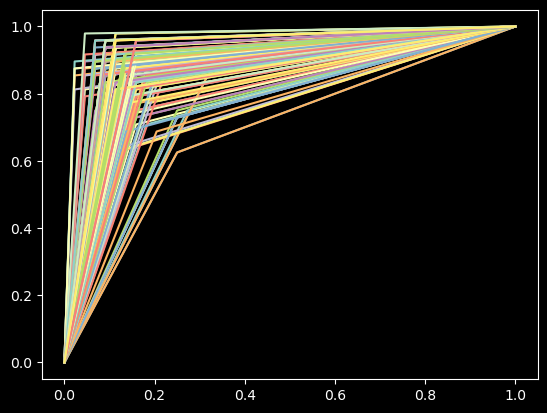

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import os
import random
import pickle
import matplotlib.pyplot as plt

# For different numbers of questions from DASS-42
for num_questions in question_numbers:
    models = {}

    accs = []
    aucs = []
    pres = []
    recs = []
    f1s = []
    auc_stdev = []
    f1_stdev = []
    auc_95ci_u = []
    auc_95ci_d = []
    f1_95ci_u = []
    f1_95ci_d = []
    lst_comb = []

    model_num = 0
    for a in range(models_to_train):
        model = {}

        print("Training model", a)
        cols = ["gender_m", "gender_f", "region_other", 
                "region_east", "region_west", "age_norm"]

        if num_questions == 1:
            if a >= len(questions):
                break
            question_nums = [questions[a]]
        else:
            question_nums = random.sample(questions, num_questions)
            question_nums.sort()
            # Resample if already in list
            while question_nums in lst_comb:
                question_nums = random.sample(questions, num_questions)
            lst_comb.append(question_nums)

        for q in question_nums:
            for j in range(4):
                cols.append("Q{0}A_{1}".format(q, j))
        features = feats_df[cols]

        labels = labels_df[[target]].copy()

        np.random.seed(seed)
        shufId = np.random.permutation(int(len(labels)))
        index = int(test_split * len(labels.index))

        df_prist = features.iloc[shufId[0:index]]
        df_trainvalid = features.iloc[shufId[index:-1]]

        gt_prist = labels.iloc[shufId[0:index]]
        gt_trainvalid = labels.iloc[shufId[index:-1]]

        df_prist.to_csv(os.path.join(data_folder, "prist_features.csv"), index=False)
        gt_prist.to_csv(os.path.join(data_folder, "prist_labels.csv"), index=False)

        accs1 = []
        aucs1 = []
        pres1 = []
        recs1 = []
        f1s1 = []
        ensemble_models = []

        for b in range(models_per_question):
            if b % 10 == 0:
                print("Training iteration", b)

            np.random.seed(b)
            shufId = np.random.permutation(int(len(gt_trainvalid)))
            index = int((1/9) * len(gt_trainvalid.index))

            df_valid = df_trainvalid.iloc[shufId[0:index]]
            df_train = df_trainvalid.iloc[shufId[index:-1]]

            gt_valid = gt_trainvalid.iloc[shufId[0:index]]
            gt_train = gt_trainvalid.iloc[shufId[index:-1]]

            df_valid = df_valid.reset_index(drop=True)
            df_train = df_train.reset_index(drop=True)

            gt_valid = gt_valid.reset_index(drop=True)
            gt_train = gt_train.reset_index(drop=True)

            clf = MLPClassifier(max_iter=100, verbose=True)
            clf.fit(df_train, gt_train.values.ravel())

            xgbpprist = clf.predict(df_prist)
            xgbpprist = pd.DataFrame(xgbpprist)

            # Evaluation
            target_names = ['negative', 'positive']
            cr = classification_report(gt_prist, xgbpprist, target_names=target_names, output_dict=True)
            precision = cr["weighted avg"]["precision"]
            recall = cr["weighted avg"]["recall"]
            f1score = cr["weighted avg"]["f1-score"]

            acc_score = accuracy_score(gt_prist, xgbpprist)
            auc_score = roc_auc_score(gt_prist, xgbpprist)
            fpr, tpr, thresh = roc_curve(gt_prist, xgbpprist)
            plt.plot(fpr, tpr)           

            accs1.append(acc_score)
            aucs1.append(auc_score)
            pres1.append(precision)
            recs1.append(recall)
            f1s1.append(f1score)
            ensemble_models.append(clf)

        mean_acc1 = np.mean(accs1)
        mean_auc1 = np.mean(aucs1)
        stdev_auc1 = np.std(aucs1)
        ci_auc1_u, ci_auc1_d = confidence_interval(aucs1)
        mean_pre1 = np.mean(pres1)
        mean_rec1 = np.mean(recs1)
        mean_f11 = np.mean(f1s1)
        stdev_f11 = np.std(f1s1)
        ci_f11_u, ci_f11_d = confidence_interval(f1s1)

        accs.append(mean_acc1)
        aucs.append(mean_auc1)
        auc_stdev.append(stdev_auc1)
        auc_95ci_u.append(ci_auc1_u)
        auc_95ci_d.append(ci_auc1_d)
        pres.append(mean_pre1)
        recs.append(mean_rec1)
        f1s.append(mean_f11)
        f1_stdev.append(stdev_f11)
        f1_95ci_u.append(ci_f11_u)
        f1_95ci_d.append(ci_f11_d)

        model["questions"] = question_nums
        model["models"] = ensemble_models
        model["auc_score"] = mean_auc1
        model["f1_score"] = mean_f11

        models[model_num] = model
        model_num += 1

    mean_acc = np.mean(accs)
    mean_auc = np.mean(aucs)
    stdev_auc = np.mean(auc_stdev)
    ci_auc_u = np.mean(auc_95ci_u)
    ci_auc_d = np.mean(auc_95ci_d)
    mean_pre = np.mean(pres)
    mean_rec = np.mean(recs)
    mean_f1  = np.mean(f1s)
    stdev_f1 = np.mean(f1_stdev)
    ci_f1_u = np.mean(f1_95ci_u)
    ci_f1_d = np.mean(f1_95ci_d)

    percentile_list = pd.DataFrame(
    {
        'accuracy': accs,
        'auc_roc': aucs,
        'auc_stdev': auc_stdev,
        'auc_95ci_u': auc_95ci_u,
        'auc_95ci_d': auc_95ci_d,
        'precision': pres,
        'recall': recs,
        'f1_score': f1s,
        'f1_stdev': f1_stdev,
        'f1_95ci_u': f1_95ci_u,
        'f1_95ci_d': f1_95ci_d,
    })
    percentile_list.to_csv('./data/results_mlp.csv', mode='a', header=True)

    print("\nNumber of questions:", num_questions)
    print("Mean AUC      :", mean_auc)
    print("Stdev AUC     :", stdev_auc)
    print("95th CI AUC   :", ci_auc_u, ci_auc_d)
    print("Mean F1-Score :", mean_f1)
    print("Stdev F1      :", stdev_f1)
    print("95th CI F1    :", ci_f1_u, ci_f1_d)

    ACCS.append(mean_acc)
    AUCS.append(mean_auc)
    AUC_STDEV.append(stdev_auc)
    AUC_95CI_U.append(ci_auc_u)
    AUC_95CI_D.append(ci_auc_d)
    PRES.append(mean_pre)
    RECS.append(mean_rec)
    F1S.append(mean_f1)
    F1_STDEV.append(stdev_f1)
    F1_95CI_U.append(ci_f1_u)
    F1_95CI_D.append(ci_f1_d)

    with open("./data/models_mlp.bin", "wb") as f:
        pickle.dump(models, f)


In [13]:
# Print results
print("\nAll accuracies:", ACCS)
print("All AUCs:", AUCS)
print("Stdev of AUCs:", AUC_STDEV)
print("95th CI of AUCs:", AUC_95CI_U)
print("95th CI of AUCs:", AUC_95CI_D)
print("All precisions:", PRES)
print("All recalls:", RECS)
print("All F1s:", F1S)
print("Stdev of F1s:", F1_STDEV)
print("95th CI of F1s:", F1_95CI_U)
print("95th CI of F1s:", F1_95CI_D)


All accuracies: [0.7603260869565217, 0.8201086956521738, 0.8565217391304347, 0.8858695652173914, 0.9005434782608696, 0.896195652173913, 0.9190217391304347, 0.9266304347826088]
All AUCs: [0.7620265151515152, 0.8208333333333332, 0.8568181818181818, 0.8866477272727271, 0.9006628787878788, 0.8959753787878787, 0.9188446969696971, 0.9255681818181818]
Stdev of AUCs: [0.0017992424242424254, 0.007007575757575773, 0.0052083333333333036, 0.004450757575757591, 0.007291666666666657, 0.006013257575757586, 0.003977272727272741, 0.008238636363636375]
95th CI of AUCs: [0.7391649725386166, 0.7317936410515172, 0.790640032149265, 0.8300954902829251, 0.8080134692513947, 0.8195696968974016, 0.8683086554043419, 0.8208863814328037]
95th CI of AUCs: [0.784888057764414, 0.9098730256151493, 0.9229963314870986, 0.9431999642625293, 0.9933122883243627, 0.9723810606783561, 0.9693807385350521, 1.03024998220356]
All precisions: [0.7699342495407162, 0.8237325071691174, 0.8580983398229967, 0.8888721930968579, 0.9015467

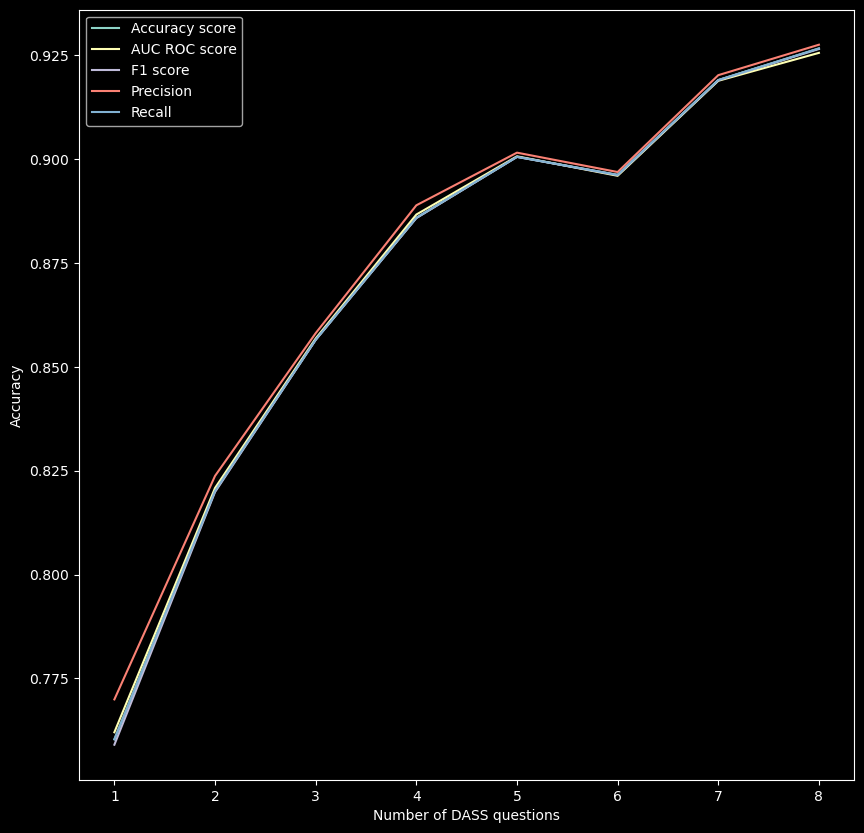

In [14]:
# Plot accuracy results
plt.figure(figsize=(10,10)) # Make new figure
plt.plot(question_numbers, ACCS)
plt.plot(question_numbers, AUCS)
plt.plot(question_numbers, F1S)
plt.plot(question_numbers, PRES)
plt.plot(question_numbers, RECS)
plt.xlabel("Number of DASS questions")
plt.ylabel("Accuracy")
plt.legend(["Accuracy score", "AUC ROC score", "F1 score", "Precision", "Recall"])
plt.show()